# **1. Introduction**

## **Business Problem**

The company aims to understand and optimize customer behavior to improve sales performance, enhance marketing effectiveness, and maximize customer satisfaction. Despite offering a diverse range of products and purchase channels, there are challenges in identifying the most valuable customer segments, understanding their preferences, and effectively targeting them with tailored marketing campaigns. Addressing these issues requires a comprehensive analysis of customer demographics, purchase behaviors, channel preferences, and engagement levels to develop  strategies that align with customer needs and business goals.

## **Business Question**

**1. Customer Demographics**

1. **What is the relationship between customer demographics (`Age`, `Income`, `Education`, `Marital_Status`) and total spending (`Total_Spending`)?**  
2. **How do income levels (`Income_Group`) relate to the likelihood of customers having children (`Has_Kids`)?**

---

**2. Household Composition**

3. **Question 3 : How does household composition (`Kidhome`, `Teenhome`, `Total_Kids`) affect spending on all product categories (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`)??**  
4. **What are the differences in total spending between households with children (`Has_Kids`) and those without children??**

---

**3. Customer Lifecycle**

5. **How does customer tenure (`Customer_Tenure`) relate to total spending (`Total_Spending`) and recency (`Recency`)?**  
6. **What is the tenure distribution across different age groups (`Age_Group`) and income levels (`Income_Group`)?**

---

**4. Purchase Behavior**

7. **What are the top-selling and least-selling product categories (`Dominant_Category`), and how do these vary across spending groups (`Spending_Group`)?**

---

**5. Purchase Channels**

8. **Which channel (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`) is the dominant channel for customers, and how does it relate to total spending?**  
9. **Which channel (`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`) is the dominant channel for customers, and how does it relate to total purchases (`Total_Purchases`) and customer age demographics (`Age_Group`)??**

---

**6. Engagement and Interaction**

10. **How does the frequency of website visits (`NumWebVisitsMonth`) relate to customer spending on different product categories (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`)?**  
11. **Do customers with high web engagement (`Visit_Frequency_Category = High`) prefer specific purchase channels (`Dominant_Channel`) or product categories (`Dominant_Category`)?**

---

**7. Marketing Campaigns**

12. **How does the number of campaigns accepted (`Total_Campaign_Acceptances`) relate to customer spending (`Total_Spending`) and product preferences (`Dominant_Category`)?**  
13. **Which customer groups (`Age_Group`, `Income_Group`, `Spending_Group`) are most likely to respond to marketing campaigns (`Is_Campaign_Responder`)?**

# **2. Data Preparation**

In [172]:
#  #Code Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from scipy.stats import iqr
from scipy.stats import chisquare


import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [174]:
df = pd.read_csv('/content/drive/MyDrive/JCDS/Capstone 2/Supermarket Customers.csv', sep='\t', encoding='latin-1')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

## **Data Understanding and Cleaning**

The dataset contains information about the customer demographic information, purchase behaviour, marketing campaign response, dan purchase channels.

---
**1. People (Demographic Information)**
- ID: A unique identifier for each customer.
- Year_Birth: The customer's year of birth, used to derive their age.
- Education: The customer's level of education (e.g., Graduation, PhD).
- Marital_Status: The marital status of the customer (e.g., Single, Married).
- Income: The customer's yearly household income.
- Kidhome: The number of children in the customer's household.
- Teenhome: The number of teenagers in the customer's household.
- Dt_Customer: The date when the customer enrolled with the company.
- Recency: The number of days since the customer's last purchase.
- Complain: Whether the customer filed a complaint in the last two years (1 = Yes, 0 = No).
---
**2. Products (Purchase Behavior)**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
---
**3. Promotion (Marketing Campaign Response)**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
---
**4. Place (Purchase Channels)**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalog
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to the company’s website in the last month
---
5. Other
- Z_CostContact: Undefined Column, Irrelevant data
- Z_Revenue: Undefined Column, Irrelevant data

In [175]:
# Drop Z_CostContact and Z_Revenue
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### **General Column Information**

In [176]:
df.shape

(2240, 27)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Insight :**
- Theres 3 columns with the data type object, which is Education, Marital_Status, Dt_Customer
- Theres 26 columns with the data type numeric
---

The classification of columns based on their data types :

**Numerical**
- **Continuous**: Income, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds.
- **Discrete**: Year_Birth, Kidhome, Teenhome, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth.

**Categorical**
- **Nominal**: ID, Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response.
- **Ordinal**: Education.

**Date**
- Dt_Customer

In [178]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [179]:
df.duplicated().sum()

0

**Insight :**
- There are 24 missing values in the column "Income"
- No duplicated data found in the entire columns

### **Descriptive Statistics of Columns**

In [180]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.013393     0.009375     0.149107  
std        0.245316      0.114976     0.096391     0.356274  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000

In [181]:
df.describe(include = 'object')

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

### **Heatmap Correlation**

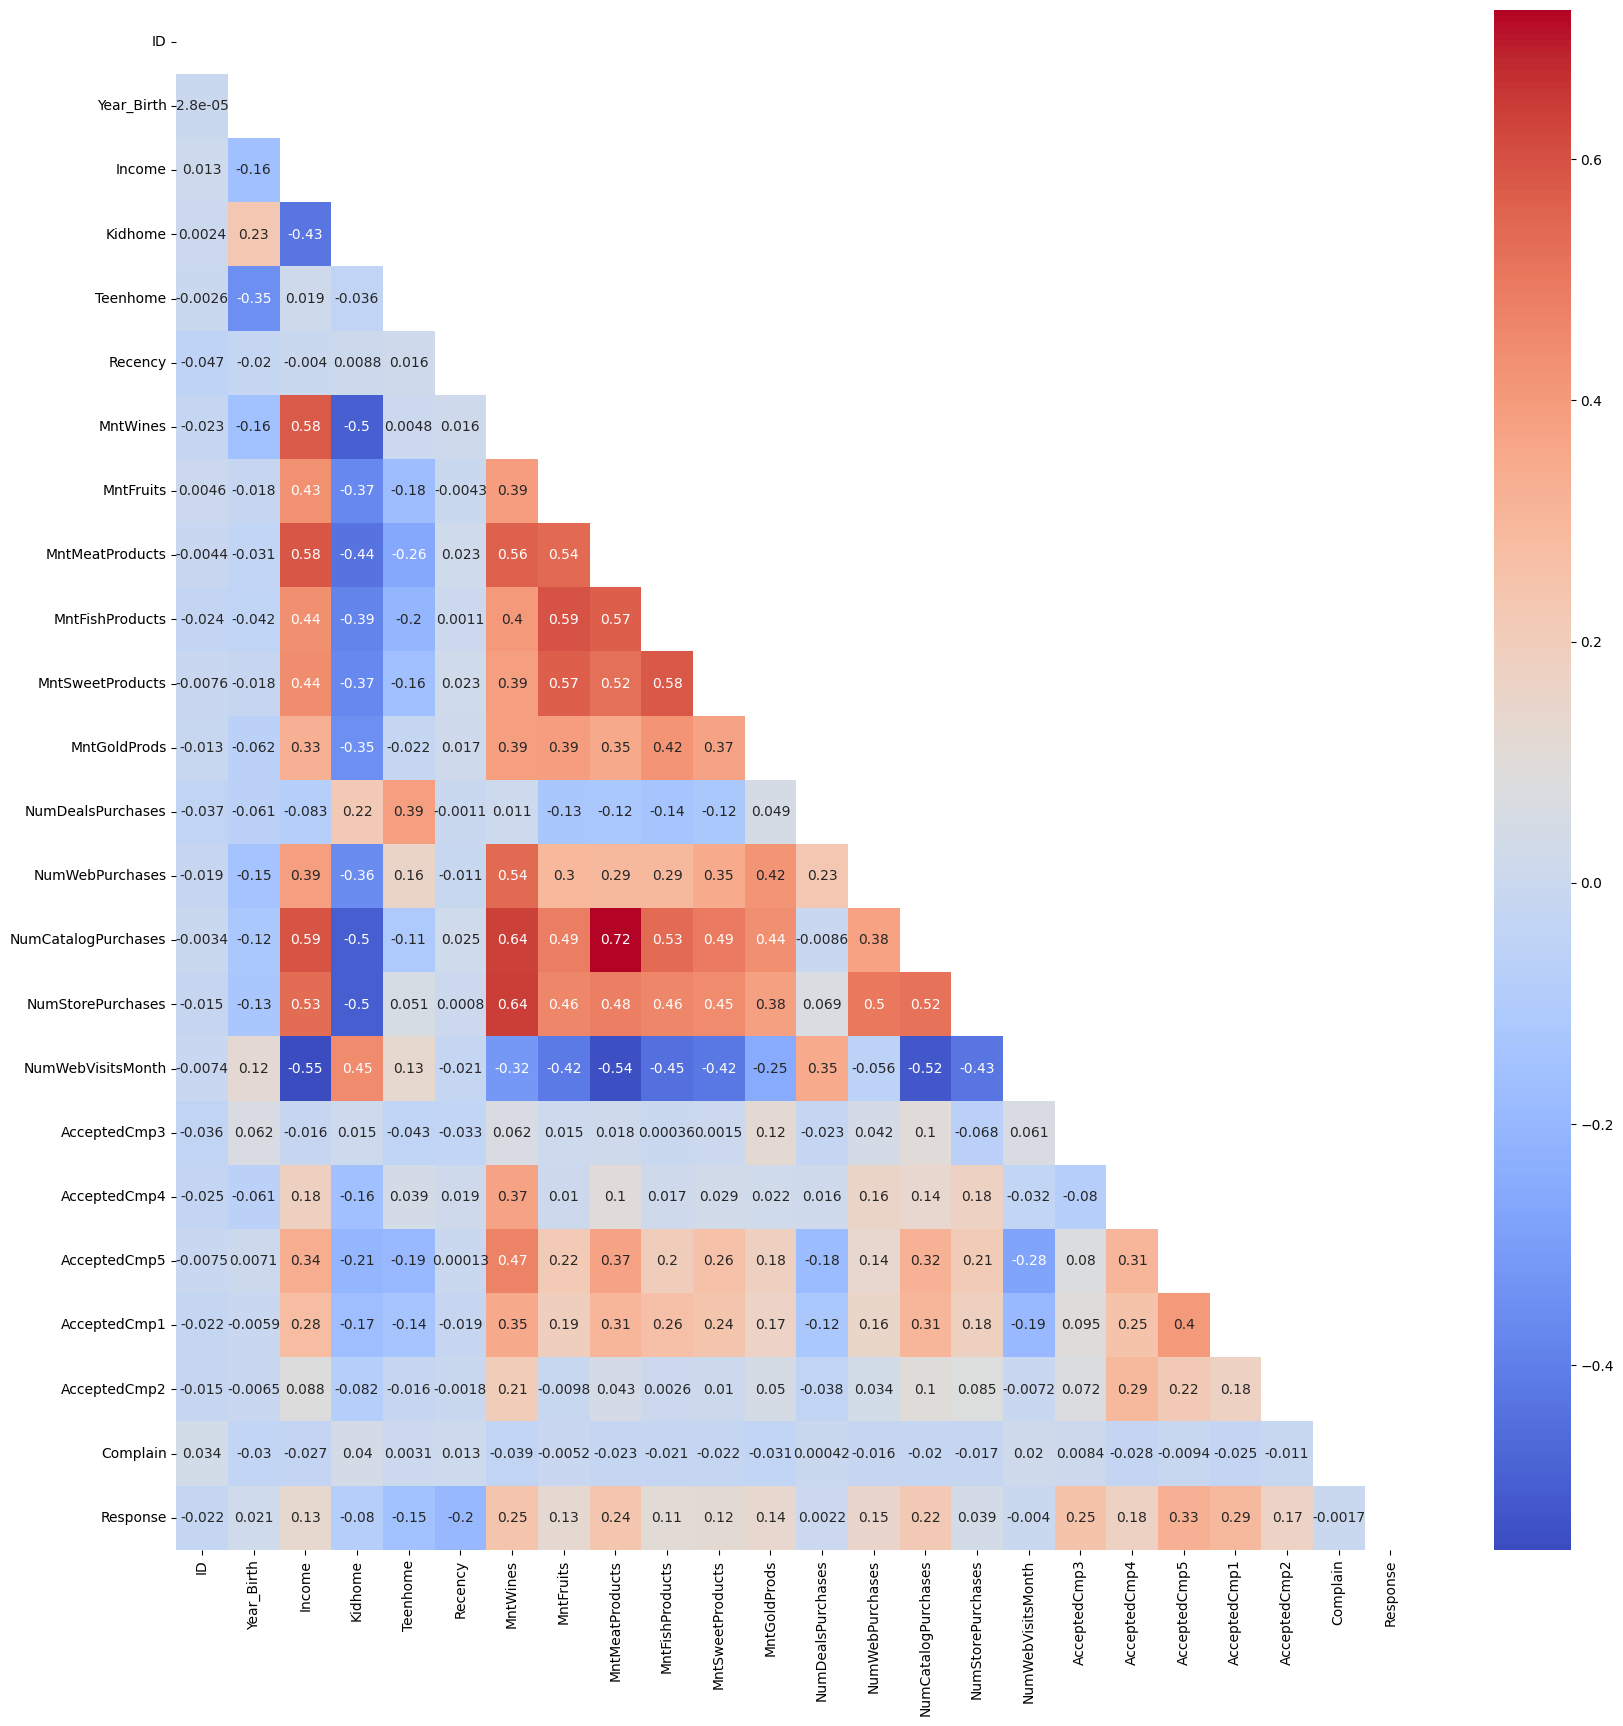

In [182]:
# Correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), mask=np.triu(df.corr(numeric_only=True)), cmap='coolwarm', annot=True)
plt.show()

**Noticeable Correlations :**

**Strong Positive Correlations (≥ 0.5):**
- NumCatalogPurchases & Income (0.59): Higher-income customers are more likely to make purchases through catalogs.
- NumCatalogPurchases & MntWines, NumStorePurchases & MntWines(0.64):  Customers who purchase via catalogs or in stores tend to spend more on wine.
- NumCatalogPurchases & MntMeatProducts (0.72): Catalog shoppers are significant spenders on meat products.
---
**Negative Correlations (< -0.5):**
- NumWebVisitsMonth & Income (-0.55): Higher-income customers visit the website less frequently.
- NumWebVisitsMonth & MntMeatProducts (-0.54): Frequent website visitors spend less on meat products.

### **Columns Overview**

In [183]:
df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0             0         0         1  
1             0             0             0             0         0         0  
2             0             0             0             0         0         0

#### 1.ID
Unique Identifier of Customers

In [184]:
# Check for unique value
total_rows = df.shape[0]
unique_ids = df['ID'].nunique()

# Check for missing values
missing_ids = df['ID'].isnull().sum()

# Check for duplicates
duplicate_ids = total_rows - unique_ids

# Find min and max ID
min_id = df['ID'].min()
max_id = df['ID'].max()

# Display the results
print(f"Total rows: {total_rows}")
print(f"Unique IDs: {unique_ids}")
print(f"Missing IDs: {missing_ids}")
print(f"Duplicate IDs: {duplicate_ids}")
print(f"\nMinimum ID: {min_id}")
print(f"Maximum ID: {max_id}")

Total rows: 2240
Unique IDs: 2240
Missing IDs: 0
Duplicate IDs: 0

Minimum ID: 0
Maximum ID: 11191


- All rows have unique IDs, and no missing or duplicate values were found.
- IDs range from 0 to 11191 but only has 2240 rows
- The broad range of IDs suggesting that IDs are not sequantial and the IDs might be randomly assigned for each customer or were removed or were a subset of a larger database.

#### **2. Year_Birth**
The Year_Birth column represents the year customers were born.

In [185]:
Year_Birth_nunique = df['Year_Birth'].nunique()

print(df['Year_Birth'].unique())
print(f'Number of unique values : {Year_Birth_nunique}')

[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Number of unique values : 59


In [186]:
df['Year_Birth'].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64

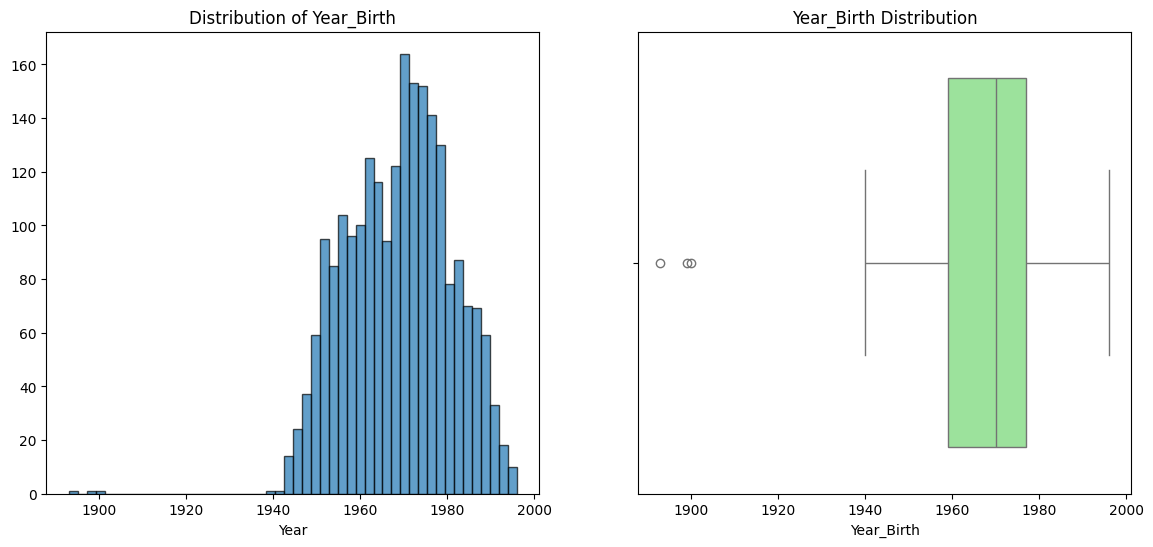

In [187]:
plt.figure(figsize=(14, 6))

# Visualize the distribution
plt.subplot(1, 2, 1)
plt.hist(df['Year_Birth'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Year_Birth')
plt.xlabel('Year')

# Boxplot visualization
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Year_Birth'], color='lightgreen')
plt.title('Year_Birth Distribution')
plt.xlabel('Year_Birth')
plt.show()

**Initial Overview**
- Year_Birth is not normally distributed.
- The visualization showed a left-skewed histogram.
- Few outlier can be observed from the boxplot visualization, showing unusual year of birth

##### Data Manipulation

In [188]:
# Set current year (Using the year of the latest customer enrollment)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True).dt.date
current_year = df['Dt_Customer'].max().year

In [189]:
# Create a new column for age
df['Age'] = current_year - df['Year_Birth']
df.insert(df.columns.get_loc('Year_Birth') + 1, 'Age', df.pop('Age'))

In [190]:
# Group ages based on market segmentation
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 24, 39, 54, df['Age'].max()],
                         labels=['Gen Z-', 'Millennials', 'Gen X', 'Boomers+'])
df.insert(df.columns.get_loc('Age') + 1, 'Age_Group', df.pop('Age_Group'))

Creating column Age from Year_Birth provide a more clear understanding on customer demographics

Customers were grouped into segments:
- Gen Z (0-24): Young adults, likely early-stage earners.
- Millennials (25-39): Early to mid-career, potenti
ally family-oriented.
- Gen X (40-54): Established professionals.
- Boomers+ (55+): Retirees or late-career individuals.

##### Data Cleaning

In [191]:
# Detect outliers for Year_Birth
Q1_year = df['Year_Birth'].quantile(0.25)
Q3_year = df['Year_Birth'].quantile(0.75)
IQR_year = Q3_year - Q1_year

lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

# Detect outliers for Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

In [192]:
# Year_Birth outliers
outliers_year = df[(df['Year_Birth'] < lower_bound_year) | (df['Year_Birth'] > upper_bound_year)]
print(f"Number of Year_Birth outliers: {outliers_year.shape[0]}")

# Identify outliers for Year_Birth
outliers_year = df[(df['Year_Birth'] < lower_bound_year) | (df['Year_Birth'] > upper_bound_year)]
print("Year_Birth Outliers:")
outliers_year

Number of Year_Birth outliers: 3
Year_Birth Outliers:


ID  Year_Birth  Age Age_Group Education Marital_Status   Income  \
192   7829        1900  114  Boomers+  2n Cycle       Divorced  36640.0   
239  11004        1893  121  Boomers+  2n Cycle         Single  60182.0   
339   1150        1899  115  Boomers+       PhD       Together  83532.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
192        1         0  2013-09-26       99        15          6   
239        0         1  2014-05-17       23         8          0   
339        0         0  2013-09-26       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
192                8                7                 4            25   
239                5                7                 0             2   
339              562              104                64           224   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192                  1                2                    1   
239                  1                1                    0   
339                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0             0         1         0  
239             0             0             0         0         0  
339             1             0             0         0         0

In [193]:
# Age outliers
outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print(f"Number of Age outliers: {outliers_age.shape[0]}")

# Identify outliers for Age
outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
print("Age Outliers:")
outliers_age

Number of Age outliers: 3
Age Outliers:


ID  Year_Birth  Age Age_Group Education Marital_Status   Income  \
192   7829        1900  114  Boomers+  2n Cycle       Divorced  36640.0   
239  11004        1893  121  Boomers+  2n Cycle         Single  60182.0   
339   1150        1899  115  Boomers+       PhD       Together  83532.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
192        1         0  2013-09-26       99        15          6   
239        0         1  2014-05-17       23         8          0   
339        0         0  2013-09-26       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
192                8                7                 4            25   
239                5                7                 0             2   
339              562              104                64           224   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192                  1                2                    1   
239                  1                1                    0   
339                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0             0         1         0  
239             0             0             0         0         0  
339             1             0             0         0         0

In [194]:
# Total number of rows before removing outliers
total_rows_before = df.shape[0]

# Remove outliers for Year_Birth
df = df[(df['Year_Birth'] >= lower_bound_year) & (df['Year_Birth'] <= upper_bound_year)]

# Remove outliers for Age
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

# Total number of rows after removing outliers
total_rows_after = df.shape[0]

# Calculate the percentage of removed outliers
removed_outliers = total_rows_before - total_rows_after
percentage_removed = (removed_outliers / total_rows_before) * 100

# Display results
print(f"Total Rows Before: {total_rows_before}")
print(f"Total Rows After: {total_rows_after}")
print(f"Removed Outliers: {removed_outliers}")
print(f"Percentage of Removed Outliers: {percentage_removed:}%")

Total Rows Before: 2240
Total Rows After: 2237
Removed Outliers: 3
Percentage of Removed Outliers: 0.13392857142857142%


**Outliers Handling**
- There are 3 outliers identified in the column Year_Birth and Age.
- The birth years 1900, 1899, and 1893 are highly improbable for active customers today, indicating anomalies in the data.
- Customers aged 114, 115, and 121 are likely data entry errors or outdated records.
Such extreme far significantly from the average customer age (45.10 years).
- The outliers accounts for for 0.13% of the entire data, indicates the dataset remains largely intact and representative after cleaning.

##### Descriptive Summary

In [195]:
df['Year_Birth'].value_counts()

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1965    74
1973    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1941     1
1940     1
Name: count, dtype: int64

In [196]:
df['Age'].value_counts()

Age
38    89
43    87
39    83
42    79
36    77
44    77
49    74
41    74
45    71
40    69
58    55
56    53
35    53
62    52
37    52
46    51
55    51
48    50
60    50
59    49
54    49
32    45
51    45
47    44
52    44
57    43
63    43
31    42
28    42
50    42
34    39
33    39
30    38
53    36
61    35
29    32
25    30
65    30
64    29
26    29
27    27
66    21
24    18
68    16
67    16
23    15
22    13
69     8
71     7
70     7
21     5
19     5
20     3
18     2
73     1
74     1
Name: count, dtype: int64

In [197]:
df['Age_Group'].value_counts()

Age_Group
Gen X          892
Millennials    717
Boomers+       567
Gen Z-          61
Name: count, dtype: int64

In [198]:
# Measures of central tendency and dispersion for Year_Birth
mean_year = df['Year_Birth'].mean()
median_year = df['Year_Birth'].median()
mode_year = df['Year_Birth'].mode()[0]

min_year = df['Year_Birth'].min()
max_year = df['Year_Birth'].max()
range_year = max_year - min_year
variance_year = np.var(df['Year_Birth'], ddof=1)
std_dev_year = np.std(df['Year_Birth'], ddof=1)

# Measures of central tendency and dispersion for Age
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

min_age = df['Age'].min()
max_age = df['Age'].max()
range_age = max_age - min_age
variance_age = np.var(df['Age'], ddof=1)
std_dev_age = np.std(df['Age'], ddof=1)

# Count customers in each Age_Group
age_group_counts = df['Age_Group'].value_counts().sort_index()

# Display results
print("Year_Birth Statistics")
print(f"Mean    : {mean_year:.2f}")
print(f"Median  : {median_year}")
print(f"Mode    : {mode_year}")
print(f"Min     : {min_year}")
print(f"Max     : {max_year}")
print(f"Range   : {range_year}")
print(f"Variance: {variance_year:.2f}")
print(f"Std Dev : {std_dev_year:.2f}\n")

print("Age Statistics")
print(f"Mean    : {mean_age:.2f}")
print(f"Median  : {median_age}")
print(f"Mode    : {mode_age}")
print(f"Min     : {min_age}")
print(f"Max     : {max_age}")
print(f"Range   : {range_age}")
print(f"Variance: {variance_age:.2f}")
print(f"Std Dev : {std_dev_age:.2f}\n")

print("Age Group Statistics")
for group, count in age_group_counts.items():
    print(f"{group} : {count} customers")


Year_Birth Statistics
Mean    : 1968.90
Median  : 1970.0
Mode    : 1976
Min     : 1940
Max     : 1996
Range   : 56
Variance: 136.93
Std Dev : 11.70

Age Statistics
Mean    : 45.10
Median  : 44.0
Mode    : 38
Min     : 18
Max     : 74
Range   : 56
Variance: 136.93
Std Dev : 11.70

Age Group Statistics
Gen Z- : 61 customers
Millennials : 717 customers
Gen X : 892 customers
Boomers+ : 567 customers


**Summary**

1. Year_Birth:
- Customers were predominantly born in the late 1960s to 1970s (mean: 1968.90, mode: 1976).
- The highest count for Year_Birth is 1976 with 89 entry.
- The range of 56 years highlights generational diversity.
---
2. Age:
- The average customer age is 45 years, with most customers aged 38 (mode).
- The age distribution spans from younger generations (0–24) to older customers (55+).
- The highest count for Age is 38 with 89 entry.
- The oldest customer was born in 1940 with the age of 74 years old.
- The youngest customer was born in 1996 with the age of 18 years old.
---
3. Age_Group
- The largest segment is Gen X (892 customers), followed by Millennials (717).
- Boomers+ (567) form a significant segment, while Gen Z- (61) is the smallest, indicating limited younger engagement.

##### Visualization

Year_Birth Visualization

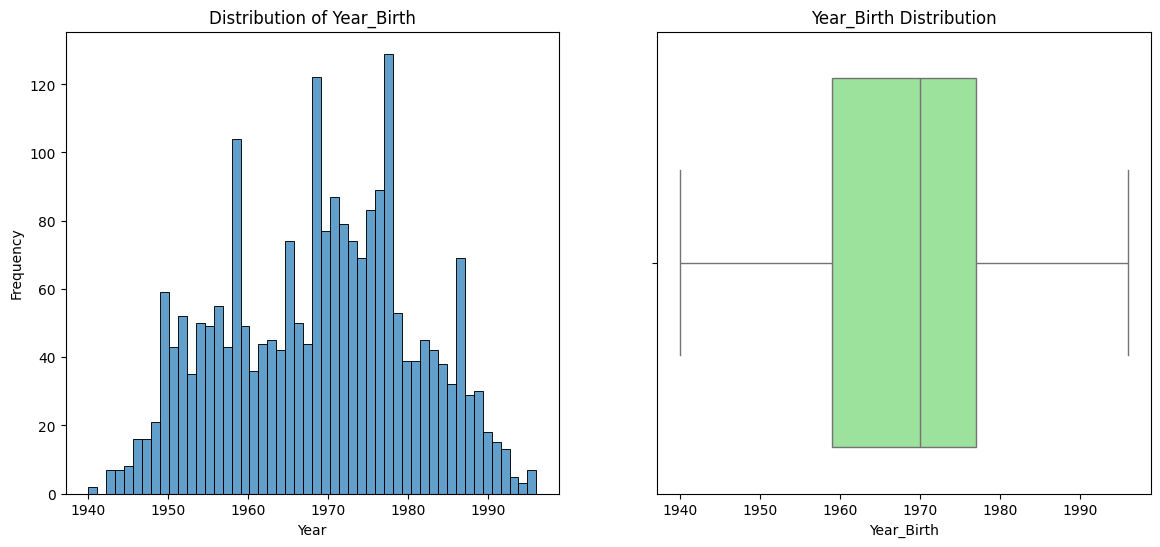

In [199]:
plt.figure(figsize=(14, 6))

# Visualize the distribution of Year_Birth
plt.subplot(1, 2, 1)
sns.histplot(df['Year_Birth'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Year_Birth')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Boxplot of year birth
plt.subplot(1, 2, 2)
plt.title('Year_Birth Distribution')
sns.boxplot(x=df['Year_Birth'], color='lightgreen')
plt.xlabel('Year_Birth')
plt.show()

Insight :
- Most customers were born between 1950 and 1980, with a peak around 1970.
- There are fewer customers born before 1950 or after 1990.
- No extreme outliers are observed


Age Visualization

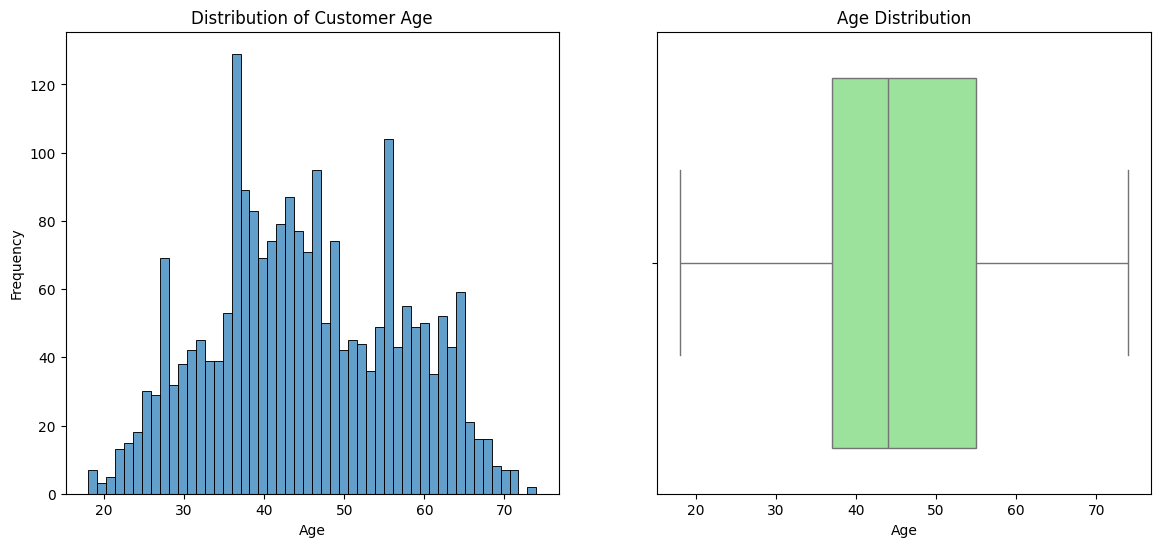

In [200]:
plt.figure(figsize=(14, 6))

# Visualize the distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Box plot of Age
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

Insight :
- The majority of customers are between mid 30s to 60s years old, indicating a middle-aged customer base (Gen X)
- No extreme outliers are observed

Age_Group Visualization

In [201]:
palette = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightseagreen', 'mediumpurple', 'lightgoldenrodyellow', 'rosybrown']

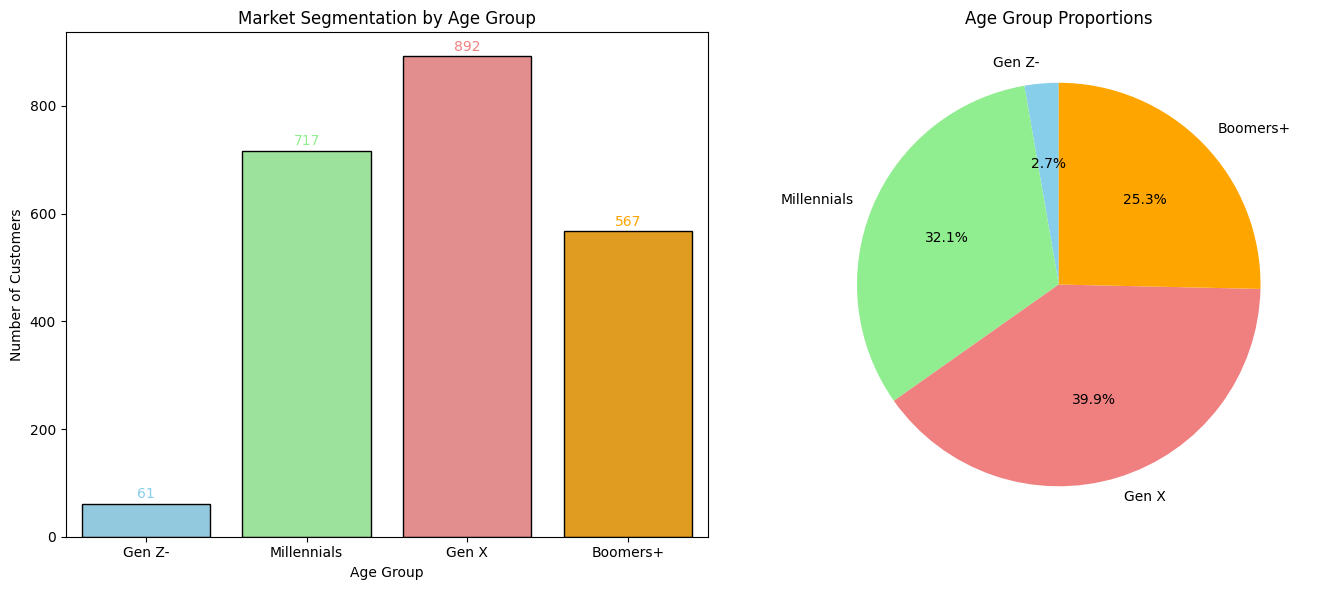

In [202]:
plt.figure(figsize=(14, 6))

# Histogram for age group distribution
plt.subplot(1, 2, 1)
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette=palette, edgecolor='k')  # Use barplot for individual colors
plt.title('Market Segmentation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add annotations with matching colors
for i, count in enumerate(age_group_counts.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', color=palette[i])

# Pie chart for age group proportions
plt.subplot(1, 2, 2)
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Age Group Proportions')
plt.ylabel('')

plt.tight_layout()
plt.show()

Insight
- A significant majority of customers fall into Gen X and Millennials
- Gen X (39.9%) and Millennials (32.1%) form the largest customer segments, while Gen Z is the smallest group (2.7%)

#### **3. Education**
Represents the education level of customers.

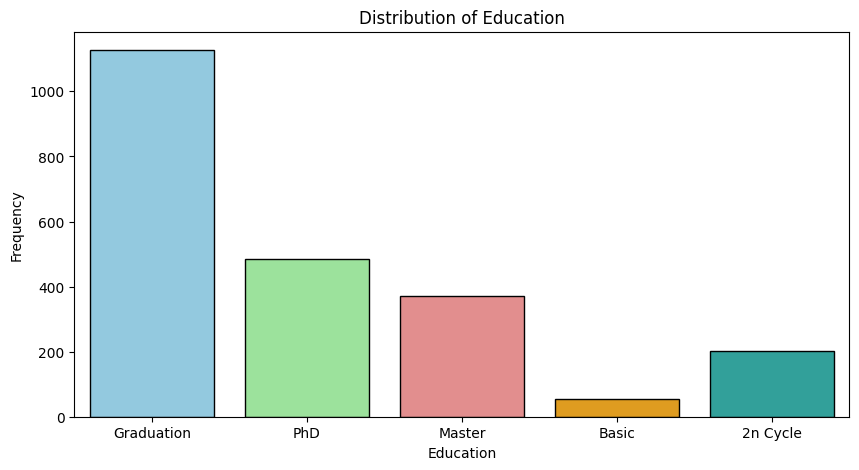

In [203]:
# Visualize the distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', data=df, edgecolor='k',  palette=palette)
plt.title('Distribution of Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.show()

In [204]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

**Initial Overview**
- Customer education level consist of 5 category, which is Graduation, PhD, 2n Cycle and Basic.

##### Data Manipulation

In [205]:
# Education level correction
education_mapping = {
    'Basic': 'High School',
    'Graduation': 'Bachelor',
    'Master': 'Master',
    'PhD': 'Doctoral',
    '2n Cycle': 'Master'
}
df['Education'] = df['Education'].map(education_mapping)
education_counts = df['Education'].value_counts()
education_counts

Education
Bachelor       1127
Master          571
Doctoral        485
High School      54
Name: count, dtype: int64

**Explanation**

- The term "2n cycle" is used in the European Higher Education Area (EHEA). It refers to the level of education consist of Bachelor's (1st cycle), Master's (2nd cycle), and Doctorate (3rd cycle). [Wikipedia](https://en.wikipedia.org/wiki/European_Higher_Education_Area#:~:text=The%20European%20Qualifications%20Framework%20defines%203%20main%20cycles)
- Education levels were Standardized , mapping similar categories like "2nd Cycle" and "Master" as "Master."
- Graduation is mapped as Bachelor, PhD as Doctoral, and Basic as High School, to provide better understanding of the customer's education level

##### Visualization


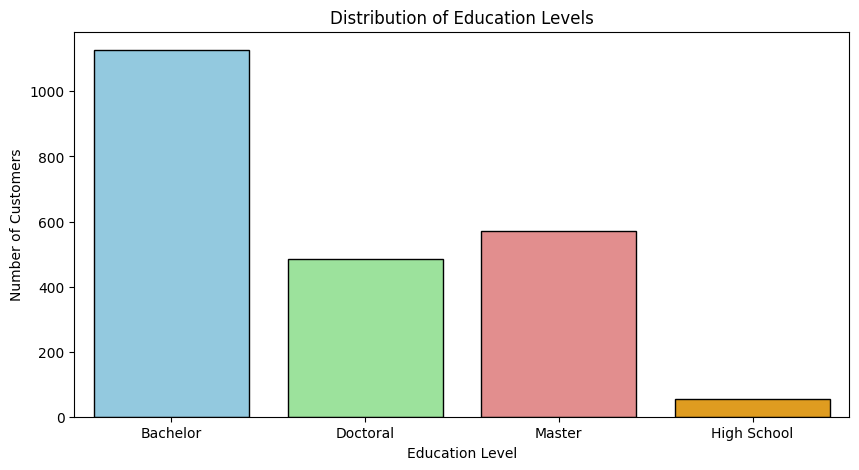

In [206]:
# Bar chart for education levels
plt.figure(figsize=(10, 5))
sns.countplot(x='Education', data=df, edgecolor='k',  palette=palette)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

**Visualization Insight**
- Bachelor's degree dominates the customer base, surpassing other education levels.
- Master's and Doctorate holders make up a sizable portion, indicating the company attracts a well-educated audience.
- Customers with only a High School education are minimal, showing limited engagement with less-educated demographics.

#### **4. Marital_Status**
represents the marital status of customer

Text(0, 0.5, 'Frequency')

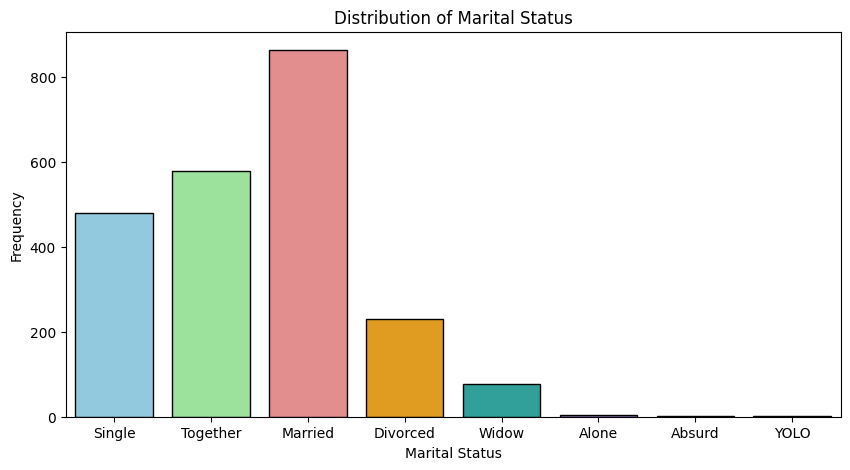

In [207]:
# Visualize the distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Marital_Status', data=df, edgecolor='k', palette=palette)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

In [208]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [209]:
df[df['Marital_Status'] == 'Alone']

ID  Year_Birth  Age    Age_Group Education Marital_Status   Income  \
131   433        1958   56     Boomers+    Master          Alone  61331.0   
138  7660        1973   41        Gen X  Doctoral          Alone  35860.0   
153    92        1988   26  Millennials  Bachelor          Alone  34176.0   

     Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
131        1         1  2013-03-10       42       534          5   
138        1         1  2014-05-19       37        15          0   
153        1         0  2014-05-12       12         5          7   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
131               47                0                 5            41   
138                8                4                 2            20   
153               24               19                14            20   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
131                  5               11                    1   
138                  2                1                    1   
153                  4                3                    0   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
131                  6                  8             0             0   
138                  2                  5             1             0   
153                  4                  6             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
131             0             0             0         0         0  
138             0             0             0         0         1  
153             0             0             0         0         0

In [210]:
df[df['Marital_Status'] == 'Absurd']

ID  Year_Birth  Age Age_Group Education Marital_Status   Income  \
2093  7734        1993   21    Gen Z-  Bachelor         Absurd  79244.0   
2134  4369        1957   57  Boomers+    Master         Absurd  65487.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
2093        0         0  2012-12-19       58       471        102   
2134        0         0  2014-01-10       48       240         67   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2093              125              212                61           245   
2134              500              199                 0           163   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2093                  1                4                   10   
2134                  3                3                    5   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2093                  7                  1             0             0   
2134                  6                  2             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2093             1             1             0         0         1  
2134             0             0             0         0         0

In [211]:
df[df['Marital_Status'] == 'YOLO']

ID  Year_Birth  Age Age_Group Education Marital_Status   Income  \
2177    492        1973   41     Gen X  Doctoral           YOLO  48432.0   
2202  11133        1973   41     Gen X  Doctoral           YOLO  48432.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  \
2177        0         1  2012-10-18        3       322          3   
2202        0         1  2012-10-18        3       322          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2177               50                4                 3            42   
2202               50                4                 3            42   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2177                  5                7                    1   
2202                  5                7                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2177                  6                  8             0             0   
2202                  6                  8             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2177             0             0             0         0         0  
2202             0             0             0         0         1

**Initial Overview**

Marital status consists of 8 categories, which are Single, Together, Married, Divorced, Widow, Alone, Absurd, and YOLO (You Only Live Once)

##### Data Manipulation

In [212]:
# Standardize marital statuses
marital_mapping = {
    'Single': 'Single',
    'Married': 'Married',
    'Together': 'Married',
    'Divorced': 'Divorced',
    'Widow': 'Divorced',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

marital_counts = df['Marital_Status'].value_counts()
marital_counts

Marital_Status
Married     1443
Single       486
Divorced     308
Name: count, dtype: int64

**Explanation**

- Grouping similar categories ("Together" with "Married" and "Alone" with "Single") for better understanding.
- Divorced and Widowed is mapped together as "Divorced" cause of similar characteristic.
- Alone, YOLO and Absurd is mapped as Single

##### Visualization

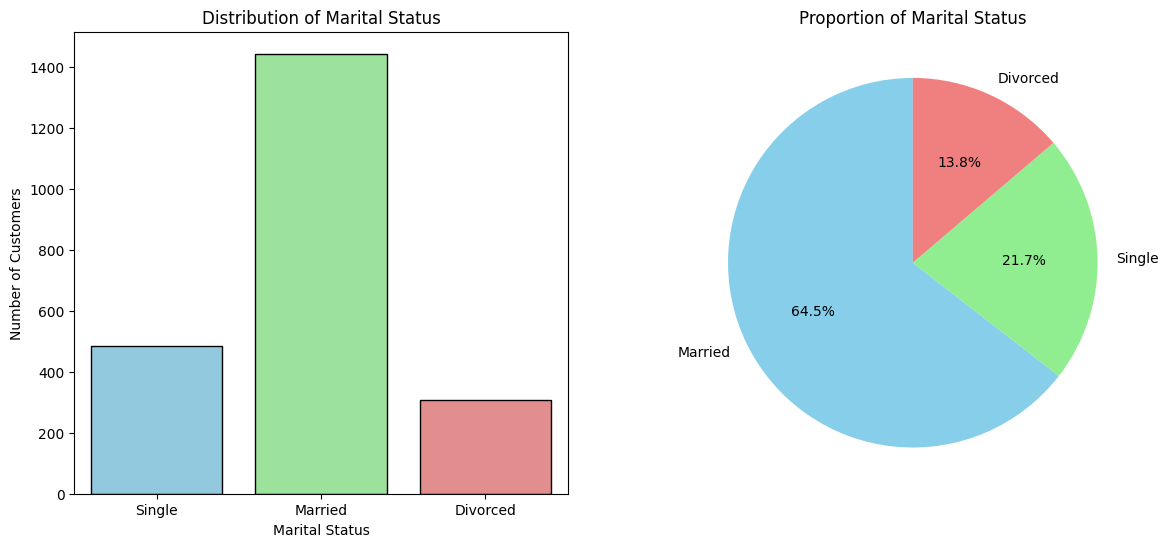

In [213]:
plt.figure(figsize=(14, 6))

# Bar chart using Seaborn with consistent colors
plt.subplot(1, 2, 1)
sns.countplot(x='Marital_Status', data=df, edgecolor='k', palette=palette)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Pie chart using Matplotlib with consistent colors
plt.subplot(1, 2, 2)
plt.pie(marital_counts.values, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Proportion of Marital Status')
plt.ylabel('')

plt.show()

**Insight**
- The majority of customers are Married (64.5%), followed by Single (21.5%), with a smaller portion being Divorced (13.8%), while the Other category (0.2%) is negligible.

#### **5. Income**
Represent the Customer's yearly household income

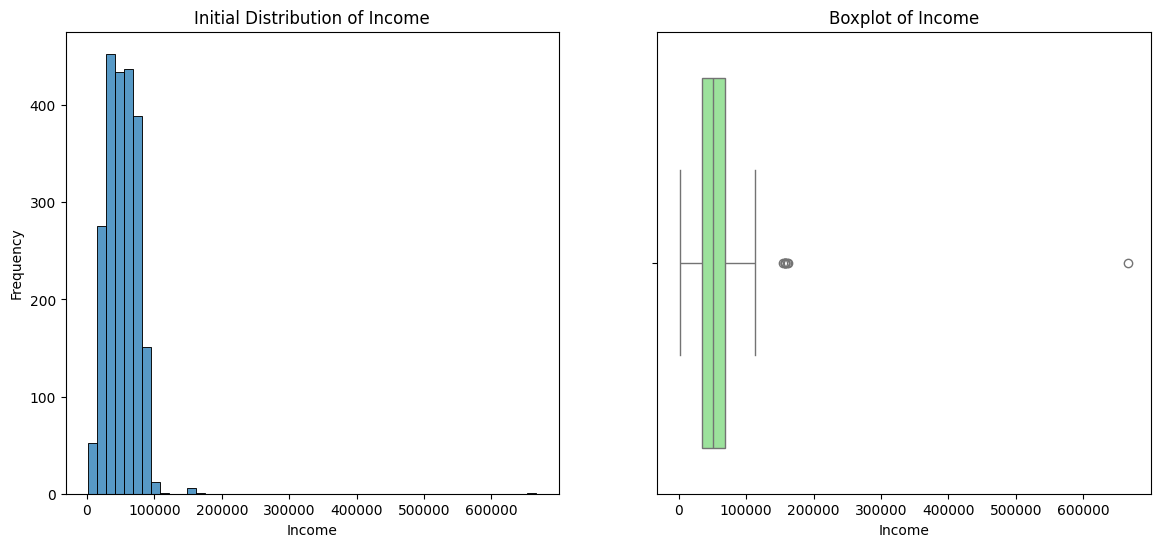

In [214]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], bins=50, edgecolor='k')
plt.title('Initial Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'], color='lightgreen')
plt.title('Boxplot of Income')
plt.show()

**Initial Overview**
- The initial histogram shows a non-normally distributed right-skewed visualization
- The majority of customers earn below 100,000 usd.
- There are visible outliers in the income data, particularly an extreme values exceeding 600,000 usd.


##### Data Cleaning

In [215]:
df.shape

(2237, 29)

In [216]:
# Missing values
missing_income = df['Income'].isnull().sum()
print(f"Missing Values in Income: {missing_income}")

Missing Values in Income: 24


In [217]:
# Impute missing values with the median
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Report back
print(f"Missing values after imputation: {df['Income'].isnull().sum()}")
print(f"Median value used for imputation: {median_income}")

Missing values after imputation: 0
Median value used for imputation: 51373.0


In [218]:
# Calculate IQR for 'Income'
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Define bounds for outlier
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Print number of rows before outlier removal
rows_before = df.shape[0]
print(f"Rows before outlier removal: {rows_before}")

# Remove outliers based on calculated bounds
df = df[(df['Income'] >= lower_bound_income) & (df['Income'] <= upper_bound_income)]

# Print number of rows after outlier removal
rows_after = df.shape[0]
print(f"Rows after outlier removal: {rows_after}")

# Report on the number and percentage of rows removed
rows_removed = rows_before - rows_after
percentage_removed = (rows_removed / rows_before) * 100
print(f"Number of rows removed: {rows_removed}")
print(f"Percentage of rows removed: {percentage_removed:.2f}%")

Rows before outlier removal: 2237
Rows after outlier removal: 2229
Number of rows removed: 8
Percentage of rows removed: 0.36%


Explanation :
- There are 24 missing values
- The missing values is filled with median
- There are 8 outlier detected and removed, representing 0.36% of the entire data

##### Data Manipulation

In [219]:
# Define income groups
income_bins = [0, 40000, 80000, df['Income'].max()]
income_labels = ['Low', 'Medium', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)
df.insert(df.columns.get_loc('Income') + 1, 'Income_Group', df.pop('Income_Group'))

**Explanation**

Customer is grouped based on yearly Income (in USD$) into 3 groups :
- Low (< 40,000)
- Medium (40,000–80,000)
- High (>80,000)

##### Descriptive Summary

In [220]:
# Descriptive statistics for Income
mean_income = df['Income'].mean()
median_income = df['Income'].median()
mode_income = df['Income'].mode()[0]
min_income = df['Income'].min()
max_income = df['Income'].max()
range_income = max_income - min_income
variance_income = df['Income'].var()
std_dev_income = df['Income'].std()

print("Income Statistics:")
print(f"Mean    : {mean_income:.2f}")
print(f"Median  : {median_income:.2f}")
print(f"Mode    : {mode_income:.2f}")
print(f"Min     : {min_income}")
print(f"Max     : {max_income}")
print(f"Range   : {range_income}")
print(f"Variance: {variance_income:.2f}")
print(f"Std Dev : {std_dev_income:.2f}")

Income Statistics:
Mean    : 51619.41
Median  : 51373.00
Mode    : 51373.00
Min     : 1730.0
Max     : 113734.0
Range   : 112004.0
Variance: 424410155.25
Std Dev : 20601.22


In [221]:
# Income group counts
print("Income Group Counts:")
df['Income_Group'].value_counts()

Income Group Counts:


Income_Group
Medium    1290
Low        731
High       208
Name: count, dtype: int64

Summary
- The average income across customers is 51,619.41
- The mode income of 51373.00 is very close to the median, indicating a symmetric income distribution.
- The dominance of the "Medium" income group almost double the "Low" group, indicates a stable middle-class customer base.

##### Visualization


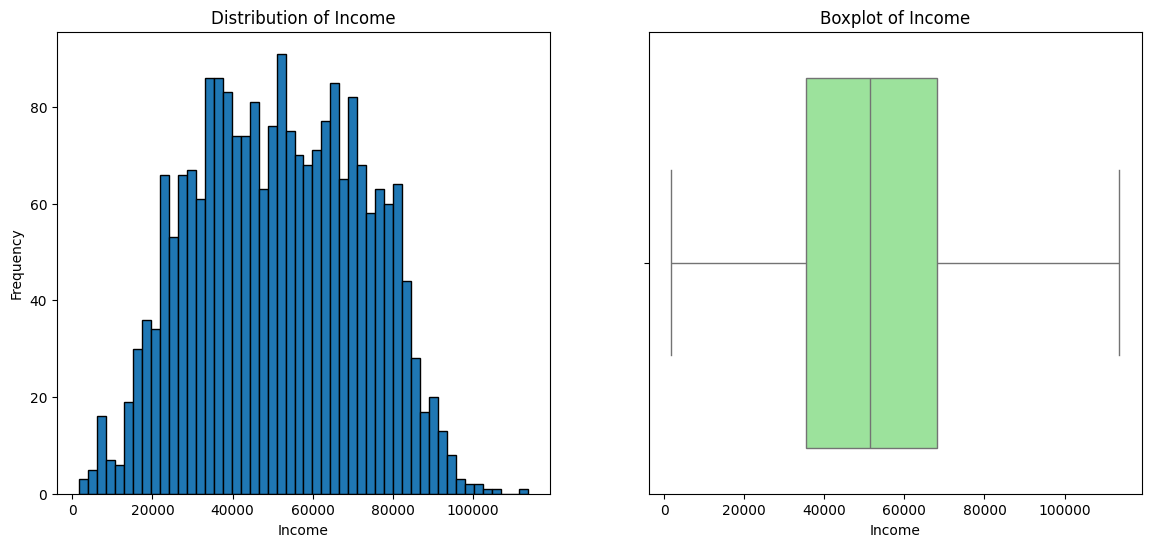

In [222]:
plt.figure(figsize=(14, 6))

# Histogram Visualization
plt.subplot(1, 2, 1)
plt.hist(df['Income'], bins=50, edgecolor='k')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Boxplot Visualization
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Income'], color='lightgreen')
plt.title('Boxplot of Income')
plt.show()

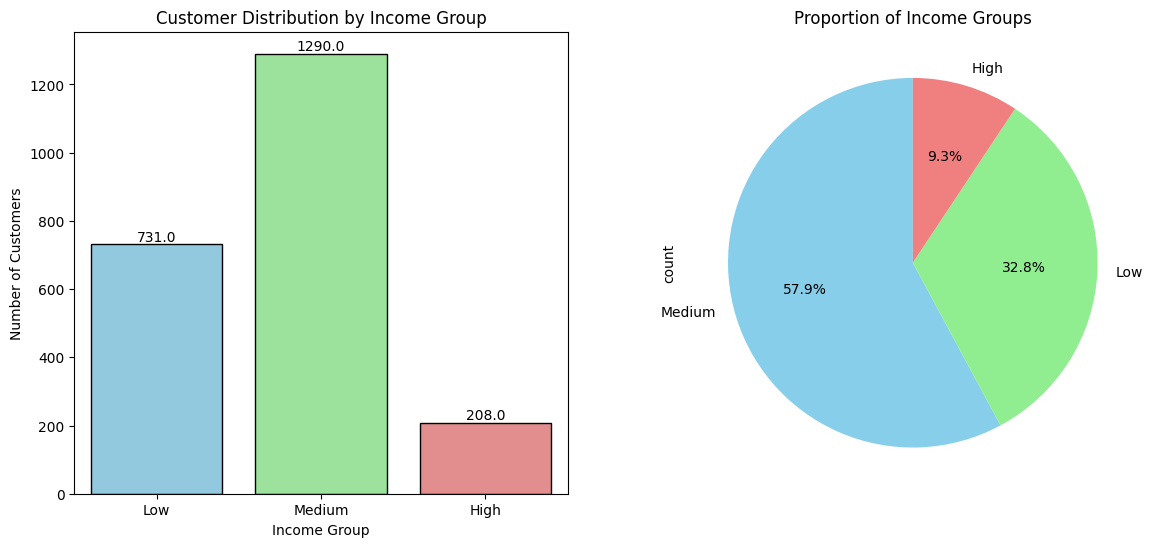

In [223]:
plt.figure(figsize=(14, 6))

# Histogram Visualization
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Income_Group', data=df, edgecolor='k', palette=palette)  # Apply colors
plt.title('Customer Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add annotation
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', rotation=0)

# Pie Chart of Income_Group
plt.subplot(1, 2, 2)
plt.title('Proportion of Income Groups')
df['Income_Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=palette)

plt.show()

Insight
- After data cleaning, The Income is now normally distributed
- The boxplot confirms that extreme outliers have been removed
- The majority of customers (57.9%) fall into the "Medium" income group, indicating a strong middle-income demographic

#### **6-7. Kidhome & Teenhome**
Represents the number of children and Teenagers in customer's household

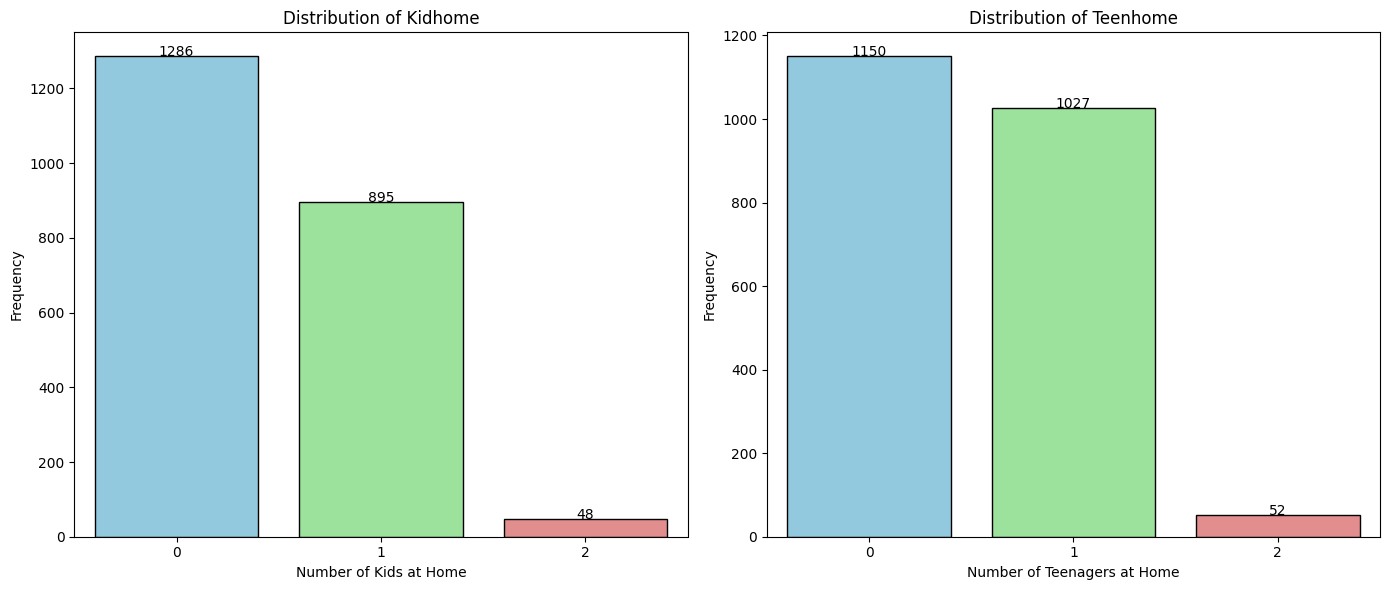

In [224]:
plt.figure(figsize=(14, 6))

# Bar chart for Kidhome
plt.subplot(1, 2, 1)
sns.countplot(x='Kidhome', data=df, edgecolor='k', palette=palette)
plt.title('Distribution of Kidhome')
plt.xlabel('Number of Kids at Home')
plt.ylabel('Frequency')
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(bar.get_height()), ha='center')

# Bar chart for Teenhome
plt.subplot(1, 2, 2)
sns.countplot(x='Teenhome', data=df, edgecolor='k', palette=palette)
plt.title('Distribution of Teenhome')
plt.xlabel('Number of Teenagers at Home')
plt.ylabel('Frequency')
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, int(bar.get_height()), ha='center')

plt.tight_layout()
plt.show()


Initial Overview
- Most households (1,286) have no kids at home, indicating a predominant focus on childless households, followed by households that have one child (895), while very few (48) have two kids.
- Most households (1,150) have no teenagers, followed by households with one teenager (1,027). Only a small fraction (52) of households have two teenagers.
- Overall suggests that the customer base is largely skewed toward households without children or teenagers.

##### Data Manipulation

In [225]:
# Create Total_Kids feature
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']
df.insert(df.columns.get_loc('Teenhome') + 1, 'Total_Kids', df.pop('Total_Kids'))
df['Total_Kids'].value_counts()

Total_Kids
1    1123
0     633
2     420
3      53
Name: count, dtype: int64

In [226]:
# Create binary feature Has_Kids
df['Has_Kids'] = df.apply(lambda x: 1 if (x['Kidhome'] > 0 or x['Teenhome'] > 0) else 0, axis=1)
df.insert(df.columns.get_loc('Total_Kids') + 1, 'Has_Kids', df.pop('Has_Kids'))
df['Has_Kids'].value_counts()

Has_Kids
1    1596
0     633
Name: count, dtype: int64

In [227]:
# Create binary feature No_Kids
df['No_Kids'] = df.apply(lambda x: 1 if (x['Kidhome'] == 0 and x['Teenhome'] == 0) else 0, axis=1)
df.insert(df.columns.get_loc('Has_Kids') + 1, 'No_Kids', df.pop('No_Kids'))
df['No_Kids'].value_counts()

No_Kids
0    1596
1     633
Name: count, dtype: int64

##### Visualization

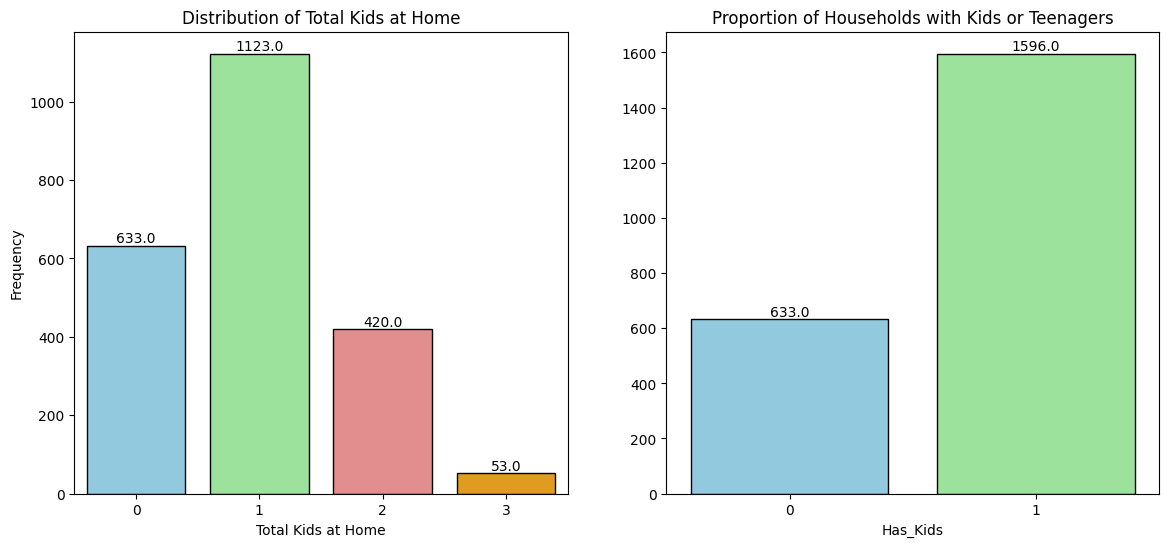

In [228]:
plt.figure(figsize=(14, 6))

# Bar chart for Total_Kids
plt.subplot(1, 2, 1)
sns.countplot(x='Total_Kids', data=df, edgecolor='k', palette=palette)
plt.title('Distribution of Total Kids at Home')
plt.xlabel('Total Kids at Home')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add annotation for Has_Kids
for p in plt.gcf().get_axes()[0].patches:
    plt.gcf().get_axes()[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')


# Bar chart for Has_Kids
plt.subplot(1, 2, 2)
sns.countplot(x='Has_Kids', data=df, edgecolor='k', palette=palette)
plt.title('Proportion of Households with Kids or Teenagers')
plt.ylabel('')

# Add annotation for Has_Kids
for p in plt.gcf().get_axes()[1].patches:
    plt.gcf().get_axes()[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

Insight
- The majority of households have one child (1,123), followed by those with no children (633).
- 1,596 households (over 70%) have kids or teenagers, highlighting a strong family-oriented customer base.
- 633 households have no kids or teenagers, indicating a notable segment of child-free households.
- The distribution emphasizes a customer base leaning toward families with one child at home.








#### **8. Dt_Customer**
Represents the date when the customer was enrolled in the company.

In [229]:
# Check data type
print(df['Dt_Customer'].dtype)

object


In [230]:
# Convert to datetime if not already in proper format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [231]:
# Check unique values and range
print("Unique Enrollment Dates  :", df['Dt_Customer'].nunique())
print("First Enrollment Date    :", df['Dt_Customer'].min())
print("Latest Enrollment Date   :", df['Dt_Customer'].max())

Unique Enrollment Dates  : 663
First Enrollment Date    : 2012-07-30 00:00:00
Latest Enrollment Date   : 2014-06-29 00:00:00


Text(0, 0.5, 'Frequency')

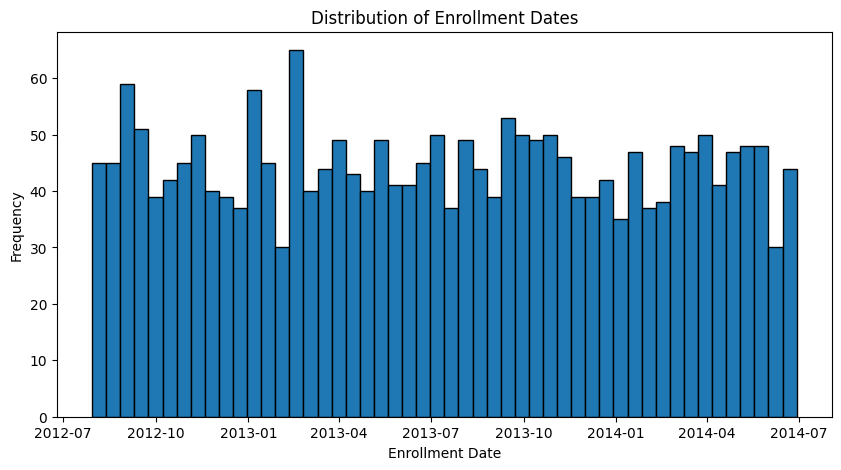

In [232]:
# Histogram for Dt_Customer
plt.figure(figsize=(10, 5))
plt.hist(df['Dt_Customer'], bins=50, edgecolor='k')
plt.title('Distribution of Enrollment Dates')
plt.xlabel('Enrollment Date')
plt.ylabel('Frequency')

Initial Overview
- Customer enrollment appears relatively consistent over time, with no significant spikes or declines.

##### Data Manipulation

In [233]:
# Calculate tenure in days
current_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (current_date - df['Dt_Customer']).dt.days
df.insert(df.columns.get_loc('Dt_Customer') + 1, 'Customer_Tenure', df.pop('Customer_Tenure'))
df[['Dt_Customer', 'Customer_Tenure']].head()

Dt_Customer  Customer_Tenure
0  2012-09-04              663
1  2014-03-08              113
2  2013-08-21              312
3  2014-02-10              139
4  2014-01-19              161

In [234]:
# Create tenure group bins
bins = sorted([0, 365, df['Customer_Tenure'].max()])
labels = ['0-1 Years', '1-2 Years']
df['Tenure_Group'] = pd.cut(df['Customer_Tenure'], bins=bins, labels=labels, include_lowest=True)
df.insert(df.columns.get_loc('Customer_Tenure') + 1, 'Tenure_Group', df.pop('Tenure_Group'))

**Explanation**
- The Customer_Tenure column computes the duration in days since the customer's enrollment (Dt_Customer) until the most recent date in the dataset (last customer enrollment date).
- Customers are categorized into two groups: 0–1 Years: Customers with tenure less than or equal to 365 days, and 1–2 Years: Customers with tenure between 365 and 730 days.

##### Descriptive Summary

In [235]:
# Descriptive statistics for Customer_Tenure
mean_Customer_Tenure = df['Customer_Tenure'].mean()
median_Customer_Tenure = df['Customer_Tenure'].median()
mode_Customer_Tenure = df['Customer_Tenure'].mode()[0]
min_Customer_Tenure = df['Customer_Tenure'].min()
max_Customer_Tenure = df['Customer_Tenure'].max()
range_Customer_Tenure = max_income - min_income
variance_Customer_Tenure = df['Customer_Tenure'].var()
std_dev_Customer_Tenure = df['Customer_Tenure'].std()

print("Customer Tenure Statistics:")
print(f"Mean    : {mean_Customer_Tenure:.2f}")
print(f"Median  : {median_Customer_Tenure:.2f}")
print(f"Mode    : {mode_Customer_Tenure:.2f}")
print(f"Min     : {min_Customer_Tenure}")
print(f"Max     : {max_Customer_Tenure}")
print(f"Range   : {range_Customer_Tenure}")
print(f"Variance: {variance_Customer_Tenure:.2f}")
print(f"Std Dev : {std_dev_Customer_Tenure:.2f}")

Customer Tenure Statistics:
Mean    : 353.78
Median  : 356.00
Mode    : 667.00
Min     : 0
Max     : 699
Range   : 112004.0
Variance: 40904.54
Std Dev : 202.25


In [236]:
# Frequency counts for Tenure_Group
df['Tenure_Group'].value_counts()

Tenure_Group
0-1 Years    1153
1-2 Years    1076
Name: count, dtype: int64

Summary
- The average customer tenure is approximately 354 days, just under one year, indicating a relatively new customer base overall.
- The range spans from 0 days to 699 days, reflecting both new customers and those approaching two years of tenure.
- The "0–1 Years" group is the largest, with 1,153 customers, indicating a focus on newly acquired customers.
- The "1–2 Years" group is slightly smaller, with 1,076 customers, showing a strong retention of customers beyond their first year.

##### Visualization

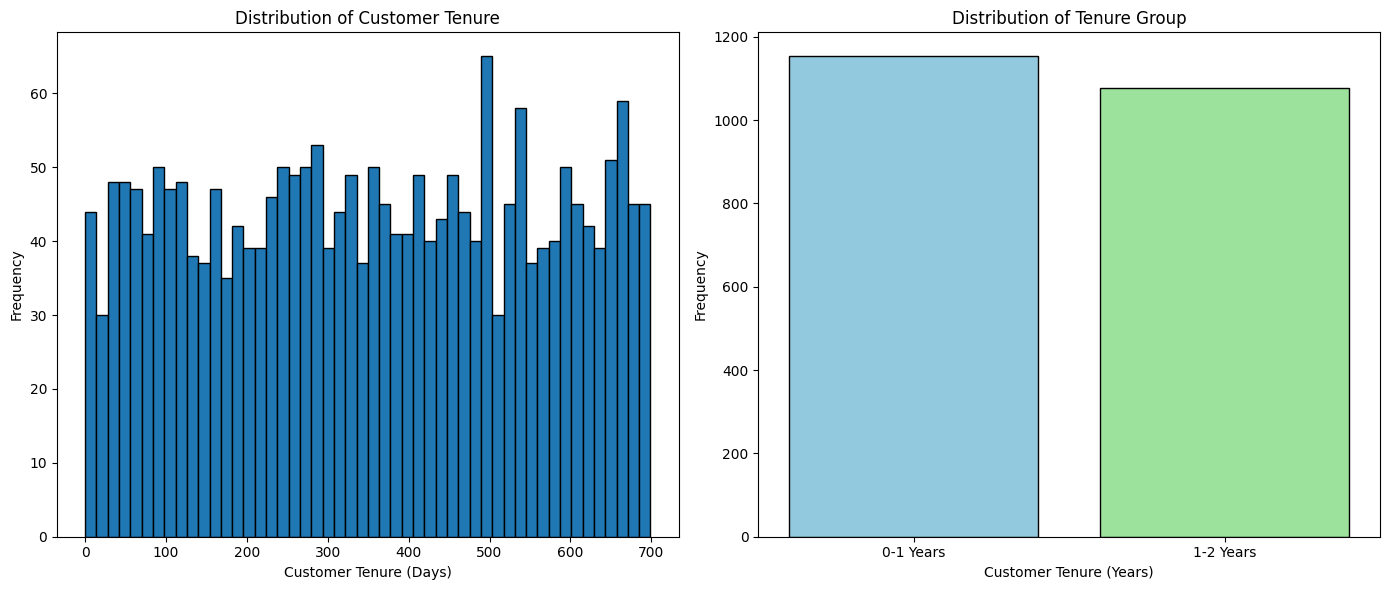

In [237]:
plt.figure(figsize=(14, 6))

# Histogram for Customer_Tenure
plt.subplot(1, 2, 1)
plt.hist(df['Customer_Tenure'], bins=50, edgecolor='k')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Customer Tenure (Days)')
plt.ylabel('Frequency')

# Countplot for Tenure Group
plt.subplot(1, 2, 2)
sns.countplot(x='Tenure_Group', data=df, palette=palette, edgecolor='k')
plt.title('Distribution of Tenure Group')
plt.xlabel('Customer Tenure (Years)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Insight**
- Customer tenure is relatively evenly distributed, indicating a consistent customers acquisition
- Customers in the "0–1 Years" group slightly outnumber those in the "1–2 Years" group, The balance between the two groups reflects a good distribution of newly acquired and retained customers.

#### **9. Recency**
Number of days since customer's last purchase

In [238]:
# Check data type and range
print(df['Recency'].dtype)
print("Minimum Recency:", df['Recency'].min())
print("Maximum Recency:", df['Recency'].max())

int64
Minimum Recency: 0
Maximum Recency: 99


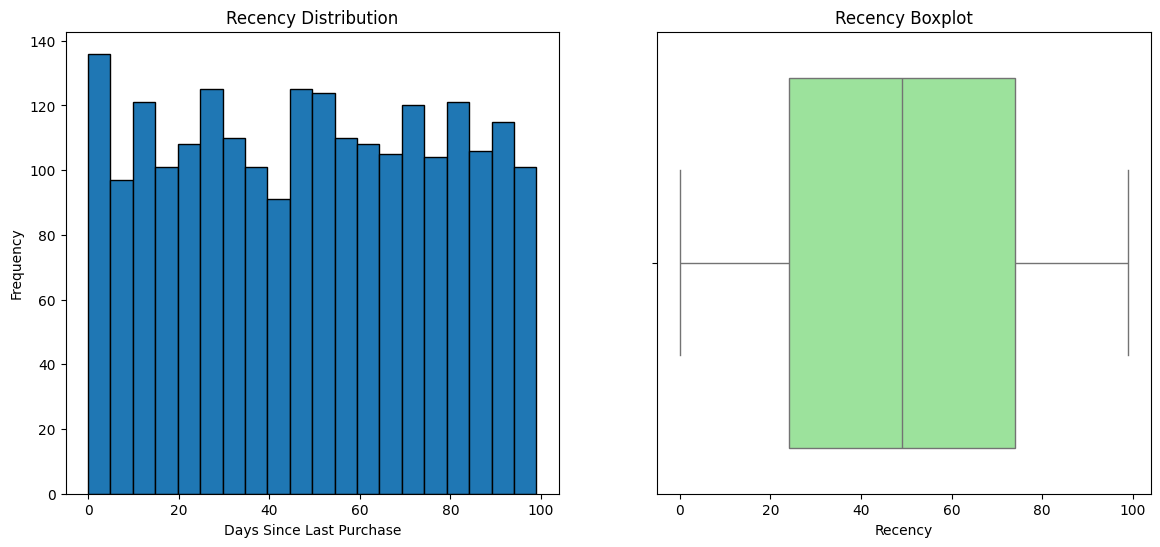

In [239]:
plt.figure(figsize=(14, 6))

# Histogram for Recency
plt.subplot(1, 2, 1)
plt.hist(df['Recency'], bins=20, edgecolor='k')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')

# Boxplot for Recency
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Recency'], color='lightgreen')
plt.title('Recency Boxplot')
plt.show()

**Summary**
- The number of days since the last purchase is evenly distributed across the range of 0 to 100 days.
- No visible outliers suggest a well-distributed recency across customers.

##### Data Manipulation

In [240]:
# Create recency groups
bins = [0, 30, 90, df['Recency'].max()]
labels = ['<30 Days', '30–90 Days', '>90 Days']
df['Recency_Group'] = pd.cut(df['Recency'], bins=bins, labels=labels, include_lowest=True)
df.insert(df.columns.get_loc('Recency') + 1, 'Recency_Group', df.pop('Recency_Group'))


**Explanation**

Divide customers into recency categories groups for better analysis:
- (<30 Days) (Active): Frequent buyers.
- (30–90 Days) (Engaged): Moderately engaged customers.
- (>90 Days) (Inactive): Lapsed customers.

##### Descriptive Summary

In [241]:
# Calculate and display key statistics
mean_recency = df['Recency'].mean()
median_recency = df['Recency'].median()
mode_recency = df['Recency'].mode()[0]
min_recency = df['Recency'].min()
max_recency = df['Recency'].max()
range_recency = max_recency - min_recency
variance_recency = df['Recency'].var()
std_dev_recency = df['Recency'].std()

print("Recency Statistics:")
print(f"Mean      : {mean_recency:.2f}")
print(f"Median    : {median_recency:.2f}")
print(f"Mode      : {mode_recency}")
print(f"Min       : {min_recency}")
print(f"Max       : {max_recency}")
print(f"Range     : {range_recency}")
print(f"Variance  : {variance_recency:.2f}")
print(f"Std Dev   : {std_dev_recency:.2f}")

Recency Statistics:
Mean      : 49.11
Median    : 49.00
Mode      : 56
Min       : 0
Max       : 99
Range     : 99
Variance  : 837.90
Std Dev   : 28.95


In [242]:
# Count Recency Groups
df['Recency_Group'].value_counts()

Recency_Group
30–90 Days    1313
<30 Days       720
>90 Days       196
Name: count, dtype: int64

**Summary**
- The majority of customers (1,317) fall into the "30–90 Days" group, indicating consistent but not immediate engagement
- 722 customers are in the "<30 Days" group, representing the most active buyers.

##### Visualization

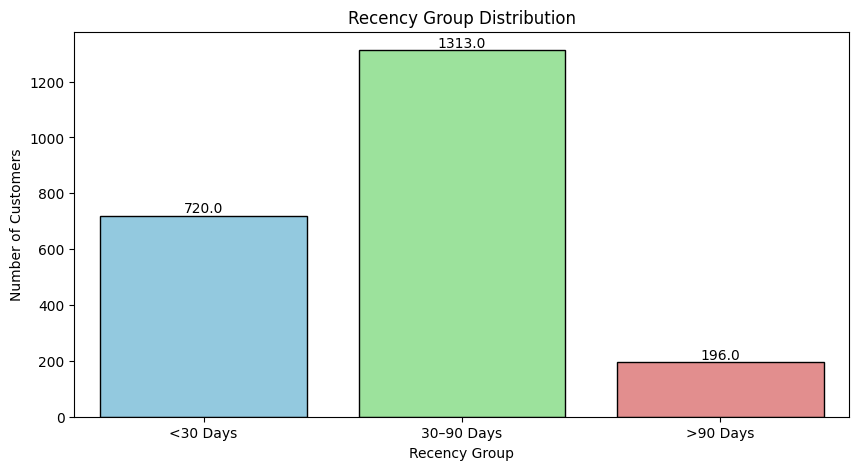

In [243]:
# Bar chart for Recency Groups
plt.figure(figsize=(10, 5))
sns.countplot(x='Recency_Group', data=df, palette=palette, edgecolor='k')
plt.title('Recency Group Distribution')
plt.xlabel('Recency Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()

**Insight**
- The "30–90 Days" group has the highest number of customers (1,313), signifying a strong base of moderately recent buyers.
- The "<30 Days" group, with 720 customers, represents a significant segment of actively engaged and recent purchasers.
- The ">90 Days" group, with only 196 customers, highlights a small proportion of less engaged or inactive customers.

#### **10 - 15. MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**
Represents the amount spent on product categories in the last 2 years

In [244]:
# Check data types and ranges
for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}")
    print()

MntWines - Min: 0, Max: 1493

MntFruits - Min: 0, Max: 199

MntMeatProducts - Min: 0, Max: 1725

MntFishProducts - Min: 0, Max: 259

MntSweetProducts - Min: 0, Max: 263

MntGoldProds - Min: 0, Max: 362



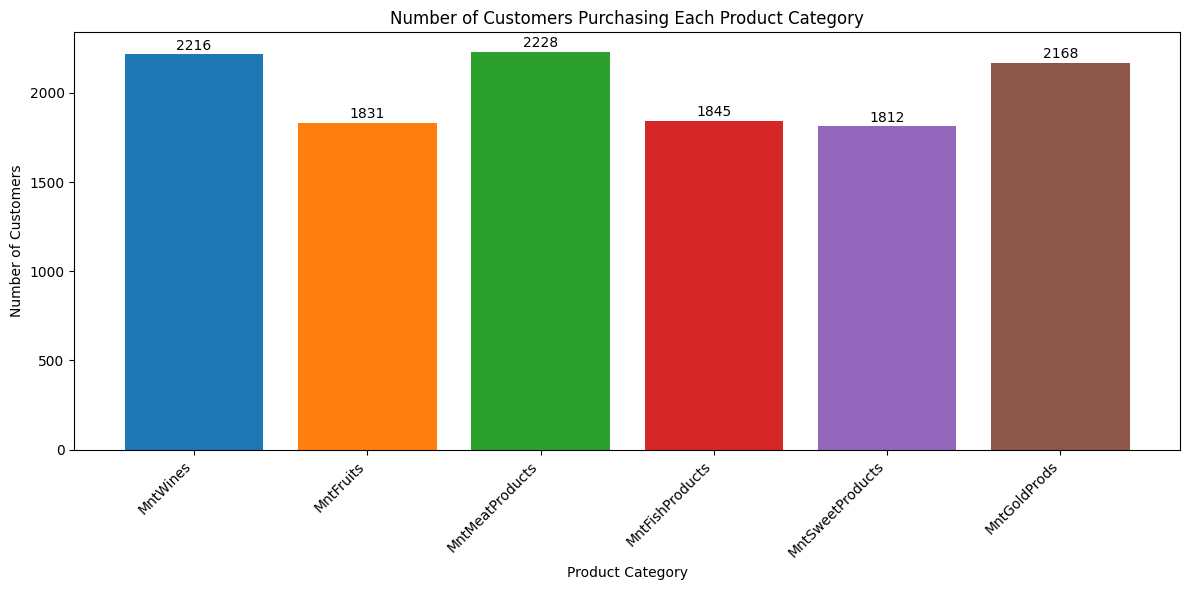

In [245]:
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

plt.figure(figsize=(12, 6))
for category in product_categories:
    customer_counts = df[df[category] > 0]['ID'].count()
    bar = plt.bar(category, customer_counts)
    # Add annotation
    plt.text(
        category,
        customer_counts + 10,
        str(customer_counts),
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.title("Number of Customers Purchasing Each Product Category")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

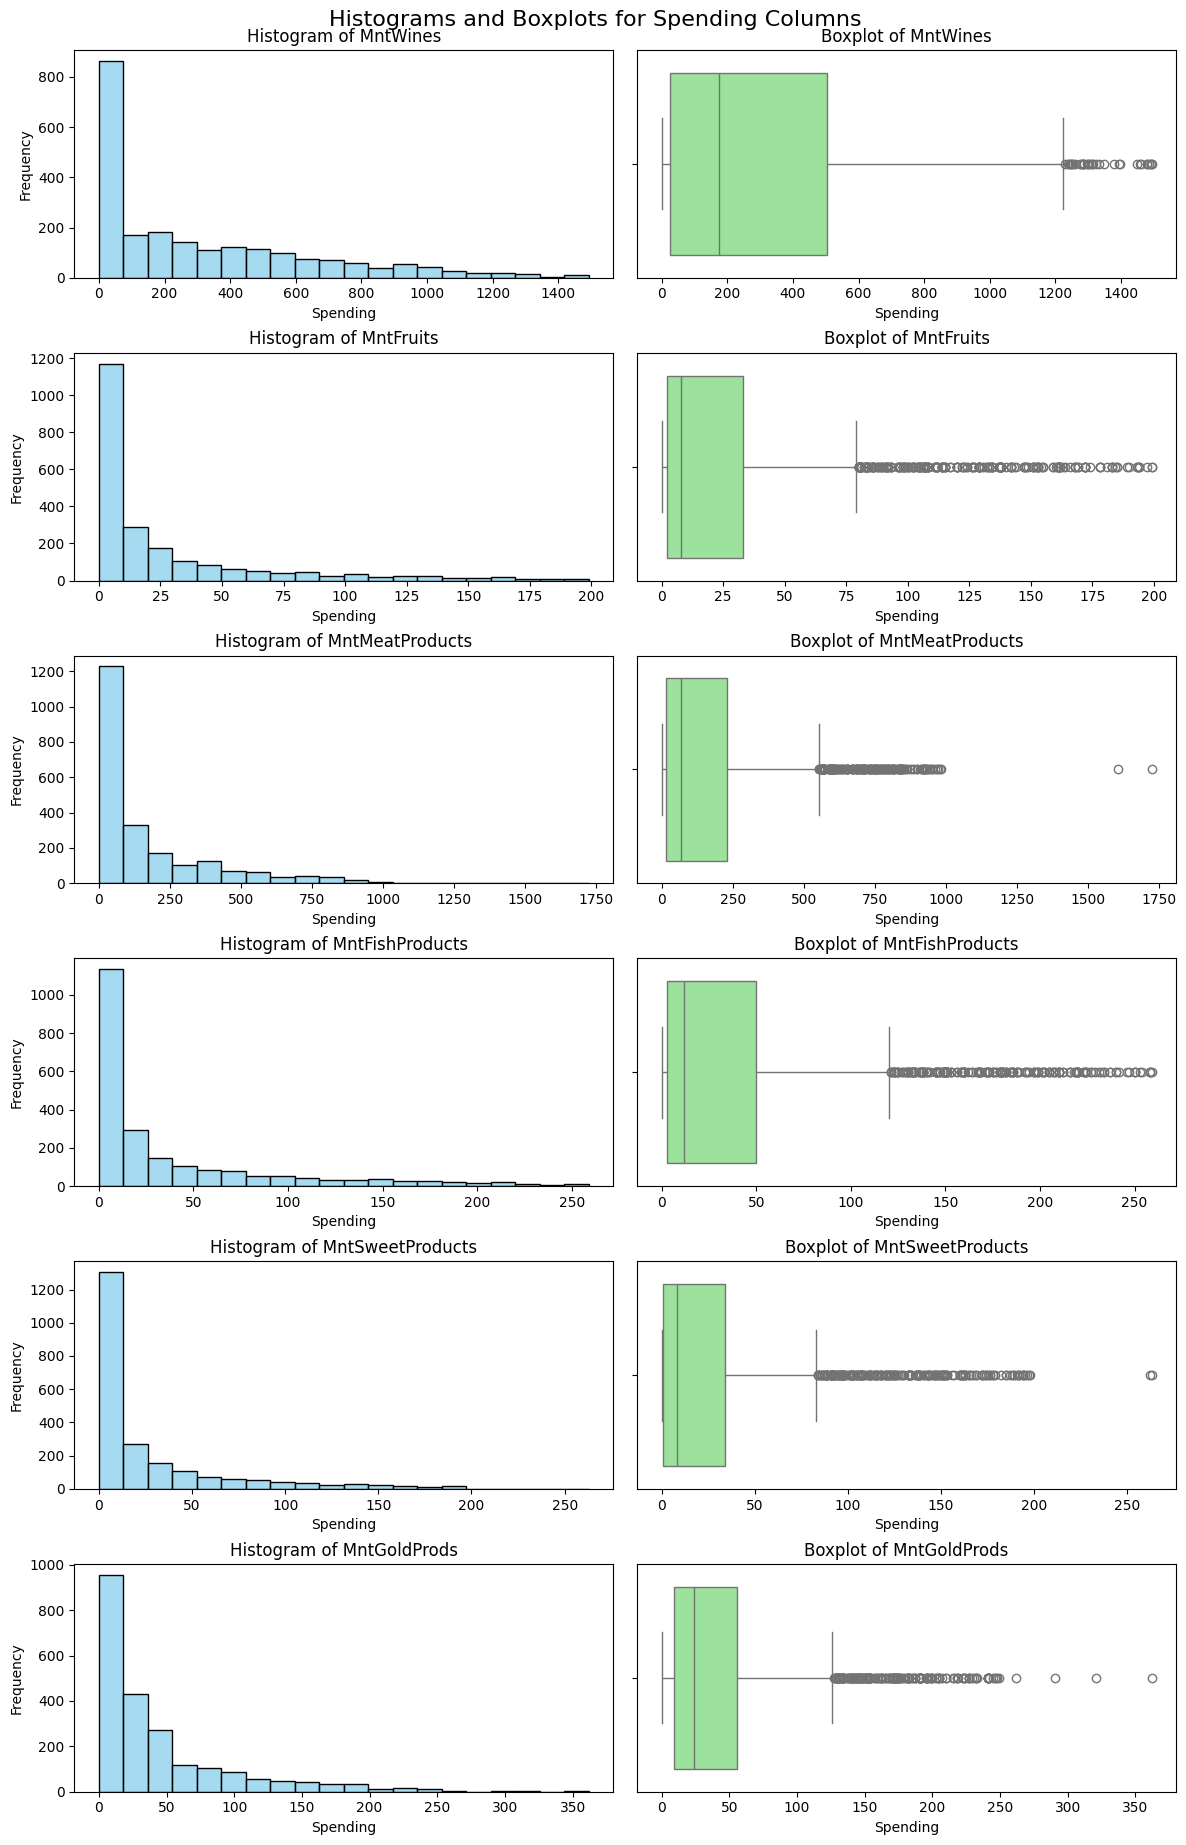

In [246]:
# List of spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(nrows=len(spending_columns), ncols=2, figsize=(12, 20))
fig.suptitle('Histograms and Boxplots for Spending Columns', fontsize=16, y=0.92)

# Loop through each column and plot histogram and boxplot
for i, col in enumerate(spending_columns):
    # Histogram
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i, 0], color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('Spending')
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel('Spending')
    axes[i, 1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for the suptitle
plt.show()


**Insight**
- Spending data reflects variations in customer purchasing behavior rather than errors or anomalies. High-spending customers (e.g., for MntWines or MntMeatProducts) might represent luxury buyers or highly loyal customers.
- Therefore removing the outliers might cause the high-value customers to be overlooked.

##### Data Manipulation

In [247]:
# Calculate total spending
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df.insert(df.columns.get_loc('MntGoldProds') + 1, 'Total_Spending', df.pop('Total_Spending'))

In [248]:
# Create a new column 'Spending_Group' based on 'Total_Spending'
bins = [0, 1000, 1500, df['Total_Spending'].max()]
labels = ['Low', 'Medium', 'High']
df['Spending_Group'] = pd.cut(df['Total_Spending'], bins=bins, labels=labels, include_lowest=True)
df.insert(df.columns.get_loc('Total_Spending') + 1, 'Spending_Group', df.pop('Spending_Group'))

# Group by 'Spending_Group' and perform calculations if needed
spending_summary = df.groupby('Spending_Group')['Total_Spending'].agg(['count', 'mean', 'median', 'min', 'max'])
spending_summary

count         mean  median   min   max
Spending_Group                                        
Low              1631   293.733906   149.0     5   999
Medium            356  1221.747191  1196.0  1001  1497
High              242  1800.533058  1735.5  1501  2525

In [249]:
# Identify dominant spending category
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Dominant_Category'] = df[spending_categories].idxmax(axis=1)
df.insert(df.columns.get_loc('Total_Spending') + 1, 'Dominant_Category', df.pop('Dominant_Category'))


**Explanation**

1. **Total_Spending:**
    - The sum of spending across all product categories for each customer.

2. **Spending_Group:**
   - Categorizes customers into `Low`, `Medium`, and `High` tiers based on `Total_Spending` using logical thresholds (≤1,000, 1,001–1,500, >1,500).

3. **Dominant_Category:**
   - Identifies the product category with the highest spending for each customer.

##### Descriptive Summary

In [250]:
# Calculate and display descriptive statistics
for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode()[0]
    min_value = df[col].min()
    max_value = df[col].max()
    range_value = max_value - min_value
    variance_value = df[col].var()
    std_dev_value = df[col].std()

    print(f"{col} Statistics:")
    print(f"Mean      : {mean_value:.2f}")
    print(f"Median    : {median_value:.2f}")
    print(f"Mode      : {mode_value}")
    print(f"Min       : {min_value}")
    print(f"Max       : {max_value}")
    print(f"Range     : {range_value}")
    print(f"Variance  : {variance_value:.2f}")
    print(f"Std Dev   : {std_dev_value:.2f}")
    print()

MntWines Statistics:
Mean      : 304.99
Median    : 176.00
Mode      : 2
Min       : 0
Max       : 1493
Range     : 1493
Variance  : 113408.61
Std Dev   : 336.76

MntFruits Statistics:
Mean      : 26.35
Median    : 8.00
Mode      : 0
Min       : 0
Max       : 199
Range     : 199
Variance  : 1581.18
Std Dev   : 39.76

MntMeatProducts Statistics:
Mean      : 165.28
Median    : 67.00
Mode      : 7
Min       : 0
Max       : 1725
Range     : 1725
Variance  : 48108.54
Std Dev   : 219.34

MntFishProducts Statistics:
Mean      : 37.64
Median    : 12.00
Mode      : 0
Min       : 0
Max       : 259
Range     : 259
Variance  : 2992.15
Std Dev   : 54.70

MntSweetProducts Statistics:
Mean      : 27.16
Median    : 8.00
Mode      : 0
Min       : 0
Max       : 263
Range     : 263
Variance  : 1708.91
Std Dev   : 41.34

MntGoldProds Statistics:
Mean      : 44.11
Median    : 24.00
Mode      : 1
Min       : 0
Max       : 362
Range     : 362
Variance  : 2713.50
Std Dev   : 52.09



In [251]:
# Calculate and display key statistics
mean_Total_Spending = df['Total_Spending'].mean()
median_Total_Spending = df['Total_Spending'].median()
mode_Total_Spending = df['Total_Spending'].mode()[0]
min_Total_Spending = df['Total_Spending'].min()
max_Total_Spending = df['Total_Spending'].max()
range_Total_Spending = max_recency - min_recency
variance_Total_Spending = df['Total_Spending'].var()
std_dev_Total_Spending = df['Total_Spending'].std()

print("Total_Spending Statistics:")
print(f"Mean      : {mean_Total_Spending:.2f}")
print(f"Median    : {median_Total_Spending:.2f}")
print(f"Mode      : {mode_Total_Spending}")
print(f"Min       : {min_Total_Spending}")
print(f"Max       : {max_Total_Spending}")
print(f"Range     : {range_Total_Spending}")
print(f"Variance  : {variance_Total_Spending:.2f}")
print(f"Std Dev   : {std_dev_Total_Spending:.2f}")

Total_Spending Statistics:
Mean      : 605.54
Median    : 397.00
Mode      : 46
Min       : 5
Max       : 2525
Range     : 99
Variance  : 361239.74
Std Dev   : 601.03


In [252]:
# Frequency of Spending_Group
df['Spending_Group'].value_counts()

Spending_Group
Low       1631
Medium     356
High       242
Name: count, dtype: int64

In [253]:
# Frequency of Dominant_Category
df['Dominant_Category'].value_counts()

Dominant_Category
MntWines            1533
MntMeatProducts      439
MntGoldProds         167
MntFishProducts       59
MntSweetProducts      16
MntFruits             15
Name: count, dtype: int64

**Insights**

**Spending Statistics:**
1. **MntWines:**
   - Maximum spending reaches 1,493, reflecting its popularity.

2. **MntFruits:**
   - Average spending is low (mean: 26.35), with most spending under 25.
   - Maximum spending of 199 indicates niche customers interest.

3. **MntMeatProducts:**
   - Second-highest mean spending at 165.28, with some customers spending as much as 1,725.
   - Median spending (67) indicates typical spending is moderate.

4. **MntFishProducts:**
   - Average spending (37.64) is relatively low compared to meat or wine.
   - Indicates fish products are less prominent.

5. **MntSweetProducts:**
   - Spending is low on average (mean: 27.16), with a few customers spending up to 263.

6. **MntGoldProds:**
   - Mean spending (44.11) is slightly higher than sweets and fruits.

7. **Total_Spending:**
   - The range of spending (5–2,525) highlights diverse customer purchasing power.

---

**Spending Group Distribution:**
1. **Low Spending Group:**
   - The majority of customers (1,631) fall into this group, spending ≤1,000.
   - Represents customers with lower purchasing power or engagemen.

2. **Medium Spending Group:**
   - Comprises 356 customers with spending between 1,001 and 1,500.
   - Indicates moderately engaged customers.

3. **High Spending Group:**
   - The smallest group (242 customers) but with the highest spending (>1,500).
   - Represents high-value customers with high spending contribution.

---

**Dominant Spending Category:**
1. **MntWines:**
   - Most customers (1,533) spend the most on wines, making it the dominant category.
   - Indicates wine is a strong revenue driver.

2. **MntMeatProducts:**
   - Meat products are the second dominant category (439 customers).

3. **Other Categories:**
   - MntGoldProds (167) dominates spending for a smaller but notable customer base.
   - Categories like MntFishProducts, MntSweetProducts, and MntFruits dominate for few customers.

---

##### Visualization


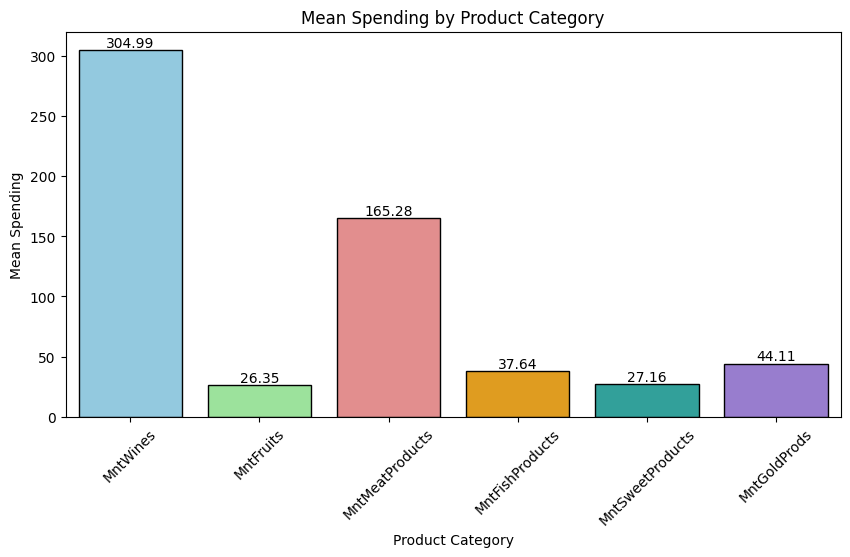

In [254]:
# Mean spending bar chart
plt.figure(figsize=(10, 5))
mean_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
sns.barplot(x=mean_spending.index, y=mean_spending.values, edgecolor='black', palette=palette)
plt.title('Mean Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Spending')
plt.xticks(rotation=45)

# Add annotation
for i, value in enumerate(mean_spending.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

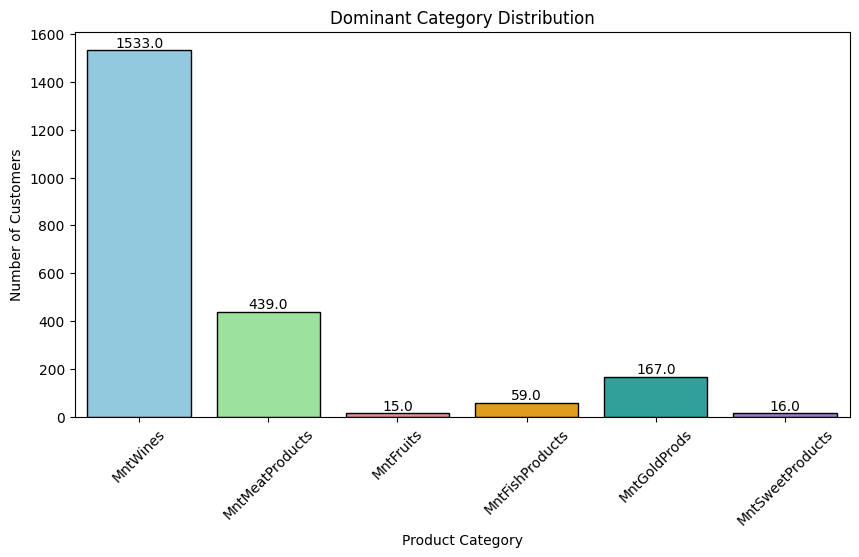

In [255]:
# Bar chart for Dominant Categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Dominant_Category', data=df, palette=palette, edgecolor='k')
plt.title('Dominant Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Add annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

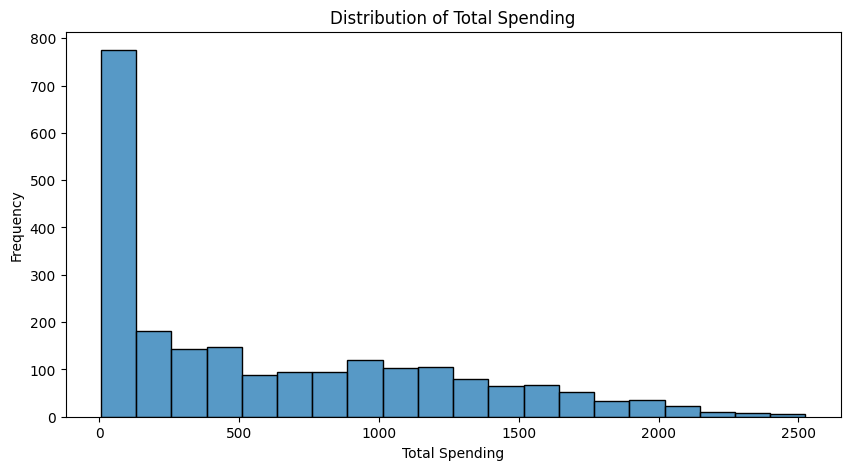

In [256]:
# Histogram for Total_Spending
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Spending'], bins=20, kde=False, edgecolor='black')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

**Insights**

**Mean Spending by Product Category:**
1. **MntWines (304.99):**
   - The highest mean spending, emphasizing wine as the top revenue-generating category.
2. **MntMeatProducts (165.28):**
   - Second-highest spending, showing consistent demand for meat products.
3. **Other Categories:**
   - Spending on fruits (26.35), fish (37.64), sweets (27.16), and gold products (44.11) is much lower, indicating niche preferences.

---

**Dominant Category Distribution:**
1. **MntWines (1,533):**
   - Dominates as the most frequent category, showing strong customer preference for wine.
2. **MntMeatProducts (439):**
   - The second-most dominant category, highlighting broader appeal.
3. **Other Categories:**
   - Fish (59), sweets (16), and fruits (15) represent small customer segments.

---

**Distribution of Total Spending:**
- The spending distribution is highly right-skewed, with most customers spending less than 500.
- A small group of high spenders (above 1,500) significantly impacts total revenue, underscoring the importance of retaining these customers.

#### **16. NumDealsPurchases**
Represents number of purchases made with a discount

In [257]:
df['NumDealsPurchases'].value_counts()

NumDealsPurchases
1     967
2     497
3     297
4     188
5      94
6      61
0      41
7      40
8      14
9       8
15      5
10      5
11      5
12      4
13      3
Name: count, dtype: int64

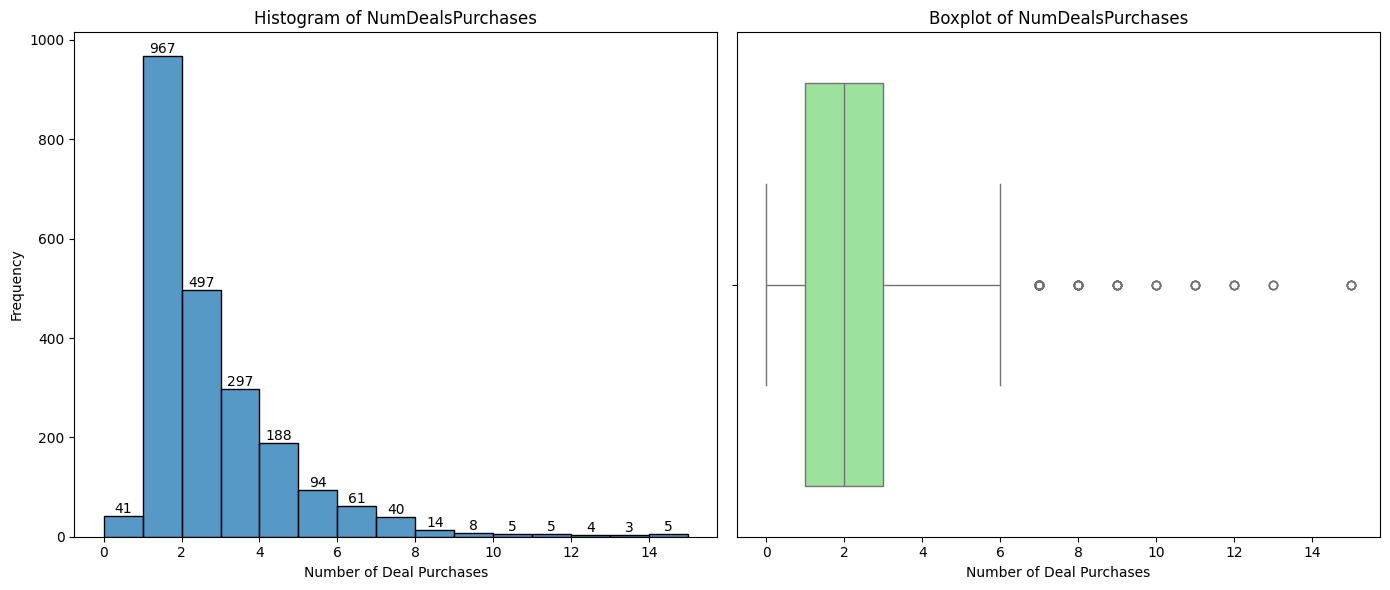

In [258]:
# Create histogram and boxplot
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['NumDealsPurchases'], bins=15, kde=False, edgecolor='black')
plt.title('Histogram of NumDealsPurchases')
plt.xlabel('Number of Deal Purchases')
plt.ylabel('Frequency')

# add annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['NumDealsPurchases'], color='lightgreen')
plt.title('Boxplot of NumDealsPurchases')
plt.xlabel('Number of Deal Purchases')

plt.tight_layout()
plt.show()

**Insight**
1. **Frequency Distribution:**
   - Most customers (967) made just one deal purchase, followed by 497 customers making two deal purchases.
   - The frequency decreases sharply as the number of deal purchases increases, indicating that higher deal purchases are less common.

2. **Histogram:**
   - The distribution is heavily right-skewed, with the majority of customers making fewer than four deal purchases.
   - Very few customers made more than six deal purchases.

3. **Boxplot:**
   - The interquartile range (IQR) spans from 1 to 4 deal purchases, highlighting typical customer behavior.
   - Outliers are visible beyond six purchases, suggesting a small subset of customers engages heavily in deal purchases.


##### Data Manipulation

In [259]:
# Categorize deal purchases
bins = [0, 2, 5, df['NumDealsPurchases'].max()]
labels = ['No/Low', 'Medium', 'High']
df['Deal_Purchase_Category'] = pd.cut(df['NumDealsPurchases'], bins=bins, labels=labels, include_lowest=True)
df.insert(df.columns.get_loc('NumDealsPurchases') + 1, 'Deal_Purchase_Category', df.pop('Deal_Purchase_Category'))

**Explanation**

Categorize customer based on number of deal purchases
1. **No/Low (0–2 deal purchases):**
   - Customers in this category rarely engage in deal purchases or only occasionally take advantage of promotional offers.

2. **Medium (3–5 deal purchases):**
   - Represents customers who show moderate interest in promotional deals, potentially balancing between regular and discount-driven shopping.

3. **High (6+ deal purchases):**
   - A small group of customers who frequently purchase during promotions, indicating strong preference for value-for-money transactions.

##### Descriptive Summary

In [260]:
# Descriptive statistics
mean_value = df['NumDealsPurchases'].mean()
median_value = df['NumDealsPurchases'].median()
mode_value = df['NumDealsPurchases'].mode()[0]
min_value = df['NumDealsPurchases'].min()
max_value = df['NumDealsPurchases'].max()
range_value = max_value - min_value
variance_value = df['NumDealsPurchases'].var()
std_dev_value = df['NumDealsPurchases'].std()

print("NumDealsPurchases Statistics:")
print(f"Mean      : {mean_value:.2f}")
print(f"Median    : {median_value}")
print(f"Mode      : {mode_value}")
print(f"Min       : {min_value}")
print(f"Max       : {max_value}")
print(f"Range     : {range_value}")
print(f"Variance  : {variance_value:.2f}")
print(f"Std Dev   : {std_dev_value:.2f}")

NumDealsPurchases Statistics:
Mean      : 2.32
Median    : 2.0
Mode      : 1
Min       : 0
Max       : 15
Range     : 15
Variance  : 3.59
Std Dev   : 1.90


In [261]:
# Count Deal_Purchase_Category
df['Deal_Purchase_Category'].value_counts()

Deal_Purchase_Category
No/Low    1505
Medium     579
High       145
Name: count, dtype: int64

**Summary**

- **Mean:** 2.33 deal purchases, indicating most customers engage in few promotional purchases.
- **Median:** 2, suggesting half the customers make two or fewer deal purchases.
- **Mode:** 1, confirming that single deal purchases are the most common behavior.
- **Range:** 0–15, showing significant variability, with a small subset making many deal purchases.
---
**Deal_Purchase_Category Distribution:**
1. **No/Low (0–2 deal purchases):**
   - The largest category, containing 1,510 customers, indicating occasional or no use of promotional offers.

2. **Medium (3–5 deal purchases):**
   - Contains 579 customers, reflecting moderate engagement with deals.

3. **High (6+ deal purchases):**
   - The smallest group, with 147 customers, showcasing a segment of highly deal-driven buyers.

##### Visualization

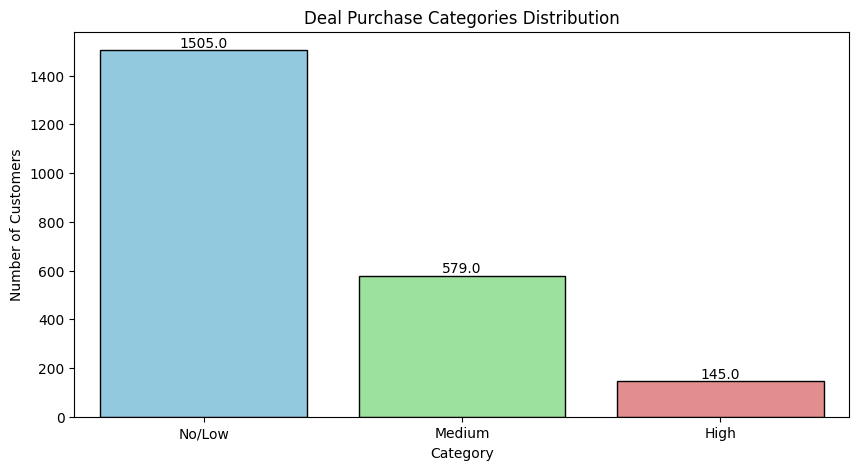

In [262]:
# Bar chart for Deal Purchase Categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Deal_Purchase_Category', data=df, palette=palette, edgecolor='k')
plt.title('Deal Purchase Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add Annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

**Insight**

1. **No/Low Category:**
   - The largest group, with 1,505 customers, representing the majority who make few or no deal purchases, highlights a general trend of low reliance on promotions for most customers.

2. **Medium Category:**
   - A moderate segment, with around 600 customers showing regular engagement with deals.

3. **High Category:**
   - The smallest group, with fewer than 150 customers, consisting of highly deal-driven buyers.

#### **17 - 22. AcceptedCmp1-5 & Response**
Binary indicator of whether the customer accepted Campaign 1-5 and Response (The last campaign)

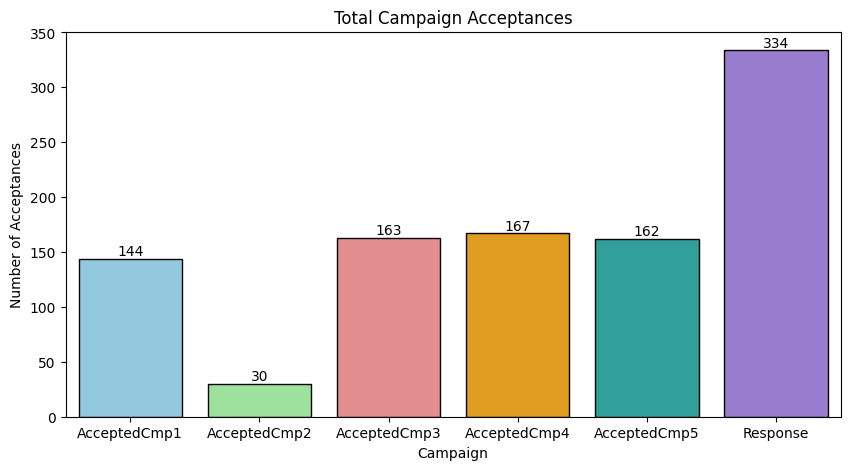

In [263]:
# Aggregate campaign acceptances
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
acceptance_counts = df[campaign_columns].sum()

# Bar chart for campaign acceptances
plt.figure(figsize=(10, 5))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, edgecolor='black', palette=palette)
plt.title('Total Campaign Acceptances')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.xticks(rotation=0)

# Add annotation
for i, count in enumerate(acceptance_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

**Insight**
- The majority of campaigns have high acceptance rates, demonstrating effective targeting or appealing offers, except for Campaign 2.

##### Data Manipulation

In [264]:
# Total campaigns accepted
df['Total_Campaign_Acceptances'] = df[campaign_columns].sum(axis=1)
df.insert(df.columns.get_loc('AcceptedCmp2') + 1, 'Total_Campaign_Acceptances', df.pop('Total_Campaign_Acceptances'))


In [265]:
# Campaign responder flag
df['Is_Campaign_Responder'] = df['Total_Campaign_Acceptances'].apply(lambda x: 1 if x > 0 else 0)
df.insert(df.columns.get_loc('Total_Campaign_Acceptances') + 1, 'Is_Campaign_Responder', df.pop('Is_Campaign_Responder'))


In [266]:
# Reorder columns
cols = df.columns.tolist()
# Move AcceptedCmp1 - AcceptedCmp5 to the position after NumWebVisitMonth
cols = [col for col in cols if col not in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
insert_pos = cols.index('NumWebVisitsMonth') + 1
cols = cols[:insert_pos] + ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'] + cols[insert_pos:]
df = df[cols]

**Explanation**

- **Total_Campaign_Acceptances** allows the identification of customers who are actively engaging with campaigns
- The **Is_Campaign_Responder** flag provides an easy way to separate engaged customers from those who do not respond.

##### Descriptive Summary

In [267]:
df['Total_Campaign_Acceptances'].value_counts()

Total_Campaign_Acceptances
0    1621
1     369
2     142
3      51
4      36
5      10
Name: count, dtype: int64

In [268]:
# Responder proportions
responder_proportions = df['Total_Campaign_Acceptances'].value_counts(normalize=True) * 100
responder_proportions

Total_Campaign_Acceptances
0    72.723194
1    16.554509
2     6.370570
3     2.288022
4     1.615074
5     0.448632
Name: proportion, dtype: float64

In [269]:
df['Is_Campaign_Responder'].value_counts()

Is_Campaign_Responder
0    1621
1     608
Name: count, dtype: int64

In [270]:
# Responder proportions
responder_proportions = df['Is_Campaign_Responder'].value_counts(normalize=True) * 100
responder_proportions

Is_Campaign_Responder
0    72.723194
1    27.276806
Name: proportion, dtype: float64

##### Visualization

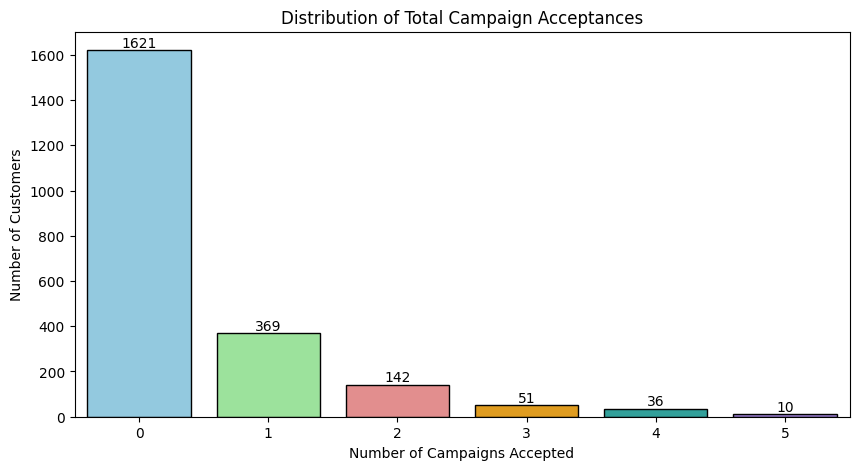

In [271]:
# Bar chart for Total Campaign Acceptances
plt.figure(figsize=(10, 5))
sns.countplot(x='Total_Campaign_Acceptances', data=df, palette=palette, edgecolor='k')
plt.title('Distribution of Total Campaign Acceptances')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add Annotation
for i, count in enumerate(df['Total_Campaign_Acceptances'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

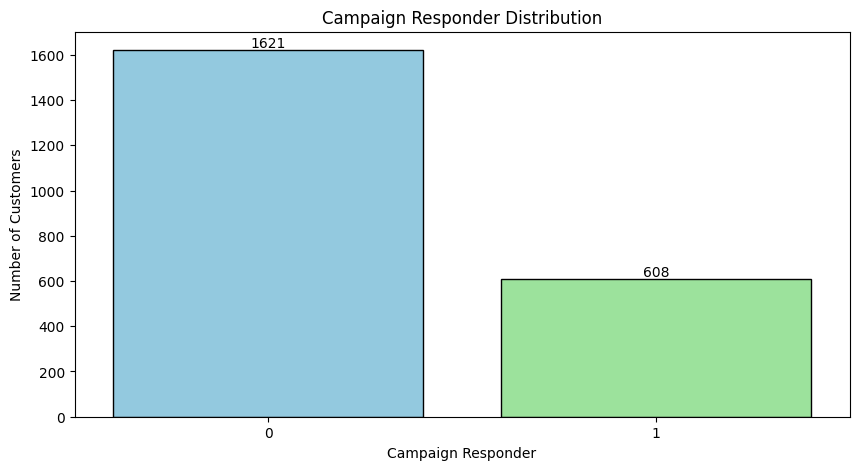

In [272]:
# Bar chart for Campaign_Responder
plt.figure(figsize=(10, 5))
sns.countplot(x='Is_Campaign_Responder', data=df, palette=palette, edgecolor='k')
plt.title('Campaign Responder Distribution')
plt.xlabel('Campaign Responder')
plt.ylabel('Number of Customers')

# Add annotation
for i, count in enumerate(df['Is_Campaign_Responder'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

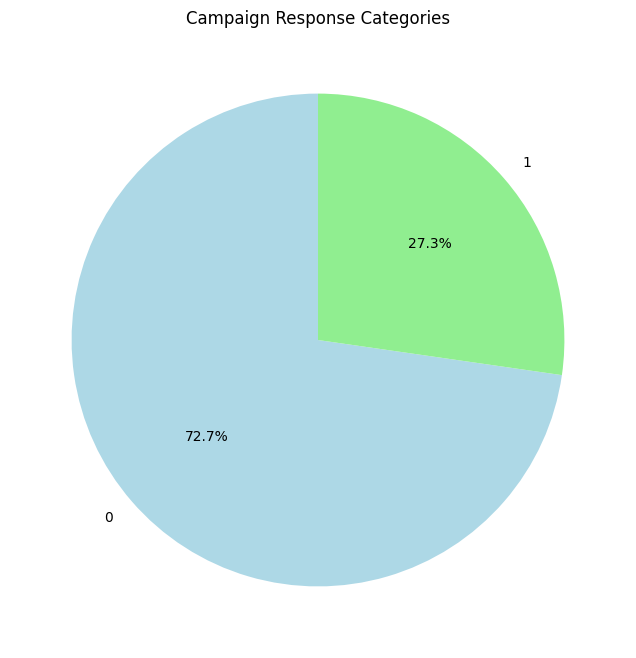

In [273]:
# Pie chart for Campaign Response Categories
plt.figure(figsize=(10, 5))
df['Is_Campaign_Responder'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Campaign Response Categories')
plt.ylabel('')
plt.show()

**Insight**

**Total_Campaign_Acceptances:**
1. **Non-Responders (0 acceptances):**
   - A large majority (1,621 customers, ~72%) did not accept any campaign, indicating low engagement.
2. **Single Acceptance:**
   - 369 customers (~16%) accepted only one campaign, representing occasional campaign responders.
3. **Multiple Acceptances:**
   - A small group of 239 customers (~12%) accepted two or more campaigns, showing engagement across campaigns.
---
**Is_Campaign_Responder:**
1. **Non-Responders:**
   - 1621 (72.7%) of the customers are non-responders, suggesting campaigns are failing to capture the attention of most customers.
   - 608 (27.3%) of customers responded to at least one campaign.

#### **23. Complain**

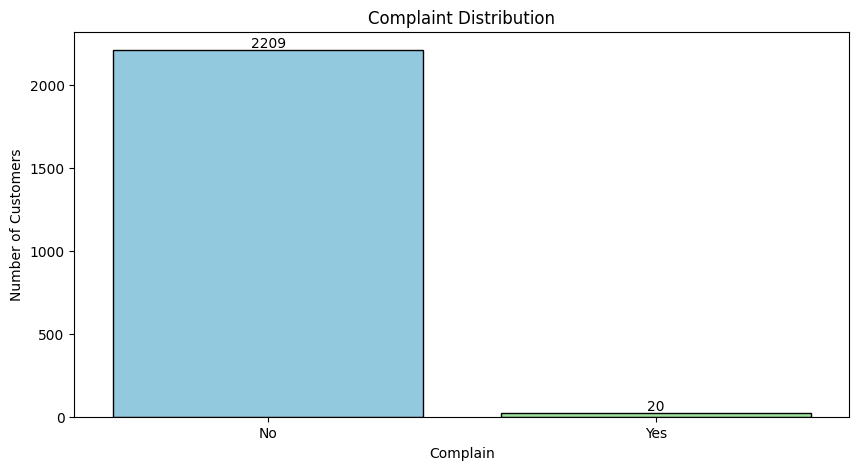

In [274]:
# Bar chart for Complain distribution
complain_counts = df['Complain'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=complain_counts.index, y=complain_counts.values, edgecolor='black', palette=palette)
plt.title('Complaint Distribution')
plt.xlabel('Complain')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)

# Add Annotation
for i, count in enumerate(complain_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


Insight

- The vast majority of customers (2,209 or ~99%) have not registered a complaint.
- Only a small fraction (20 or ~1%) have filed a complaint.
- Complaints are extremely rare, suggesting high customer satisfaction.

#### **24 - 25. NumWebPurchases, NumCatalogPurchases, NumStorePurchases**

In [275]:
# Check data types and ranges
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for col in channel_columns:
    print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}")
    print()

NumWebPurchases - Min: 0, Max: 27

NumCatalogPurchases - Min: 0, Max: 28

NumStorePurchases - Min: 0, Max: 13



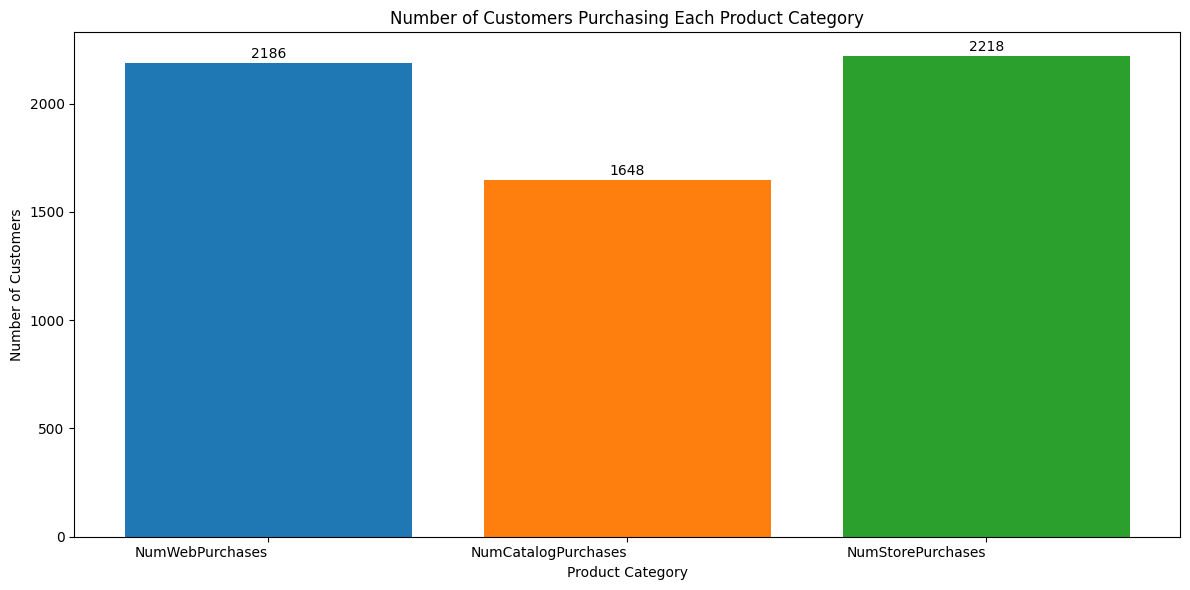

In [276]:
categories = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
plt.figure(figsize=(12, 6))
for category in categories:
    customer_counts = df[df[category] > 0]['ID'].count()
    bar = plt.bar(category, customer_counts)
    # Add annotation
    plt.text(
        category,
        customer_counts + 10,
        str(customer_counts),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xlabel("Product Category")
plt.ylabel("Number of Customers")
plt.title("Number of Customers Purchasing Each Product Category")
plt.xticks(rotation=0, ha="right")
plt.tight_layout()

plt.show()

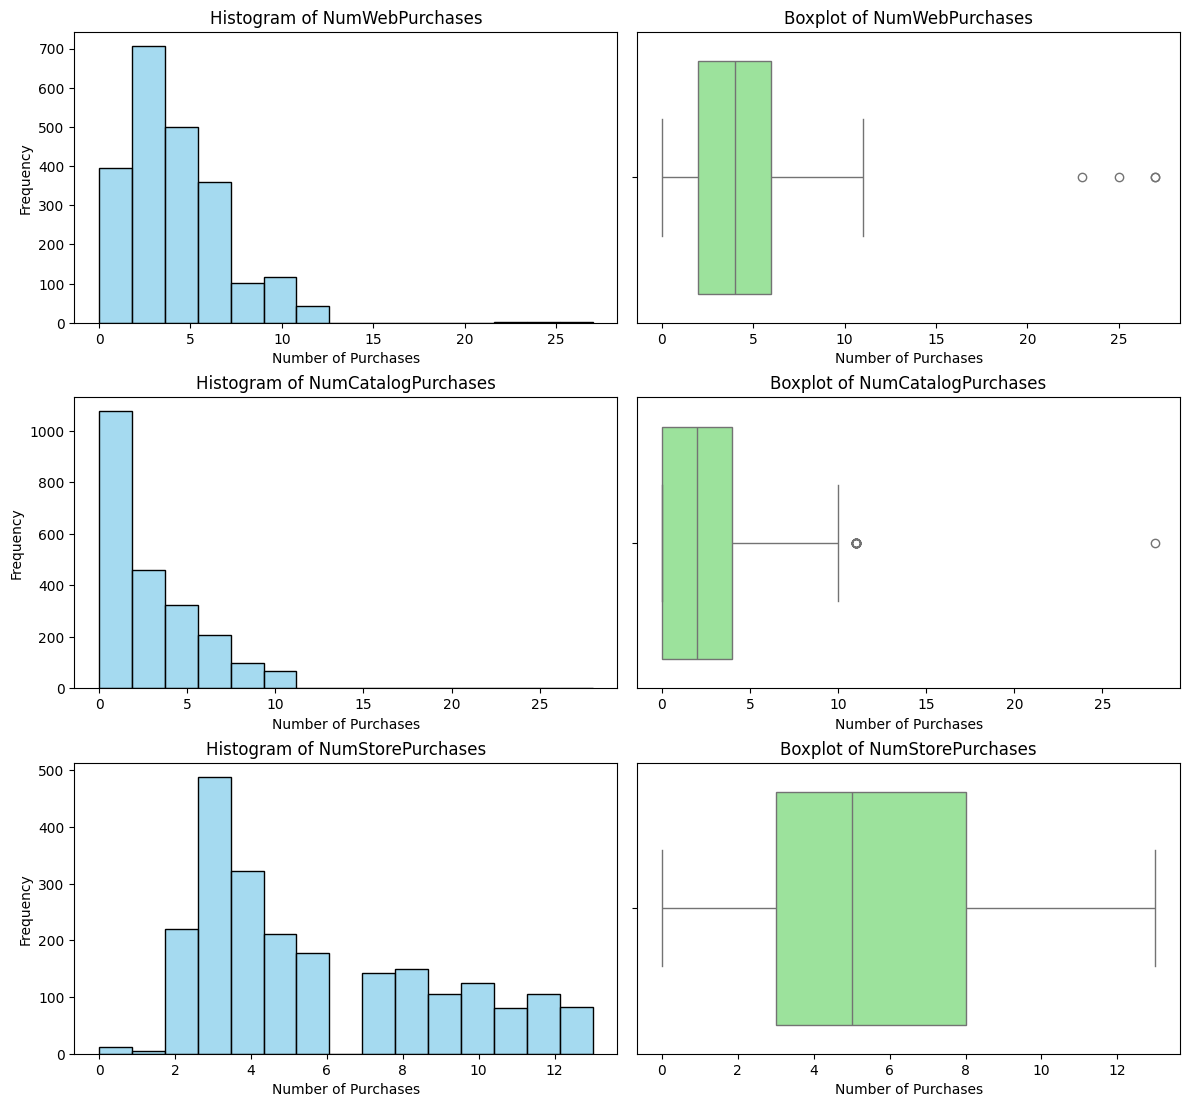

In [277]:
fig, axes = plt.subplots(nrows=len(channel_columns), ncols=2, figsize=(12, 12))

for i, col in enumerate(channel_columns):
    # Histogram
    sns.histplot(df[col], bins=15, kde=False, ax=axes[i, 0], color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('Number of Purchases')
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel('Number of Purchases')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Insight

- **NumWebPurchases:** Most customers make 0–5 web purchases, with few outliers reaching up to more than 25 purchases.
- **NumCatalogPurchases:** Catalog purchases are minimal, with most customers making 0–3 purchases and rare outliers exceeding 10.
- **NumStorePurchases:** In-store purchases are diverse, with most customers making 2–6 purchases and no significant outliers.

##### Data Manipulation

In [278]:
# Calculate Total Purchases
df['Total_Purchases'] = df[channel_columns].sum(axis=1)
df[['Total_Purchases']].value_counts()
df.insert(df.columns.get_loc('NumStorePurchases') + 1, 'Total_Purchases', df.pop('Total_Purchases'))

In [279]:
# Calculate Dominant Channel
df['Dominant_Channel'] = df[channel_columns].idxmax(axis=1)
df[['Dominant_Channel']].value_counts()
df.insert(df.columns.get_loc('Total_Purchases') + 1, 'Dominant_Channel', df.pop('Dominant_Channel'))

In [280]:
df

ID  Year_Birth  Age    Age_Group Education Marital_Status   Income  \
0      5524        1957   57     Boomers+  Bachelor         Single  58138.0   
1      2174        1954   60     Boomers+  Bachelor         Single  46344.0   
2      4141        1965   49        Gen X  Bachelor        Married  71613.0   
3      6182        1984   30  Millennials  Bachelor        Married  26646.0   
4      5324        1981   33  Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...          ...       ...            ...      ...   
2235  10870        1967   47        Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68     Boomers+  Doctoral        Married  64014.0   
2237   7270        1981   33  Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58     Boomers+    Master        Married  69245.0   
2239   9405        1954   60     Boomers+  Doctoral        Married  52869.0   

     Income_Group  Kidhome  Teenhome  Total_Kids  Has_Kids  No_Kids  \
0          Medium        0         0           0         0        1   
1          Medium        1         1           2         1        0   
2          Medium        0         0           0         0        1   
3             Low        1         0           1         1        0   
4          Medium        1         0           1         1        0   
...           ...      ...       ...         ...       ...      ...   
2235       Medium        0         1           1         1        0   
2236       Medium        2         1           3         1        0   
2237       Medium        0         0           0         0        1   
2238       Medium        0         1           1         1        0   
2239       Medium        1         1           2         1        0   

     Dt_Customer  Customer_Tenure Tenure_Group  Recency Recency_Group  \
0     2012-09-04              663    1-2 Years       58    30–90 Days   
1     2014-03-08              113    0-1 Years       38    30–90 Days   
2     2013-08-21              312    0-1 Years       26      <30 Days   
3     2014-02-10              139    0-1 Years       26      <30 Days   
4     2014-01-19              161    0-1 Years       94      >90 Days   
...          ...              ...          ...      ...           ...   
2235  2013-06-13              381    1-2 Years       46    30–90 Days   
2236  2014-06-10               19    0-1 Years       56    30–90 Days   
2237  2014-01-25              155    0-1 Years       91      >90 Days   
2238  2014-01-24              156    0-1 Years        8      <30 Days   
2239  2012-10-15              622    1-2 Years       40    30–90 Days   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  Total_Spending Dominant_Category Spending_Group  \
0               88            1617          MntWines           High   
1                6              27          MntWines            Low   
2               42             776          MntWines            Low   
3                5              53   MntMeatProducts            Low   
4 

Explanation
- The `Total_Purchases` column represents the sum of purchases across all channels (web, catalog, and store) for each customer.
- The `Dominant_Channel` column indicates the channel where a customer has made the highest number of purchases (e.g., `NumWebPurchases`, `NumCatalogPurchases`, or `NumStorePurchases`).

##### Descriptive Summary

In [281]:
for col in channel_columns + ['Total_Purchases']:
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode()[0]
    min_value = df[col].min()
    max_value = df[col].max()
    range_value = max_value - min_value
    variance_value = df[col].var()
    std_dev_value = df[col].std()

    print(f"{col} Statistics:")
    print(f"Mean      : {mean_value:.2f}")
    print(f"Median    : {median_value}")
    print(f"Mode      : {mode_value}")
    print(f"Min       : {min_value}")
    print(f"Max       : {max_value}")
    print(f"Range     : {range_value}")
    print(f"Variance  : {variance_value:.2f}")
    print(f"Std Dev   : {std_dev_value:.2f}")
    print()

NumWebPurchases Statistics:
Mean      : 4.10
Median    : 4.0
Mode      : 2
Min       : 0
Max       : 27
Range     : 27
Variance  : 7.70
Std Dev   : 2.78

NumCatalogPurchases Statistics:
Mean      : 2.64
Median    : 2.0
Mode      : 0
Min       : 0
Max       : 28
Range     : 28
Variance  : 7.82
Std Dev   : 2.80

NumStorePurchases Statistics:
Mean      : 5.81
Median    : 5.0
Mode      : 3
Min       : 0
Max       : 13
Range     : 13
Variance  : 10.51
Std Dev   : 3.24

Total_Purchases Statistics:
Mean      : 12.55
Median    : 12.0
Mode      : 4
Min       : 0
Max       : 32
Range     : 32
Variance  : 51.58
Std Dev   : 7.18



In [282]:
# Dominant Channel counts
df['Dominant_Channel'].value_counts()

Dominant_Channel
NumStorePurchases      1476
NumWebPurchases         597
NumCatalogPurchases     156
Name: count, dtype: int64

##### Visualization

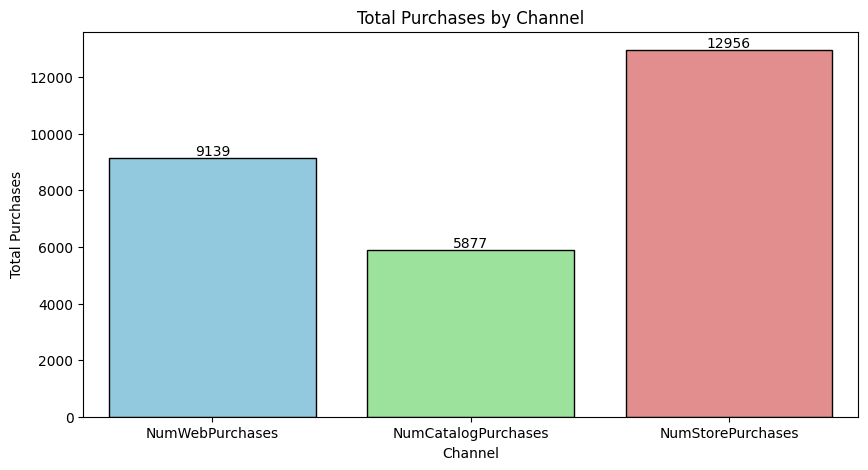

In [283]:
# Total purchases by channel
channel_totals = df[channel_columns].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=channel_totals.index, y=channel_totals.values, palette=palette, edgecolor='black')
plt.title('Total Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Total Purchases')
plt.xticks(rotation=0)

# Add Annotation
for i, count in enumerate(channel_totals):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


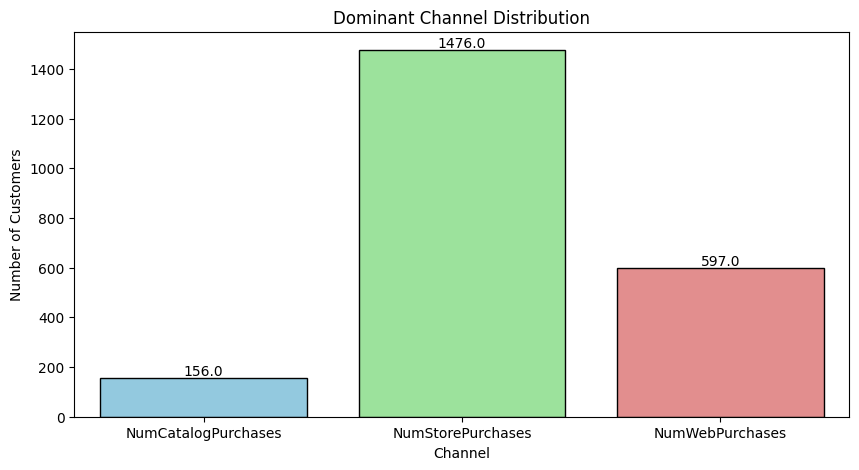

In [284]:
# Total Purchase by channel (NumWebPurchases, NumCatalogPurchases, NumStorePurchases)
plt.figure(figsize=(10, 5))
sns.countplot(x='Dominant_Channel', data=df, palette=palette, edgecolor='k')
plt.title('Dominant Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')

# Add annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

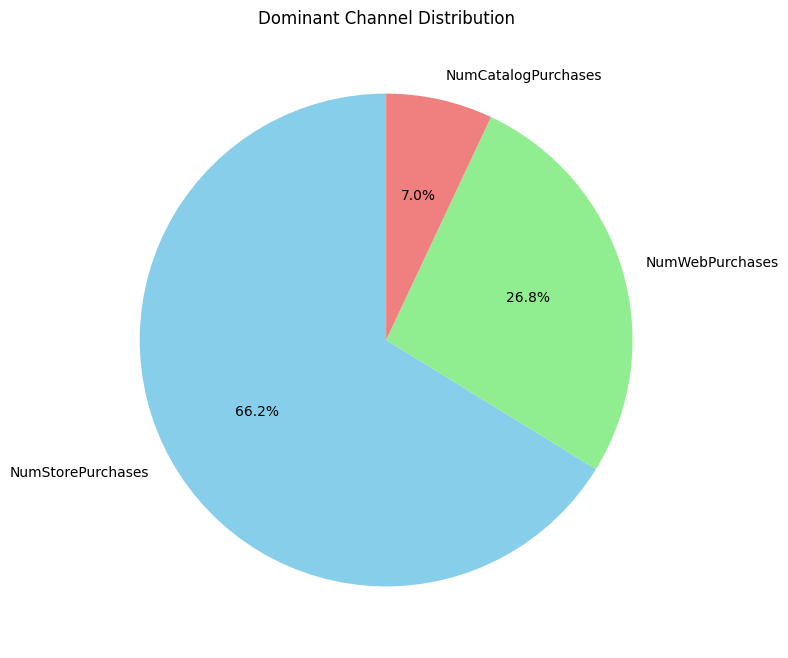

In [285]:
# Pie chart Dominant Channel distribution
plt.figure(figsize=(10, 5))
df['Dominant_Channel'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=palette)
plt.title('Dominant Channel Distribution')
plt.ylabel('')
plt.show()

**Insights**

1. **Total Purchases by Channel**:
   - NumStorePurchases dominates with a total of 12,956 purchases, highlighting that the store is the primary shopping channel for customers.
   - NumWebPurchases accounts for 9,139 purchases, making it the second most popular channel.
   - NumCatalogPurchases has the least total with 5,877 purchases, suggesting it is the least used channel.

2. **Dominant Channel Distribution**:
   - NumStorePurchases is the dominant channel for the majority of customers (1,476 customers), accounting for 66.2% of the total.
   - NumWebPurchases is dominant for 597 customers, representing 26.8% of the total.
   - NumCatalogPurchases is dominant for only 156 customers, making up 7% of the total.

#### **26. NumWebVisitsMonth**

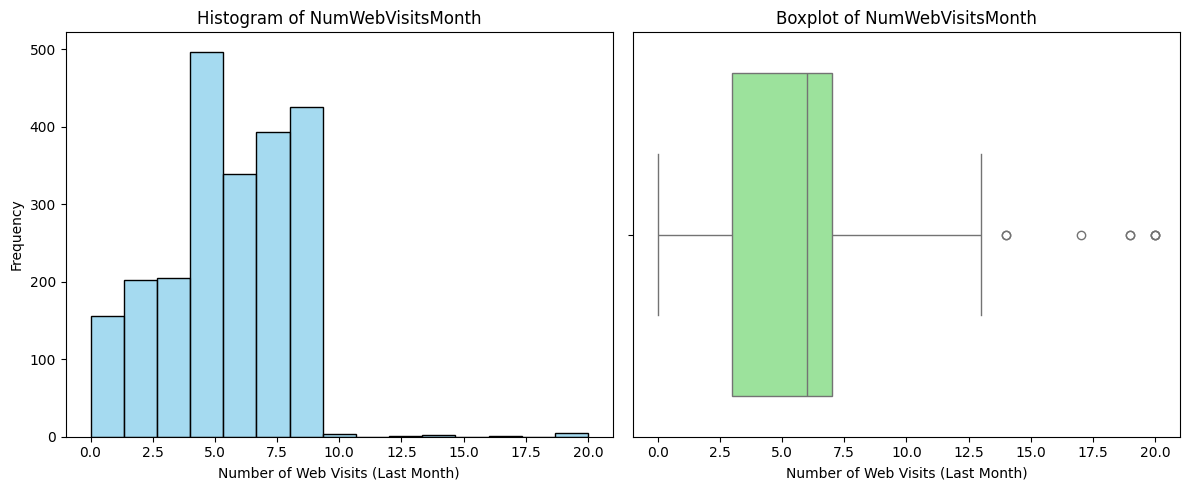

In [286]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['NumWebVisitsMonth'], bins=15, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of NumWebVisitsMonth')
plt.xlabel('Number of Web Visits (Last Month)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['NumWebVisitsMonth'], color='lightgreen')
plt.title('Boxplot of NumWebVisitsMonth')
plt.xlabel('Number of Web Visits (Last Month)')

plt.tight_layout()
plt.show()


**Insight**

1. **Distribution**:
   - The histogram shows that most customers had between **5 to 7 web visits** in the last month, indicating a moderate level of online engagement.
   - A small number of customers had **10 or more visits**, suggesting heavy web users.

2. **Boxplot Analysis**:
   - The median number of visits is around **5-6 visits**, with the range spanning **4 to 8 visits**.
   - A few extreme outliers are present with **15-20 visits**, representing highly active online users.


##### Data Manipulation

In [287]:
# Categorize visit frequency
bins = [0, 1, 5, df['NumWebVisitsMonth'].max()]
labels = ['Low', 'Medium', 'High']
df['Visit_Frequency_Category'] = pd.cut(df['NumWebVisitsMonth'], bins=bins, labels=labels, include_lowest=True)
df.insert(df.columns.get_loc('NumWebVisitsMonth') + 1, 'Visit_Frequency_Category', df.pop('Visit_Frequency_Category'))

df['Visit_Frequency_Category'].value_counts()

Visit_Frequency_Category
High      1169
Medium     904
Low        156
Name: count, dtype: int64

In [288]:
visit_frequency_percentage = df['Visit_Frequency_Category'].value_counts(normalize=True) * 100
visit_frequency_percentage

Visit_Frequency_Category
High      52.445043
Medium    40.556303
Low        6.998654
Name: proportion, dtype: float64

**Insight**

- **High Frequency (1169 customers, 6–20 visits)**: The majority group (54%), indicating high online engagement. They may benefit from targeted exclusive offers.
- **Medium Frequency (904 customers, 2–5 visits)**: A significant portion (40%) with room to convert to the high-frequency group through personalized promotions.
- **Low Frequency (156 customers, 0–1 visits)**: Smallest group (7%), suggesting barriers or disinterest in online interaction. Requires attention to improve engagement.


##### Descriptive Summary

In [289]:
# Descriptive statistics
mean_value = df['NumWebVisitsMonth'].mean()
median_value = df['NumWebVisitsMonth'].median()
mode_value = df['NumWebVisitsMonth'].mode()[0]
min_value = df['NumWebVisitsMonth'].min()
max_value = df['NumWebVisitsMonth'].max()
range_value = max_value - min_value
variance_value = df['NumWebVisitsMonth'].var()
std_dev_value = df['NumWebVisitsMonth'].std()

print("NumWebVisitsMonth Statistics:")
print(f"Mean      : {mean_value:.2f}")
print(f"Median    : {median_value}")
print(f"Mode      : {mode_value}")
print(f"Min       : {min_value}")
print(f"Max       : {max_value}")
print(f"Range     : {range_value}")
print(f"Variance  : {variance_value:.2f}")
print(f"Std Dev   : {std_dev_value:.2f}")

NumWebVisitsMonth Statistics:
Mean      : 5.33
Median    : 6.0
Mode      : 7
Min       : 0
Max       : 20
Range     : 20
Variance  : 5.83
Std Dev   : 2.41


##### Visualization

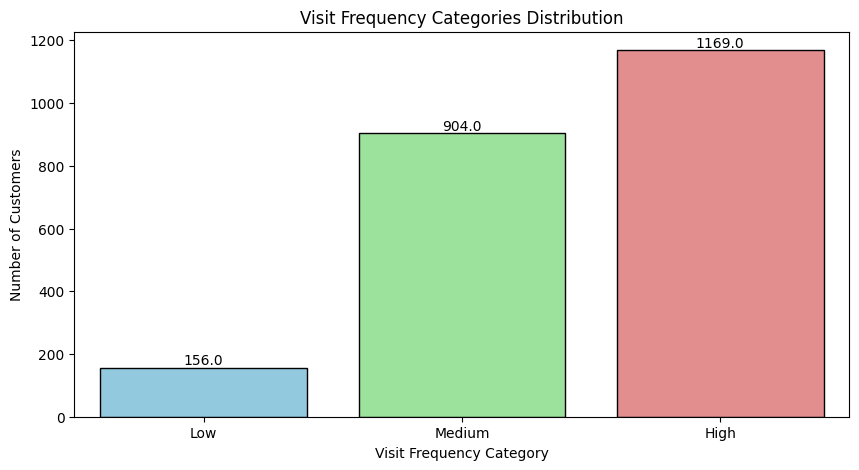

In [290]:
# Bar chart for Visit Frequency Categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Visit_Frequency_Category', data=df, palette=palette, edgecolor='k')
plt.title('Visit Frequency Categories Distribution')
plt.xlabel('Visit Frequency Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Add Annotation
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

**Insight**

- **High Frequency**: The majority of customers (1169, 54.1%) fall into the "High" category, indicating frequent web visits.  
- **Medium Frequency**: A significant portion (904, 41.8%) engage moderately with web channels.
- **Low Frequency**: A smaller group (156, 7.2%) shows minimal engagement with web channels.


## **Save cleaned data**

In [291]:
# export df as csv to the same directory as the first df
df.to_csv('df_cleaned.csv', index=False)

In [292]:
df

ID  Year_Birth  Age    Age_Group Education Marital_Status   Income  \
0      5524        1957   57     Boomers+  Bachelor         Single  58138.0   
1      2174        1954   60     Boomers+  Bachelor         Single  46344.0   
2      4141        1965   49        Gen X  Bachelor        Married  71613.0   
3      6182        1984   30  Millennials  Bachelor        Married  26646.0   
4      5324        1981   33  Millennials  Doctoral        Married  58293.0   
...     ...         ...  ...          ...       ...            ...      ...   
2235  10870        1967   47        Gen X  Bachelor        Married  61223.0   
2236   4001        1946   68     Boomers+  Doctoral        Married  64014.0   
2237   7270        1981   33  Millennials  Bachelor       Divorced  56981.0   
2238   8235        1956   58     Boomers+    Master        Married  69245.0   
2239   9405        1954   60     Boomers+  Doctoral        Married  52869.0   

     Income_Group  Kidhome  Teenhome  Total_Kids  Has_Kids  No_Kids  \
0          Medium        0         0           0         0        1   
1          Medium        1         1           2         1        0   
2          Medium        0         0           0         0        1   
3             Low        1         0           1         1        0   
4          Medium        1         0           1         1        0   
...           ...      ...       ...         ...       ...      ...   
2235       Medium        0         1           1         1        0   
2236       Medium        2         1           3         1        0   
2237       Medium        0         0           0         0        1   
2238       Medium        0         1           1         1        0   
2239       Medium        1         1           2         1        0   

     Dt_Customer  Customer_Tenure Tenure_Group  Recency Recency_Group  \
0     2012-09-04              663    1-2 Years       58    30–90 Days   
1     2014-03-08              113    0-1 Years       38    30–90 Days   
2     2013-08-21              312    0-1 Years       26      <30 Days   
3     2014-02-10              139    0-1 Years       26      <30 Days   
4     2014-01-19              161    0-1 Years       94      >90 Days   
...          ...              ...          ...      ...           ...   
2235  2013-06-13              381    1-2 Years       46    30–90 Days   
2236  2014-06-10               19    0-1 Years       56    30–90 Days   
2237  2014-01-25              155    0-1 Years       91      >90 Days   
2238  2014-01-24              156    0-1 Years        8      <30 Days   
2239  2012-10-15              622    1-2 Years       40    30–90 Days   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  Total_Spending Dominant_Category Spending_Group  \
0               88            1617          MntWines           High   
1                6              27          MntWines            Low   
2               42             776          MntWines            Low   
3                5              53   MntMeatProducts            Low   
4 

In [293]:
# print column list
print(df.columns.tolist())

['ID', 'Year_Birth', 'Age', 'Age_Group', 'Education', 'Marital_Status', 'Income', 'Income_Group', 'Kidhome', 'Teenhome', 'Total_Kids', 'Has_Kids', 'No_Kids', 'Dt_Customer', 'Customer_Tenure', 'Tenure_Group', 'Recency', 'Recency_Group', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending', 'Dominant_Category', 'Spending_Group', 'NumDealsPurchases', 'Deal_Purchase_Category', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases', 'Dominant_Channel', 'NumWebVisitsMonth', 'Visit_Frequency_Category', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_Campaign_Acceptances', 'Is_Campaign_Responder', 'Complain']


# **3. Data Analysis**

In [294]:
df.head(3)

ID  Year_Birth  Age Age_Group Education Marital_Status   Income  \
0  5524        1957   57  Boomers+  Bachelor         Single  58138.0   
1  2174        1954   60  Boomers+  Bachelor         Single  46344.0   
2  4141        1965   49     Gen X  Bachelor        Married  71613.0   

  Income_Group  Kidhome  Teenhome  Total_Kids  Has_Kids  No_Kids Dt_Customer  \
0       Medium        0         0           0         0        1  2012-09-04   
1       Medium        1         1           2         1        0  2014-03-08   
2       Medium        0         0           0         0        1  2013-08-21   

   Customer_Tenure Tenure_Group  Recency Recency_Group  MntWines  MntFruits  \
0              663    1-2 Years       58    30–90 Days       635         88   
1              113    0-1 Years       38    30–90 Days        11          1   
2              312    0-1 Years       26      <30 Days       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   

   Total_Spending Dominant_Category Spending_Group  NumDealsPurchases  \
0            1617          MntWines           High                  3   
1              27          MntWines            Low                  2   
2             776          MntWines            Low                  1   

  Deal_Purchase_Category  NumWebPurchases  NumCatalogPurchases  \
0                 Medium                8                   10   
1                 No/Low                1                    1   
2                 No/Low                8                    2   

   NumStorePurchases  Total_Purchases     Dominant_Channel  NumWebVisitsMonth  \
0                  4               22  NumCatalogPurchases                  7   
1                  2                4    NumStorePurchases                  5   
2                 10               20    NumStorePurchases                  4   

  Visit_Frequency_Category  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     High             0             0             0   
1                   Medium             0             0             0   
2                   Medium             0             0             0   

   AcceptedCmp4  AcceptedCmp5  Response  Total_Campaign_Acceptances  \
0             0             0         1                           1   
1             0             0         0                           0   
2             0             0         0                           0   

   Is_Campaign_Responder  Complain  
0                      1         0  
1                      0         0  
2                      0         0

In [295]:
# List all column names
print(df.columns.tolist())


['ID', 'Year_Birth', 'Age', 'Age_Group', 'Education', 'Marital_Status', 'Income', 'Income_Group', 'Kidhome', 'Teenhome', 'Total_Kids', 'Has_Kids', 'No_Kids', 'Dt_Customer', 'Customer_Tenure', 'Tenure_Group', 'Recency', 'Recency_Group', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spending', 'Dominant_Category', 'Spending_Group', 'NumDealsPurchases', 'Deal_Purchase_Category', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases', 'Dominant_Channel', 'NumWebVisitsMonth', 'Visit_Frequency_Category', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Total_Campaign_Acceptances', 'Is_Campaign_Responder', 'Complain']


# **1. Customer Demographics**

## **Question 1: What is the relationship between customer demographics (Age, Income, Education, Marital_Status) and (`Total_Spending)?**

- Demographic factors such as age, income, education, and marital status often influence spending patterns.

**Age vs. Total Spending**

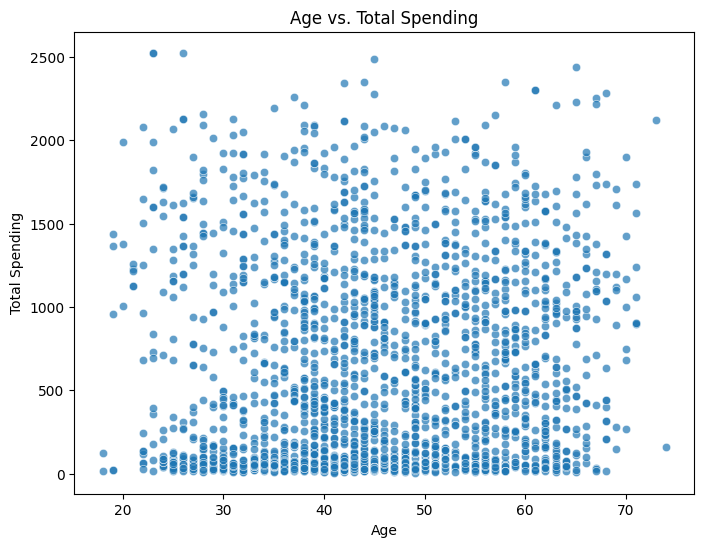

In [296]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Total_Spending', alpha=0.7)
plt.title('Age vs. Total Spending')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()

**Age vs. Total Spending**
- The scatterplot indicates that there is no clear linear relationship between age and total spending.
- Spending appears distributed evenly across all age groups, with no age group significantly outspending others.
- **Conclusion**: Age does not have a strong impact on total spending.

**Income vs. Total Spending**

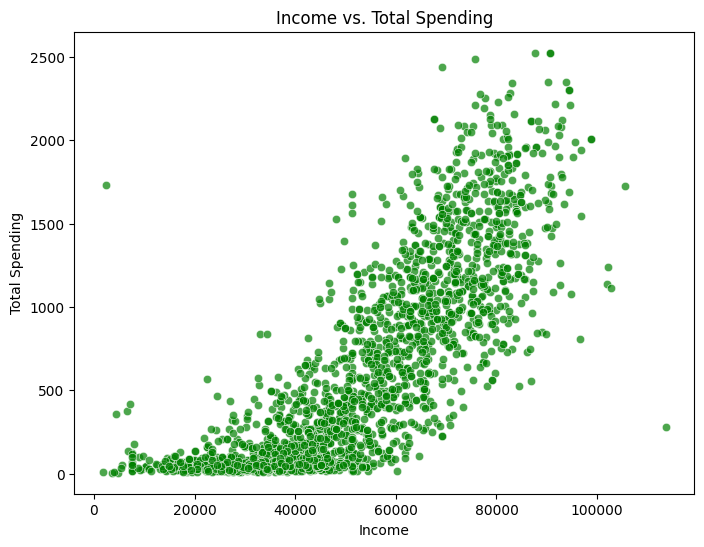

In [297]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending', alpha=0.7, color='green')
plt.title('Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

**Income vs. Total Spending**
- The scatterplot shows a positive relationship between income and total spending.
- Customers with higher incomes tend to spend more overall, indicating that income level strongly influences spending behavior.
- **Conclusion**: Income is a key determinant of total spending.

**Education vs. Total Spending**

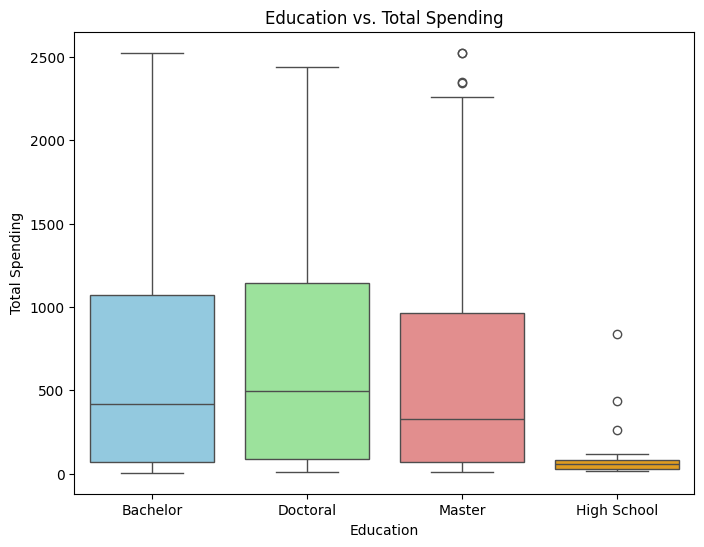

In [298]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Education', y='Total_Spending', palette=palette)
plt.title('Education vs. Total Spending')
plt.xlabel('Education')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.show()


**Education vs. Total Spending**
- The boxplot reveals that customers with higher education levels (Bachelor's, Master's, Doctorate) tend to spend more than those with a High School education.
- Spending distributions are similar across Bachelor’s, Master’s, and Doctorate holders, with no significant outliers.
- **Conclusion**: Higher education levels are associated with higher spending.

**Marital Status vs. Total Spending**

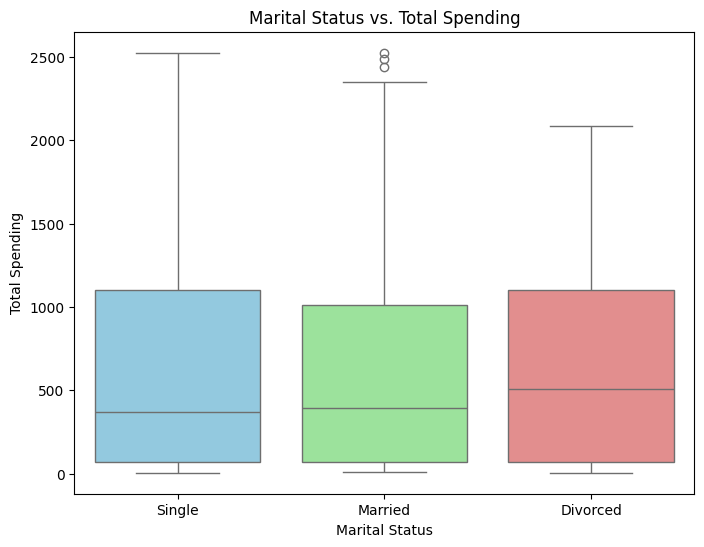

In [299]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Marital_Status', y='Total_Spending', palette=palette)
plt.title('Marital Status vs. Total Spending')
plt.xlabel('Marital Status')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)

plt.show()

In [300]:
marital_stats = df.groupby('Marital_Status')['Total_Spending'].agg(
    Mean='mean',Median='median',StdDev='std',Count='count'
).reset_index()

print(marital_stats)

  Marital_Status        Mean  Median      StdDev  Count
0       Divorced  646.527687   507.0  582.237173    307
1        Married  596.221448   395.5  596.270482   1436
2         Single  607.187243   369.0  626.343669    486


**Marital Status vs. Total Spending**
- The boxplot shows slight differences in spending between marital statuses.
  - **Divorced customers** have the highest mean spending (646.5) and median spending (507.0).
  - **Single customers** have slightly lower mean spending (607.2) and median spending (369.0).
  - **Married customers** have the lowest mean (596.2) and median (395.5) spending.

### **Insight**

The strongest demographic predictors of total spending are **income** (higher income leads to higher spending) and **education** (higher education levels are associated with increased spending). Other factors, such as **age** and **marital status**, have minimal influence on spending behavior.







## **Question 2 : How do income levels (Income_Group) relate to the likelihood of customers having children (Has_Kids)?**

- Income levels often influence family dynamics, including the decision to have children.

**Income Group vs. Having Children**

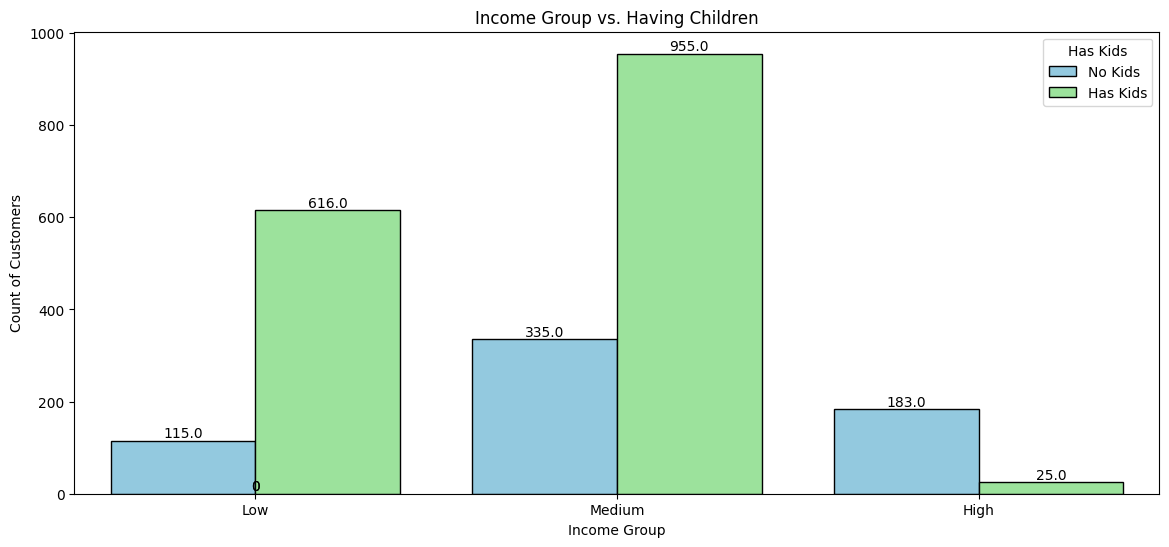

In [301]:
# Creating a grouped bar plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Income_Group', hue='Has_Kids', palette=palette, edgecolor='k')
plt.title('Income Group vs. Having Children')
plt.xlabel('Income Group')
plt.ylabel('Count of Customers')
plt.legend(title='Has Kids', labels=['No Kids', 'Has Kids'])

# Add Annotation value and percentage
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

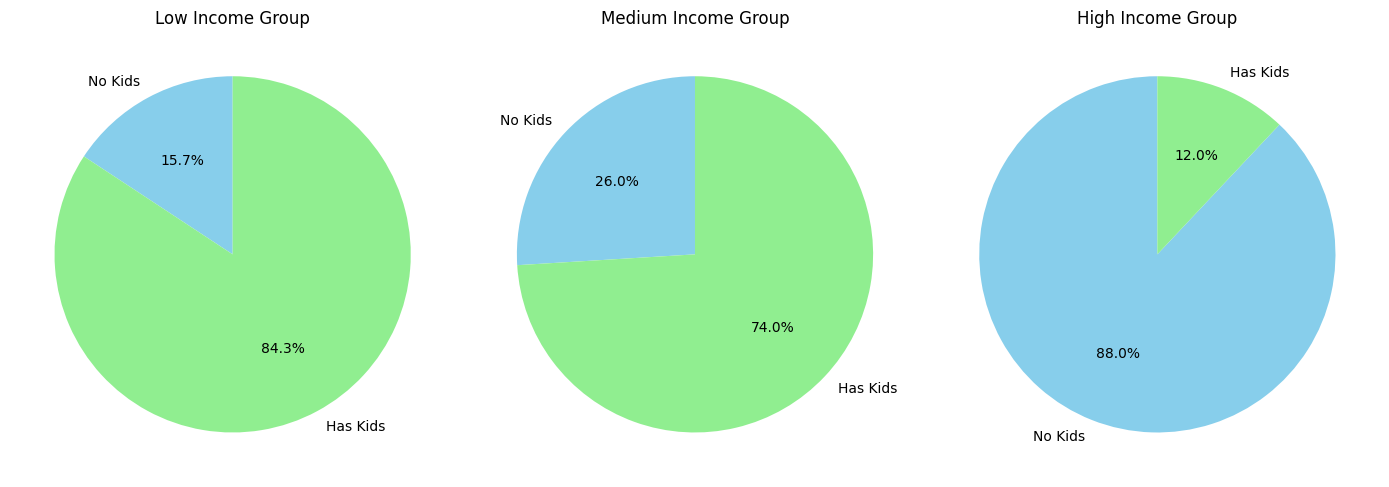

In [302]:
# Proportion of customers with and without kids for each income group
income_kids = df.groupby(['Income_Group', 'Has_Kids']).size().unstack()

plt.figure(figsize=(14, 6))

# Low Income Group
plt.subplot(1, 3, 1)
income_kids.loc['Low'].plot.pie(
    labels=['No Kids', 'Has Kids'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Low Income Group')
plt.ylabel('')

# Medium Income Group
plt.subplot(1, 3, 2)
income_kids.loc['Medium'].plot.pie(
    labels=['No Kids', 'Has Kids'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Medium Income Group')
plt.ylabel('')

# High Income Group
plt.subplot(1, 3, 3)
income_kids.loc['High'].plot.pie(
    labels=['No Kids', 'Has Kids'], autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('High Income Group')
plt.ylabel('')

plt.tight_layout()
plt.show()

**Income Group vs. Having Children**

The bar chart shows the total count of customers with and without children across different income groups.
- **Low Income Group**:
  - Majority of customers (616 out of 731, ~84.3%) have children.
  - Only 115 customers (~15.7%) do not have children.
- **Medium Income Group**:
  - A significant majority (955 out of 1,290, ~74%) have children.
  - 335 customers (~26%) do not have children.
- **High Income Group**:
  - The pattern is reversed: most customers (183 out of 208, ~88%) do not have children.
  - Only 25 customers (~12%) have children.

### **Insight**
- **Low Income Group**: This group is the most likely to have children, with a significant **84.3%** of customers having children. This suggests that lower-income households are more family-oriented, potentially prioritizing necessities and affordable family products.
- **Medium Income Group**: While the majority (74%) of customers in this group also have children, the balance is more even compared to the Low Income Group. Medium-income households might represent an intermediate demographic with a mix of family-focused and individual needs.
- **High Income Group**: This group stands out with **88%** of customers not having children. High-income households are more likely to have smaller or no families, which may imply a preference for luxury goods or individual-focused products over family-oriented ones.




# **2. Household Composition**


## **Question 3 : How does household composition (Kidhome, Teenhome, Total_Kids) affect spending on all product categories (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds)?**

- Household composition, such as the presence of small children or teenagers, can influence spending on family-related products like food and snacks.

In [303]:
# Summarizing average spending on all product categories by Total Kids
spending_summary = df.groupby('Total_Kids')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
spending_summary

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Total_Kids                                                            
0           489.868878  52.515008       369.372828        76.954186   
1           268.148709  19.418522        97.623330        26.737311   
2           141.726190   7.895238        51.383333        11.409524   
3           171.377358   6.905660        64.018868         7.075472   

            MntSweetProducts  MntGoldProds  
Total_Kids                                  
0                  53.369668     64.290679  
1                  20.379341     40.913624  
2                   8.388095     25.476190  
3                   6.622642     18.603774

**Total Kids vs. Spending on Wines**

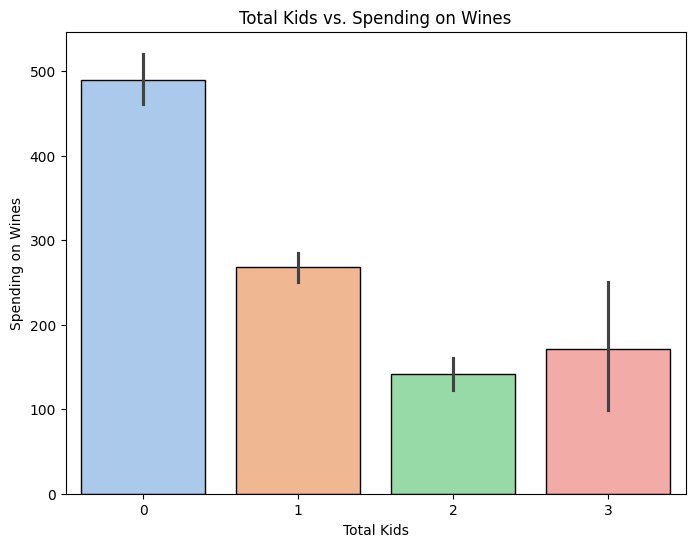

In [304]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntWines', palette='pastel', edgecolor='k')
plt.title('Total Kids vs. Spending on Wines')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Wines')
plt.show()

**1. Spending on Wines**
- Customers with **no kids** spend the most on wines (489.9), while spending drops significantly as the number of children increases.
- Households with **2 kids** spend the least on wines (141.7).

**Total Kids vs. Spending on Fruits**

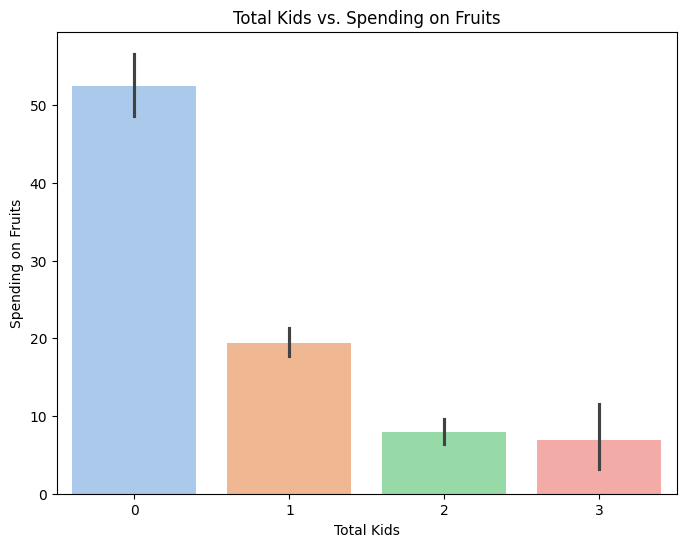

In [305]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntFruits', palette='pastel')
plt.title('Total Kids vs. Spending on Fruits')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Fruits')

plt.show()

**2. Spending on Fruits**
- Customers with **no kids** spend significantly more on fruits (52.5) compared to households with children.
- Spending drops progressively as the number of kids increases, with households having **3 kids** spending the least (6.9).

**Total Kids vs. Spending on Meat Products**

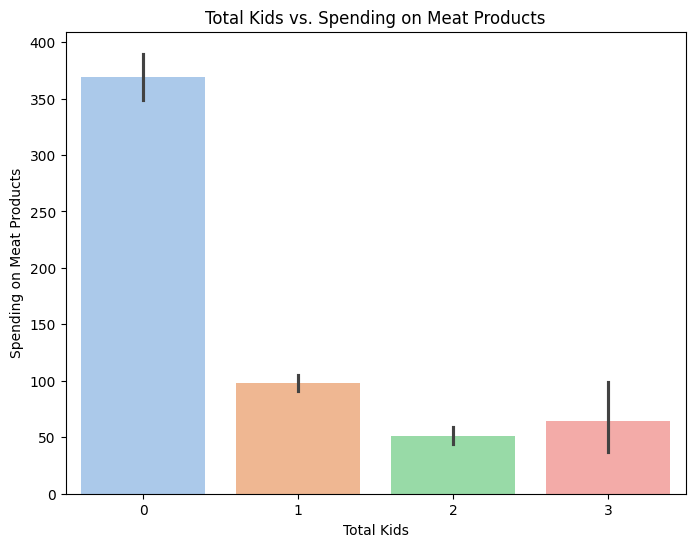

In [306]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntMeatProducts', palette='pastel')
plt.title('Total Kids vs. Spending on Meat Products')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Meat Products')
plt.show()


**3. Spending on Meat Products**
- Customers with **no kids** spend the highest amount on meat products (**369.4**), followed by households with **1 kid** (**97.6**).
- Spending continues to decrease for households with more children, reaching **64.0** for those with **3 kids**.


**Total Kids vs. Spending on Meat Products**

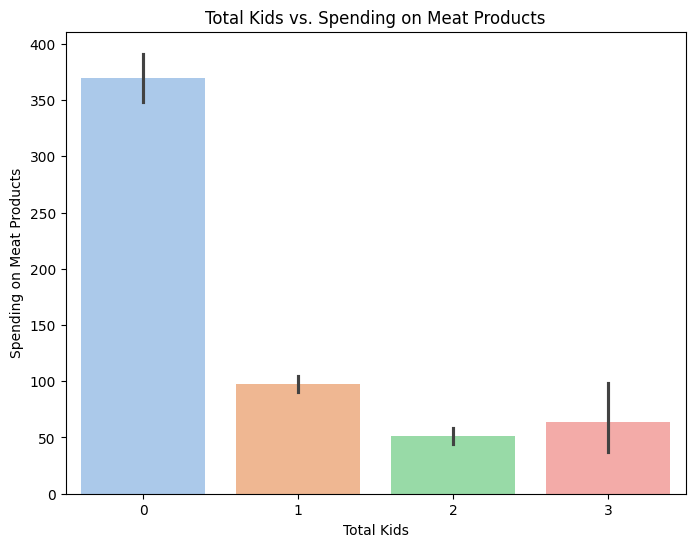

In [307]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntMeatProducts', palette='pastel')
plt.title('Total Kids vs. Spending on Meat Products')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Meat Products')
plt.show()


**3. Spending on Meat Products**
- Customers with **no kids** spend the highest amount on meat products (**369.4**), followed by households with **1 kid** (**97.6**).
- Spending continues to decrease for households with more children, reaching **64.0** for those with **3 kids**.

**Total Kids vs. Spending on Fish Products**

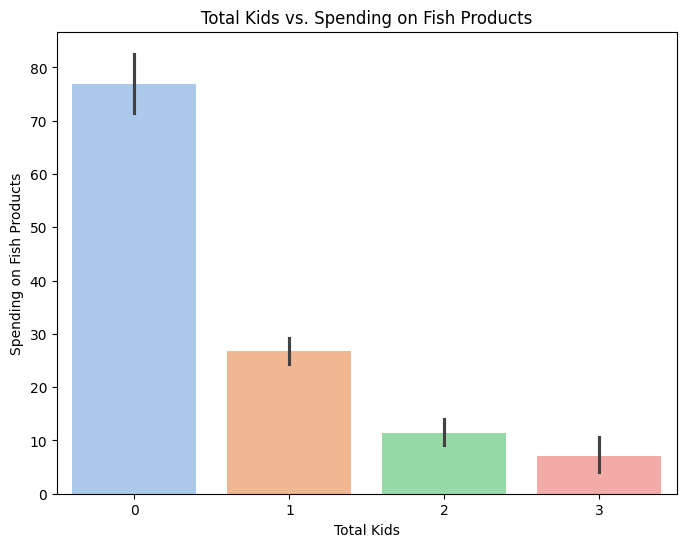

In [308]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntFishProducts', palette='pastel')
plt.title('Total Kids vs. Spending on Fish Products')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Fish Products')
plt.show()

**4. Spending on Fish Products**
- Similar to meat products, households with **no kids** spend the most on fish products (**77.0**), while spending declines sharply as the number of children increases.
- Households with **3 kids** spend the least on fish products (**7.1**).

**Total Kids vs. Spending on Sweet Products**

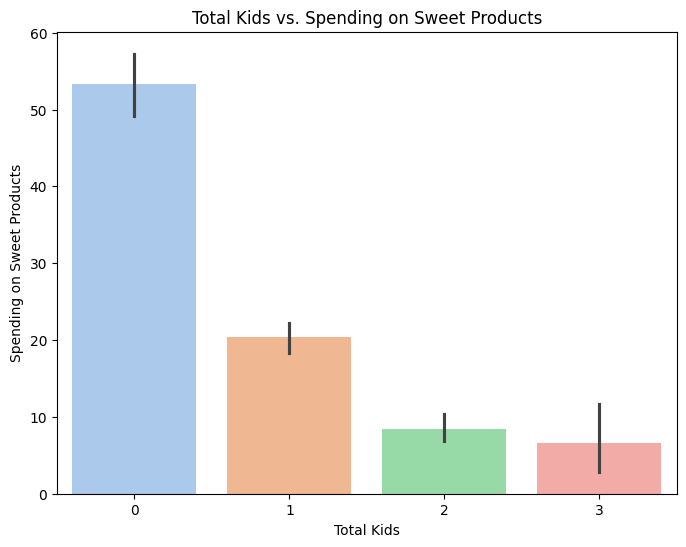

In [309]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntSweetProducts', palette='pastel')
plt.title('Total Kids vs. Spending on Sweet Products')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Sweet Products')
plt.show()

**5. Spending on Sweet Products**
- Customers with **no kids** again spend the most on sweet products (**53.4**).
- Spending decreases as the number of children increases, with households having **3 kids** spending just **6.6**.

**Spending on Gold Products**

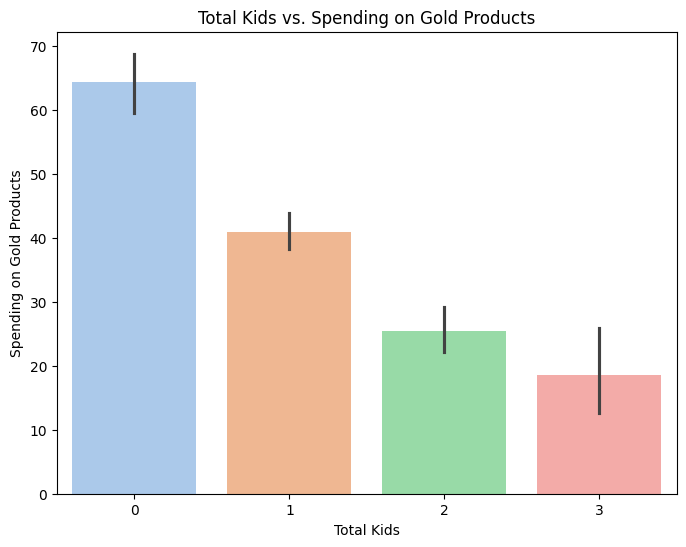

In [310]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Total_Kids', y='MntGoldProds', palette='pastel')
plt.title('Total Kids vs. Spending on Gold Products')
plt.xlabel('Total Kids')
plt.ylabel('Spending on Gold Products')
plt.show()

**6. Spending on Wines**
- Customers with **no kids** spend the most on wines (**489.9**), while spending drops significantly as the number of children increases.
- Households with **3 kids** spend the least on wines (**171.4**).

### **Insight**
- Across all product categories, customers with **no children** spend significantly more than those with children. Spending decreases as the number of kids in the household increases.
- Families with more children might allocate their budgets to essentials and avoid luxury or high-cost items like wines, gold products, and specialty foods.

## **Question 4 : What are the differences in total spending between households with children (Has_Kids) and those without children?**

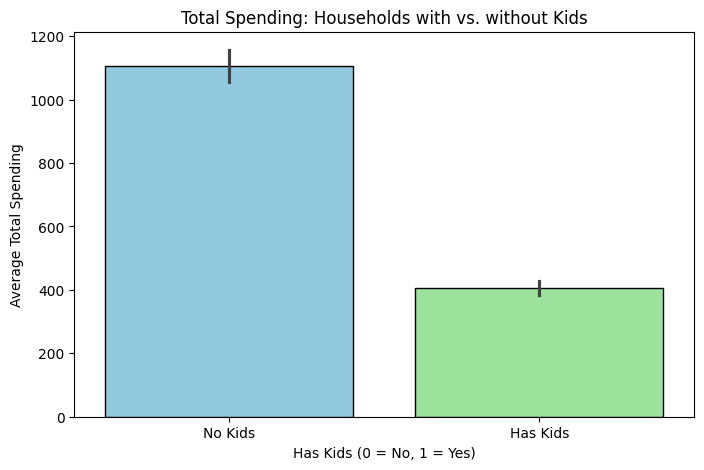

In [311]:
# Visualization: Bar plot for Total Spending by Has_Kids
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Has_Kids", y="Total_Spending", palette=palette, edgecolor='k')
plt.title("Total Spending: Households with vs. without Kids")
plt.xlabel("Has Kids (0 = No, 1 = Yes)")
plt.ylabel("Average Total Spending")
plt.xticks([0, 1], ["No Kids", "Has Kids"])
plt.show()

### **Insight**

1. **Households without Kids**: Customers without kids spend significantly more on average compared to households with kids. This could suggest that these customers have more disposable income.
2. **Households with Kids**: Households with kids spend less on average, potentially due to other financial commitments like education or child-related expenses.


# **3. Customer Lifecycle**

## **Question 5 : How does customer tenure (Customer_Tenure) relate to total spending (Total_Spending) and recency (Recency)?**

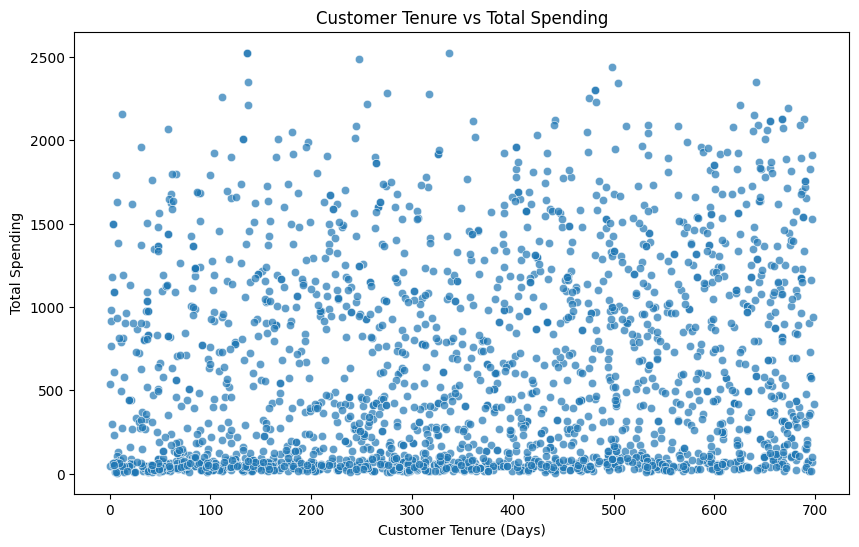

In [312]:
# Scatter plot: Customer Tenure vs Total Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Customer_Tenure", y="Total_Spending", palette=palette, alpha=0.7)
plt.title("Customer Tenure vs Total Spending")
plt.xlabel("Customer Tenure (Days)")
plt.ylabel("Total Spending")
plt.show()

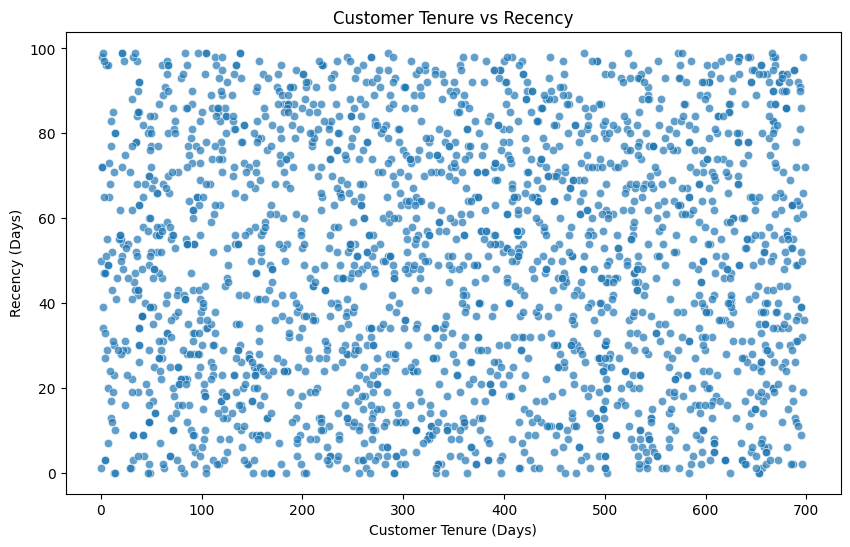

In [313]:
# Scatter plot: Customer Tenure vs Recency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Customer_Tenure", y="Recency", palette=palette, alpha=0.7)
plt.title("Customer Tenure vs Recency")
plt.xlabel("Customer Tenure (Days)")
plt.ylabel("Recency (Days)")
plt.show()

### **Insight**

1. **Customer Tenure vs Total Spending**:
   - The scatter plot indicates no clear relationship between customer tenure and total spending. Customers with varying tenures show a wide range of spending behavior.

2. **Customer Tenure vs Recency**:
   - The scatter plot shows no discernible trend between tenure and recency. Customers with longer tenures do not necessarily have lower or higher recency values.

---

**Conclusion**

Customer tenure does not appear to significantly influence total spending or recency.


## **Question 6 : What is the tenure distribution across different age groups (Age_Group) and income levels (Income_Group)?**

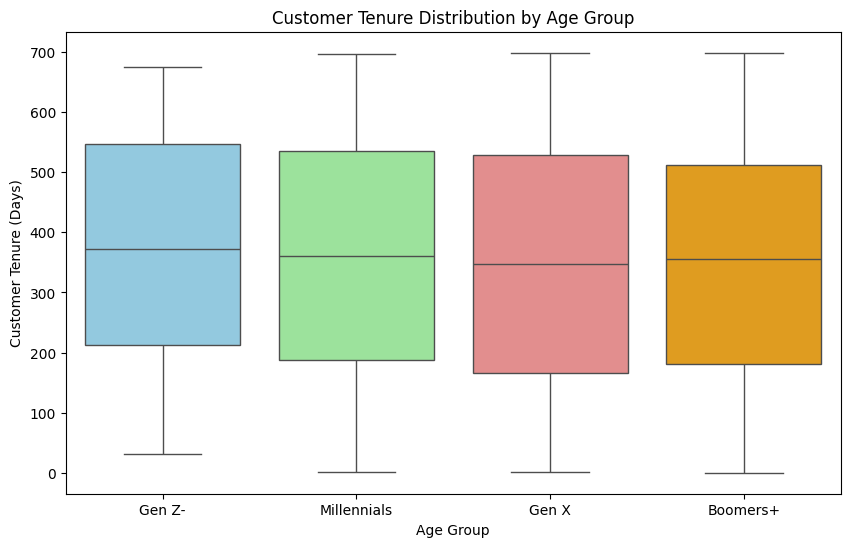

In [314]:
# Box plot: Customer Tenure vs Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age_Group", y="Customer_Tenure", palette=palette)
plt.title("Customer Tenure Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Customer Tenure (Days)")
plt.show()

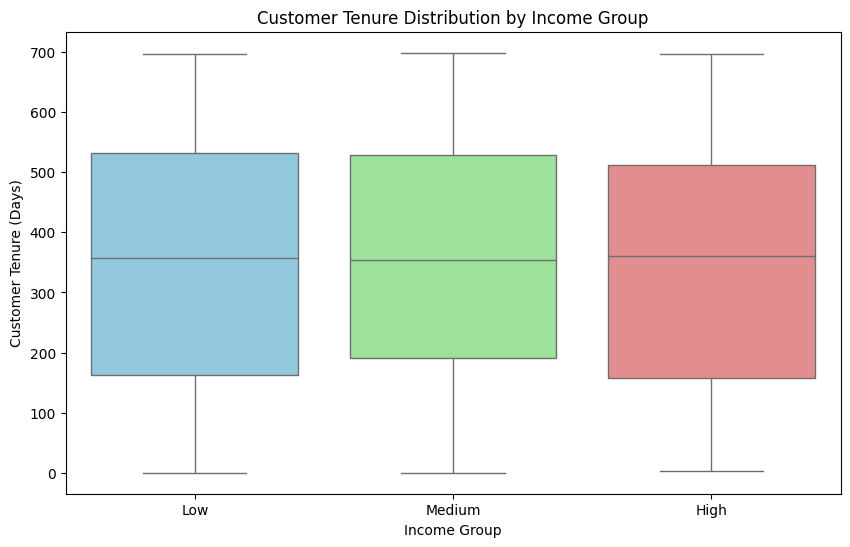

In [315]:
# Box plot: Customer Tenure vs Income Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Income_Group", y="Customer_Tenure", palette=palette)
plt.title("Customer Tenure Distribution by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Customer Tenure (Days)")
plt.show()

### Insight

1. **Customer Tenure by Age Group**:
   - The median tenure is fairly consistent across all age groups, with Gen Z showing slightly lower variability.
   - Older age groups like Boomers+ display slightly wider tenure distributions, possibly due to their longer customer relationships.

2. **Customer Tenure by Income Group**:
   - There is no significant variation in median customer tenure across income groups.
   - All income groups have a similar range of tenure, indicating a uniform retention pattern regardless of income.

These insights suggest that tenure is not strongly influenced by either age group or income level, implying consistent retention strategies across demographics.


# **4. Purchase Behavior**

## **Question 7 : What are the top-selling and least-selling product categories (Dominant_Category), and how do these vary across spending groups (Spending_Group)?**

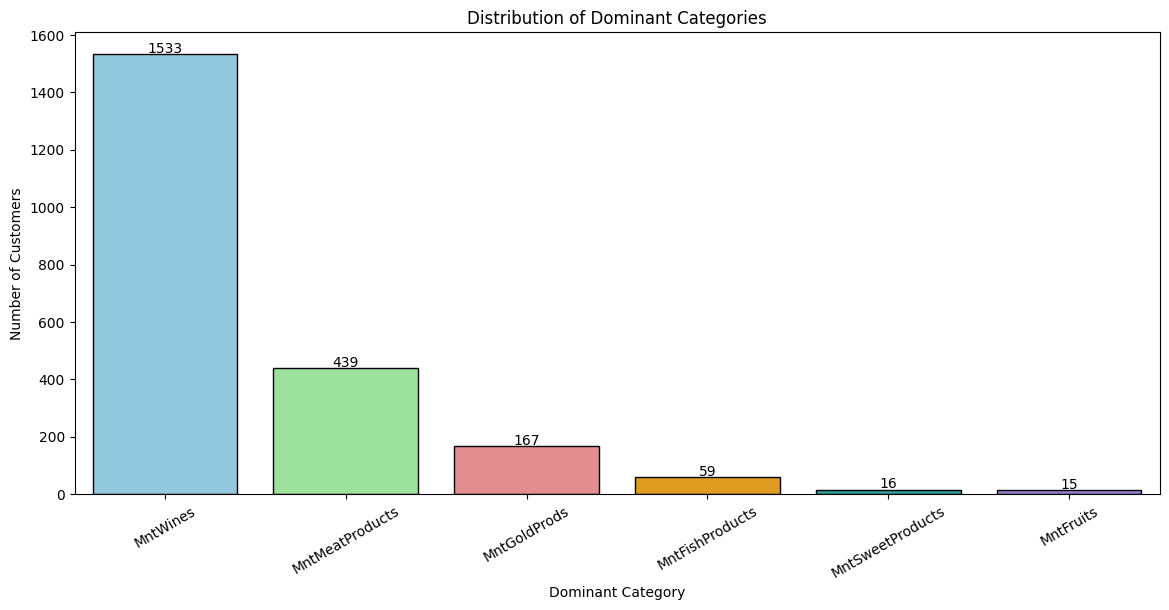

In [316]:
# Plotting the distribution of Dominant Categories
plt.figure(figsize=(14, 6))
dominant_category_counts = df['Dominant_Category'].value_counts()
sns.barplot(x=dominant_category_counts.index, y=dominant_category_counts.values, palette=palette, edgecolor='k')
plt.title('Distribution of Dominant Categories')
plt.xlabel('Dominant Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)
for i, v in enumerate(dominant_category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)
plt.show()

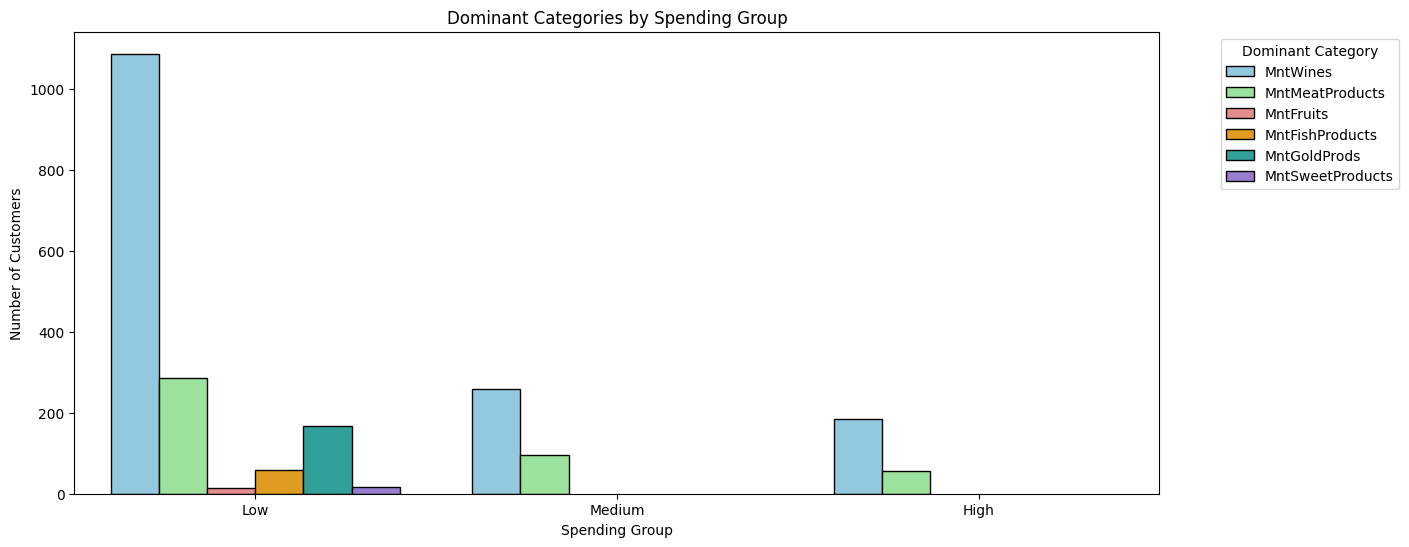

In [317]:
# Plotting Dominant Category distribution across Spending Groups
plt.figure(figsize=(14, 6))
sns.countplot(data=df,x='Spending_Group',hue='Dominant_Category',palette=palette,edgecolor='k')
plt.title('Dominant Categories by Spending Group')
plt.xlabel('Spending Group')
plt.ylabel('Number of Customers')
plt.legend(title='Dominant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Insight**

#### Distribution of Dominant Categories
1. **Top-Selling Product Category:**
   - **Wines** are the most dominant category with the highest number of customers (1533).
   - **Meat Products** come in second with 439 customers.
   - **Gold Products** and **Fish Products** have a smaller customer base, with **Gold Products** at 167 and **Fish Products** at 59.
   - The least preferred categories are **Sweet Products** (16 customers) and **Fruits** (15 customers).
---
#### Dominant Categories by Spending Group
2. **Spending Group Trends:**
   - In the **Low Spending Group**, **Wines** dominate, followed by **Meat Products** and **Gold Products.**
   - The **Medium Spending Group** also exhibits a strong preference for **Wines**, but with a notable presence of **Meat Products.**
   - In the **High Spending Group**, **Wines** remain the dominant category, with a slight representation of **Meat Products.**
---

**Wines** are the clear top-selling category across all spending groups, suggesting a strong preference for this product.


# **5. Purchase Channels**

## **Question 8 : Which channel (NumWebPurchases, NumCatalogPurchases, NumStorePurchases) is the dominant channel for customers, and how does it relate to total spending?**

- Customers often prefer specific channels for their purchases, such as websites, catalogs, or physical stores. Identifying the dominant channel for each customer provides insights into their shopping behavior.

**Dominant Channel Distribution**

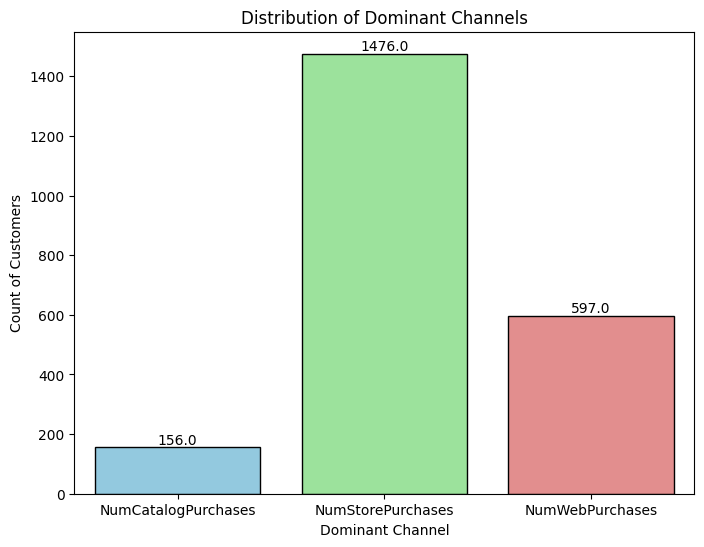

In [318]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dominant_Channel', palette=palette, edgecolor='k')
plt.title('Distribution of Dominant Channels')
plt.xlabel('Dominant Channel')
plt.ylabel('Count of Customers')

# Add Annotation
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

**1. Distribution of Dominant Channels**
- **Stores** are the most dominant channel, with **1,476 customers** preferring to purchase in physical stores.
- **Web** is the second most dominant channel, with **597 customers**.
- **Catalog** is the least dominant channel, with only **156 customers**.


**Total Spending by Dominant Channel**

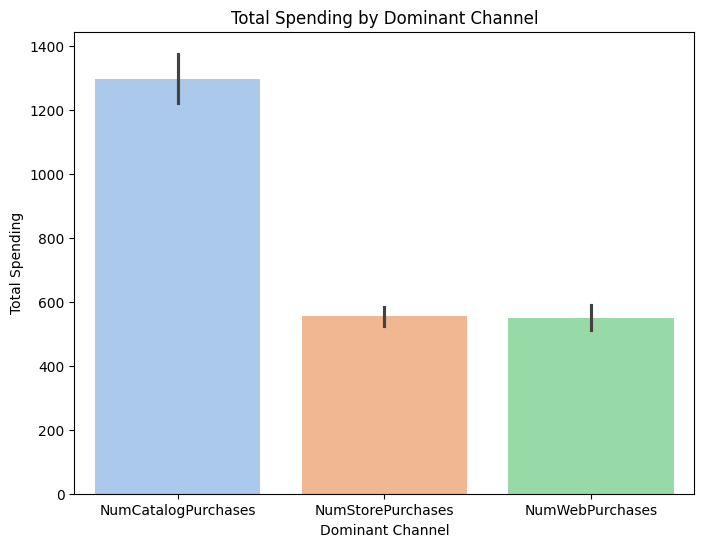

In [319]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Dominant_Channel', y='Total_Spending', palette='pastel')
plt.title('Total Spending by Dominant Channel')
plt.xlabel('Dominant Channel')
plt.ylabel('Total Spending')
plt.show()

**2. Total Spending by Dominant Channel**
- Customers with **Catalog** as their dominant channel spend the most on average (**1,297.6**), despite being the least preferred channel.
- Customers with **Stores** as their dominant channel spend moderately on average (**555.5**), but this is spread across the highest number of customers.
- Customers with **Web** as their dominant channel have the lowest average spending (**548.5**), slightly lower than Store customers.

In [320]:
# Summarizing average spending and count by dominant channel
dominant_channel_summary = df.groupby('Dominant_Channel')['Total_Spending'].agg(['mean', 'count']).reset_index()
dominant_channel_summary


Dominant_Channel         mean  count
0  NumCatalogPurchases  1297.647436    156
1    NumStorePurchases   555.468835   1476
2      NumWebPurchases   548.485762    597

### **Insight**
- **Catalog** purchases drive the highest average spending, though fewer customers use this channel. This may indicate catalog shoppers are high-value customers.
- **Store** purchases are the most common, indicating the importance of physical retail presence for overall sales volume.
- **Web** purchases have a substantial number of users but result in the lowest average spending per customer.


## **Question 9 : Which channel (NumWebPurchases, NumCatalogPurchases, NumStorePurchases) is the dominant channel for customers, and how does it relate to total purchases (Total_Purchases) and customer age demographics (Age_Group)?**

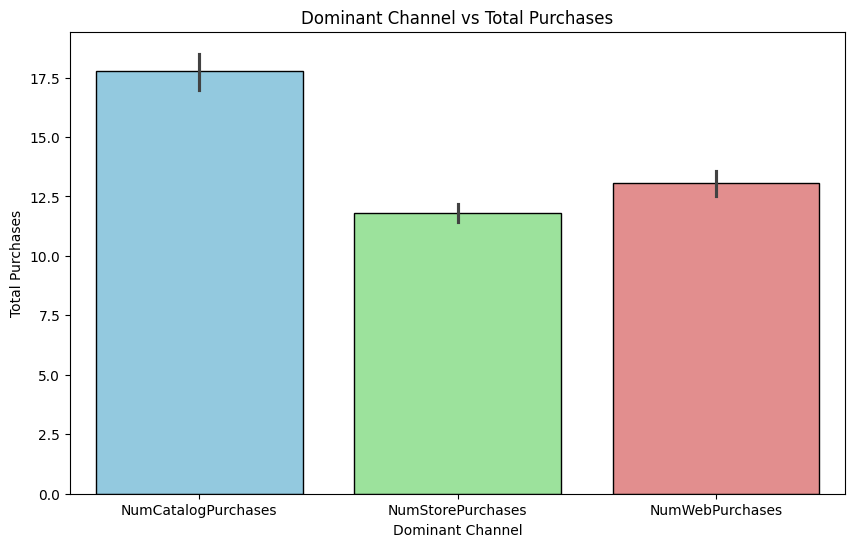

In [321]:
# Dominant Channel by Total Purchases
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Dominant_Channel', y='Total_Purchases', palette=palette, edgecolor='k')
plt.title('Dominant Channel vs Total Purchases')
plt.xlabel('Dominant Channel')
plt.ylabel('Total Purchases')
plt.show()

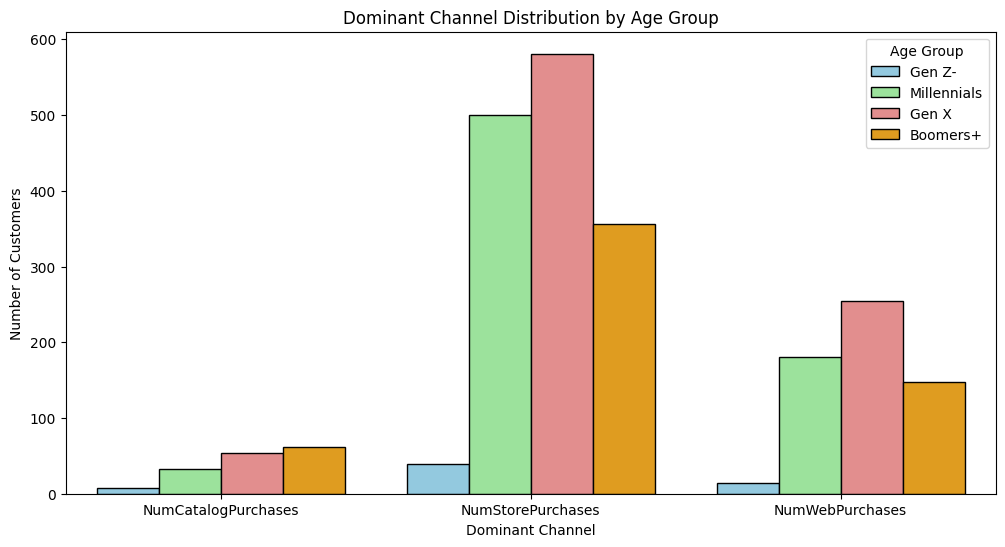

In [322]:
# Dominant Channel segmented by Age_Group
plt.figure(figsize=(12, 6))
dominant_age_group = df.groupby(['Dominant_Channel', 'Age_Group']).size().reset_index(name='Count')
sns.barplot(data=dominant_age_group, x='Dominant_Channel', y='Count', hue='Age_Group', palette=palette, edgecolor='k')
plt.title('Dominant Channel Distribution by Age Group')
plt.xlabel('Dominant Channel')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.show()

### **Insight**

#### **Dominant Channel vs Total Purchases**
- **NumCatalogPurchases**: The dominant channel with the highest average total purchases.
- **NumStorePurchases** and **NumWebPurchases**: Show lower total purchases compared to catalog purchases.

#### **Dominant Channel Distribution by Age Group**
- **NumStorePurchases**: Dominates across all age groups, particularly among **Gen X** and **Boomers+**.
- **NumWebPurchases**: Favored by **Millennials** and **Gen X**, showing a preference for online shopping in younger demographics.
- **NumCatalogPurchases**: Limited usage but prominent among **Boomers+**, indicating catalog purchases are still relevant for older customers.


# **6. Engagement & Interaction**

## **Question 10 : How does the frequency of website visits (NumWebVisitsMonth) relate to customer spending on different product categories (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds)?**

- Frequent website visits may indicate customer engagement and interest in purchasing. Identifying which product categories benefit the most from web traffic.

**Website Visits vs. Spending on Wines**

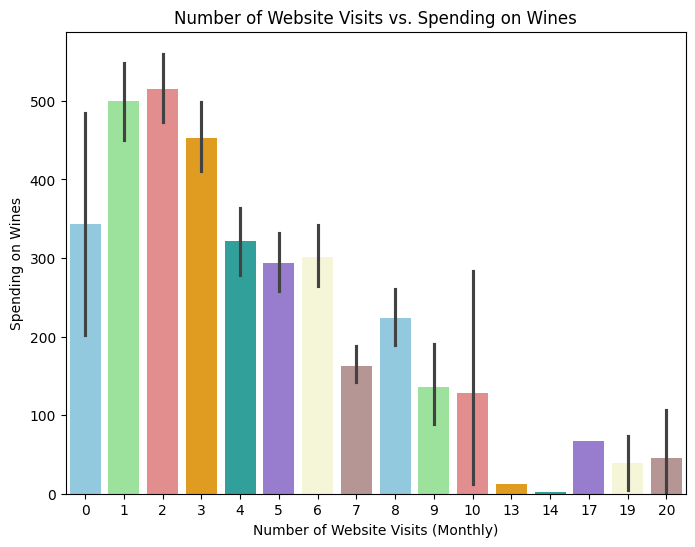

In [323]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntWines', palette=palette)
plt.title('Number of Website Visits vs. Spending on Wines')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Wines')
plt.show()

**1. Spending on Wines**
- Customers who visit the website 1–3 times a month tend to have the highest spending on wines.
- Spending decreases as the number of visits increases, especially for customers with 6 or more visits.

**Website Visits vs. Spending on Fruits**


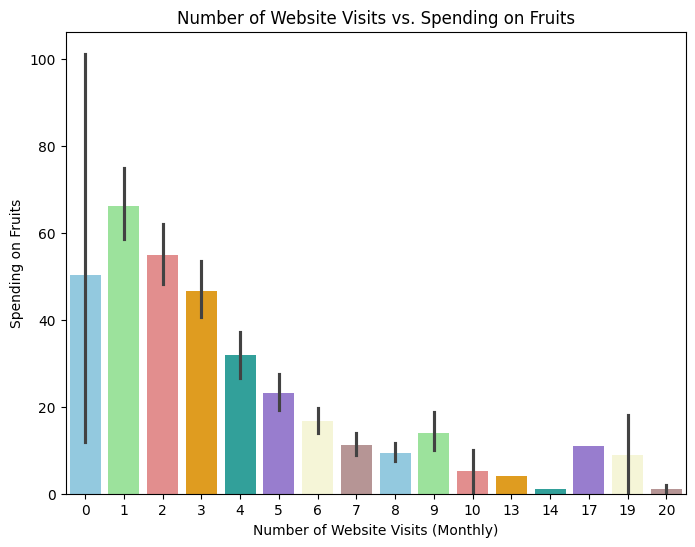

In [324]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntFruits', palette=palette)
plt.title('Number of Website Visits vs. Spending on Fruits')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Fruits')
plt.show()

**2. Spending on Fruits**
- Customers with 1–3 monthly visits spend the most on fruits, with spending significantly decreasing for 4 or more visits.
- Minimal spending is observed for customers with 10 or more visits.


**Website Visits vs. Spending on Meat Products**

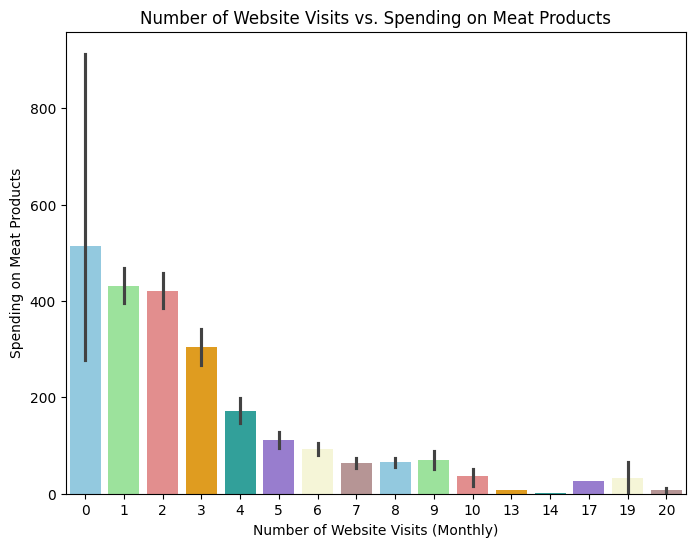

In [325]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntMeatProducts', palette=palette)
plt.title('Number of Website Visits vs. Spending on Meat Products')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Meat Products')
plt.show()

**3. Spending on Meat Products**
- Spending on meat products follows a similar trend, with the highest spending seen for customers with 1–3 monthly visits.
- Spending decreases drastically for customers with more frequent visits.

**Website Visits vs. Spending on Fish Products**

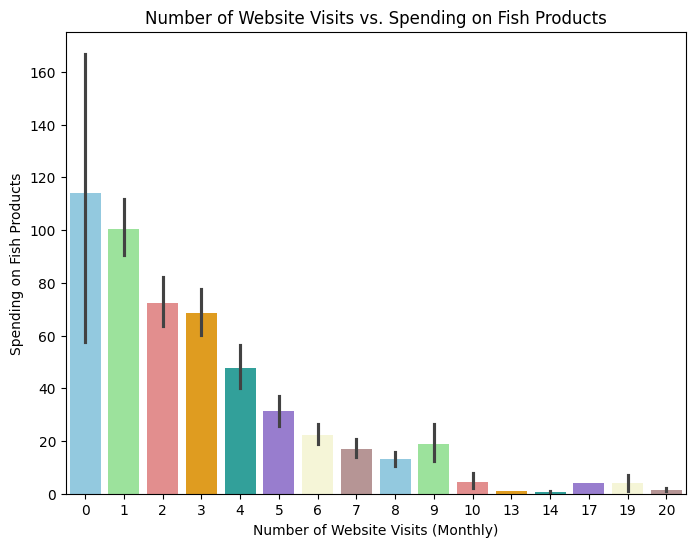

In [326]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntFishProducts', palette=palette)
plt.title('Number of Website Visits vs. Spending on Fish Products')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Fish Products')
plt.show()

**4. Spending on Fish Products**
- Customers with 1–3 visits per month spend the most on fish products.
- Spending declines with higher visit frequencies, particularly after 4 visits.

**Website Visits vs. Spending on Sweet Products**

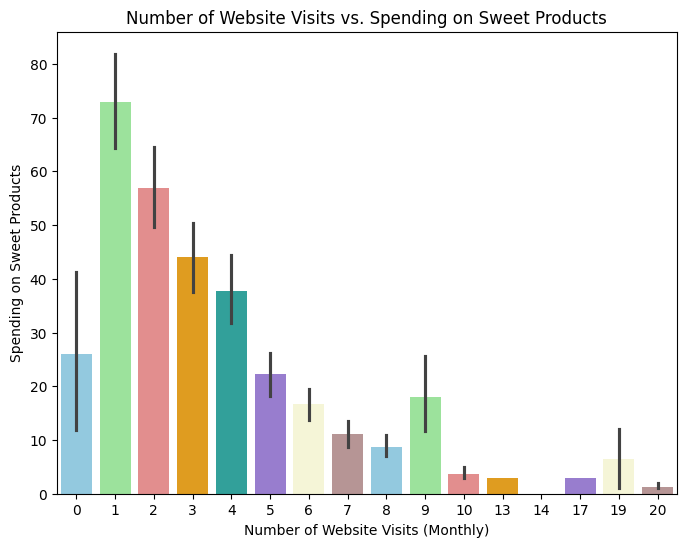

In [327]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntSweetProducts', palette=palette)
plt.title('Number of Website Visits vs. Spending on Sweet Products')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Sweet Products')
plt.show()

**5. Spending on Sweet Products**
- Sweet product spending is highest for customers with 1–3 website visits per month.
- Spending decreases consistently with more visits, similar to other categories.

**Website Visits vs. Spending on Gold Products**

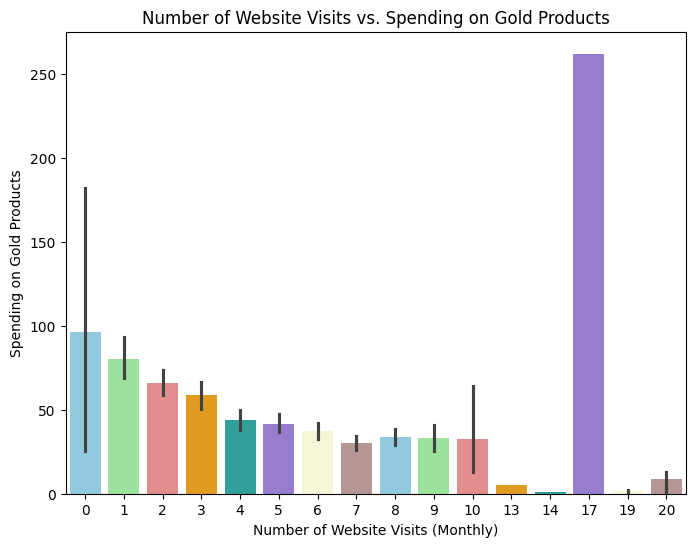

In [328]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='NumWebVisitsMonth', y='MntGoldProds', palette=palette)
plt.title('Number of Website Visits vs. Spending on Gold Products')
plt.xlabel('Number of Website Visits (Monthly)')
plt.ylabel('Spending on Gold Products')
plt.show()

In [329]:
df[df['NumWebVisitsMonth'] == 17]

ID  Year_Birth  Age    Age_Group Education Marital_Status  Income  \
1328  4246        1982   32  Millennials    Master         Single  6560.0   

     Income_Group  Kidhome  Teenhome  Total_Kids  Has_Kids  No_Kids  \
1328          Low        0         0           0         0        1   

     Dt_Customer  Customer_Tenure Tenure_Group  Recency Recency_Group  \
1328  2013-12-12              199    0-1 Years        2      <30 Days   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1328        67         11               26                4                 3   

      MntGoldProds  Total_Spending Dominant_Category Spending_Group  \
1328           262             373      MntGoldProds            Low   

      NumDealsPurchases Deal_Purchase_Category  NumWebPurchases  \
1328                  0                 No/Low                1   

      NumCatalogPurchases  NumStorePurchases  Total_Purchases  \
1328                    0                  1                2   

     Dominant_Channel  NumWebVisitsMonth Visit_Frequency_Category  \
1328  NumWebPurchases                 17                     High   

      AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1328             0             0             0             0             0   

      Response  Total_Campaign_Acceptances  Is_Campaign_Responder  Complain  
1328         0                           0                      0         0

**6. Spending on Gold Products**
- Spending on gold products is also highest for customers with 1–3 visits per month.
- A notable exception is observed at 17 visits, but this could be due to outliers or data anomalies.


### **Insight**
- Across all product categories, customers with **1–3 website visits per month** show the highest spending, suggesting that occasional web visitors may be more engaged or make larger purchases during fewer visits.
- Spending drops significantly for frequent visitors (4+ visits), which might indicate browsing behavior without purchasing or smaller, more frequent purchases.


## **Question 11 : Do customers with high web engagement (Visit_Frequency_Category = High) prefer specific purchase channels (Dominant_Channel) or product categories (Dominant_Category)?**

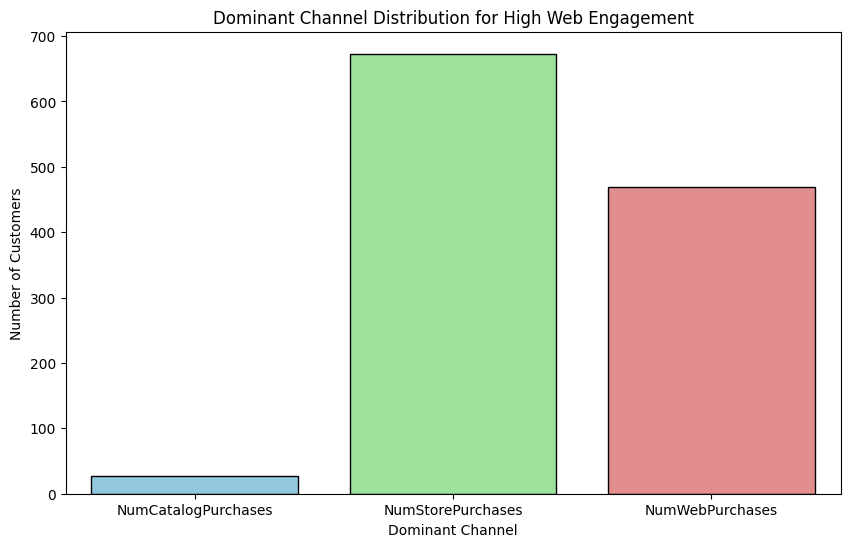

In [330]:
# Filter customers with high web engagement
high_engagement = df[df['Visit_Frequency_Category'] == 'High']

# Visualization 1: Dominant Channel Distribution for High Web Engagement
plt.figure(figsize=(10, 6))
sns.countplot(data=high_engagement, x='Dominant_Channel', palette=palette, edgecolor='k')
plt.title('Dominant Channel Distribution for High Web Engagement')
plt.ylabel('Number of Customers')
plt.xlabel('Dominant Channel')
plt.show()

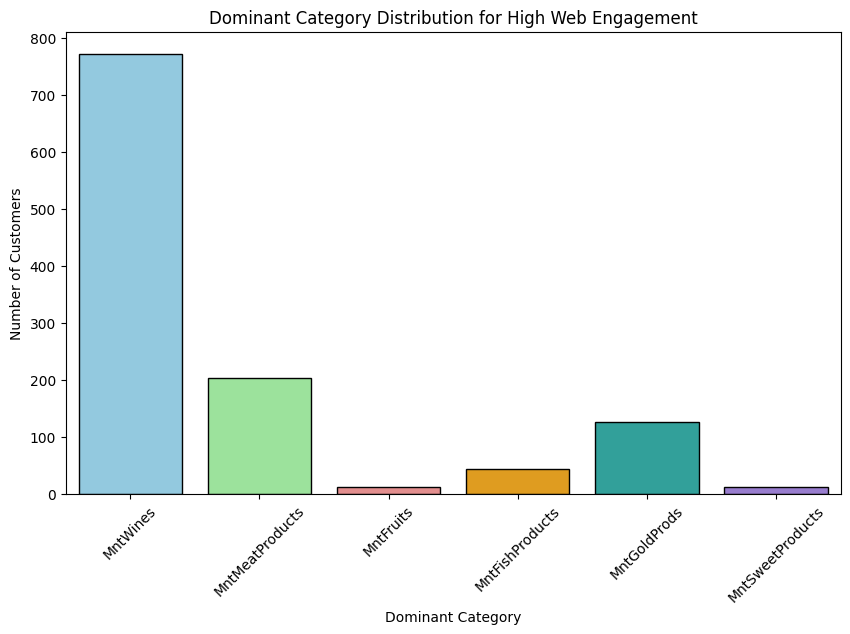

In [331]:
# Visualization 2: Dominant Category Distribution for High Web Engagement
plt.figure(figsize=(10, 6))
sns.countplot(data=high_engagement, x='Dominant_Category', palette=palette, edgecolor='k')
plt.title('Dominant Category Distribution for High Web Engagement')
plt.ylabel('Number of Customers')
plt.xlabel('Dominant Category')
plt.xticks(rotation=45)
plt.show()

### **Insight**

**Dominant Channel Distribution for High Web Engagement**
- Customers with high web engagement (Visit_Frequency_Category = High) primarily prefer store purchases as their dominant channel, followed by web purchases.
- Catalog purchases have minimal representation, suggesting that high web-engaged customers lean towards store or web channels for their purchases.
---
**Dominant Category Distribution for High Web Engagement**
- Wines dominate the product category preferences for high web-engaged customers, accounting for a majority of their purchases.
- Meat products are the second most preferred, while other categories like gold products, fish products, and sweet products contribute to a smaller share.



# **7. Marketing Campaigns**

## **Question 12 : How does the number of campaigns accepted (Total_Campaign_Acceptances) relate to customer spending (Total_Spending) and product preferences (Dominant_Category)?**

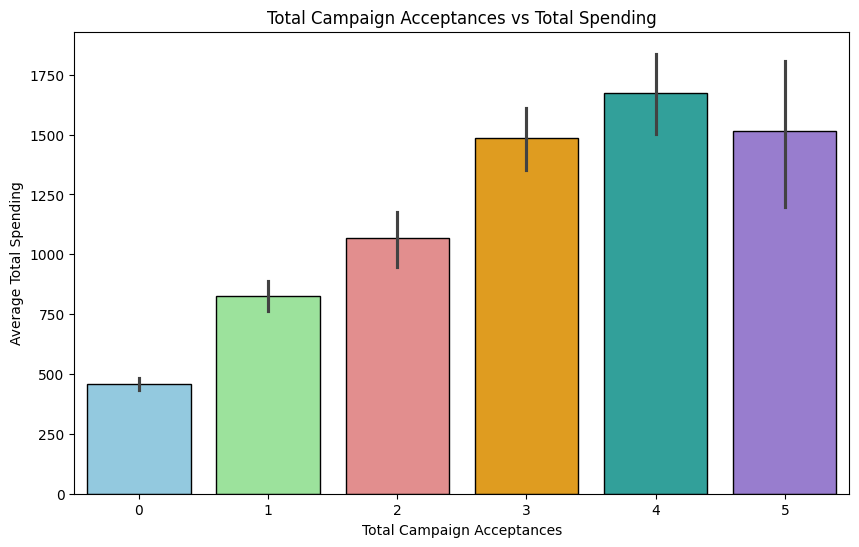

In [332]:
# Bar plot for Total Campaign Acceptances vs Total Spending
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Campaign_Acceptances', y='Total_Spending', data=df, palette=palette, edgecolor='k')
plt.title('Total Campaign Acceptances vs Total Spending')
plt.xlabel('Total Campaign Acceptances')
plt.ylabel('Average Total Spending')
plt.show()


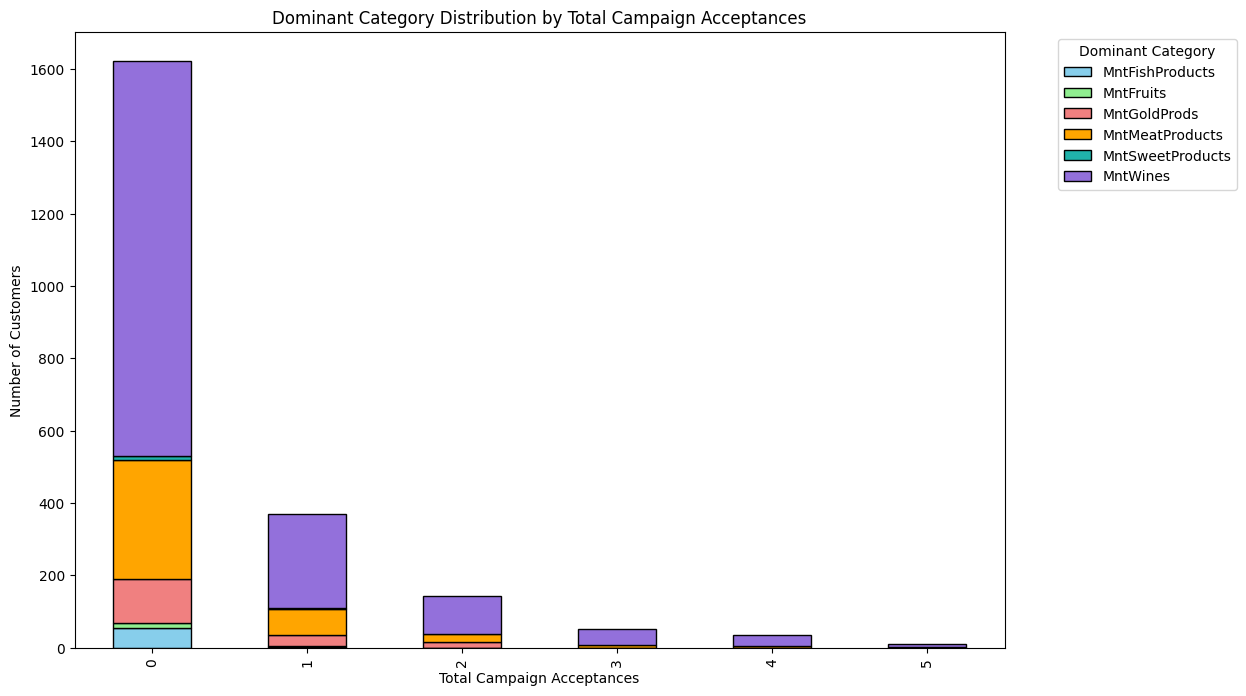

In [333]:
# Stacked bar chart for Dominant Category distribution by Campaign Acceptances
dominant_category_distribution = df.groupby(['Total_Campaign_Acceptances', 'Dominant_Category']).size().unstack()
dominant_category_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=palette, edgecolor='k')
plt.title('Dominant Category Distribution by Total Campaign Acceptances')
plt.xlabel('Total Campaign Acceptances')
plt.ylabel('Number of Customers')
plt.legend(title='Dominant Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Insights**

1. **Total Spending by Campaign Acceptances**:
   - Customers who accepted more campaigns tend to have higher average total spending.
   - There is a notable progression in spending, with customers who accepted 4 campaigns spending the most on average (~1750).

2. **Dominant Category by Campaign Acceptances**:
   - For customers who did not accept any campaigns, wine purchases (`MntWines`) dominate significantly, followed by meat products (`MntMeatProducts`) and gold products (`MntGoldProds`).
   - Among customers who accepted at least one campaign, wine purchases (`MntWines`) consistently remain the dominant category, indicating that campaign responders are more likely to spend heavily on wines.
---
   - Customers who are more responsive to campaigns demonstrate higher spending, indicating that campaigns are effective at engaging high-value customers.
   - `MntWines` remains the leading product category across all levels of campaign acceptances.


## **Question 13 : Which customer groups (Age_Group, Income_Group, Spending_Group) are most likely to respond to marketing campaigns (Is_Campaign_Responder)?**

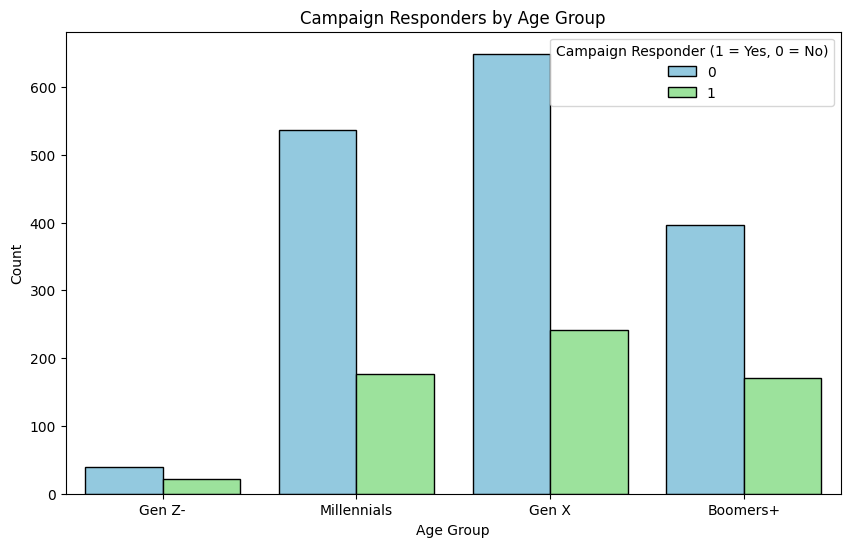

In [334]:
# Plotting the distribution of campaign responders by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Age_Group", hue="Is_Campaign_Responder", palette=palette, edgecolor='k')
plt.title("Campaign Responders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Campaign Responder (1 = Yes, 0 = No)")
plt.show()

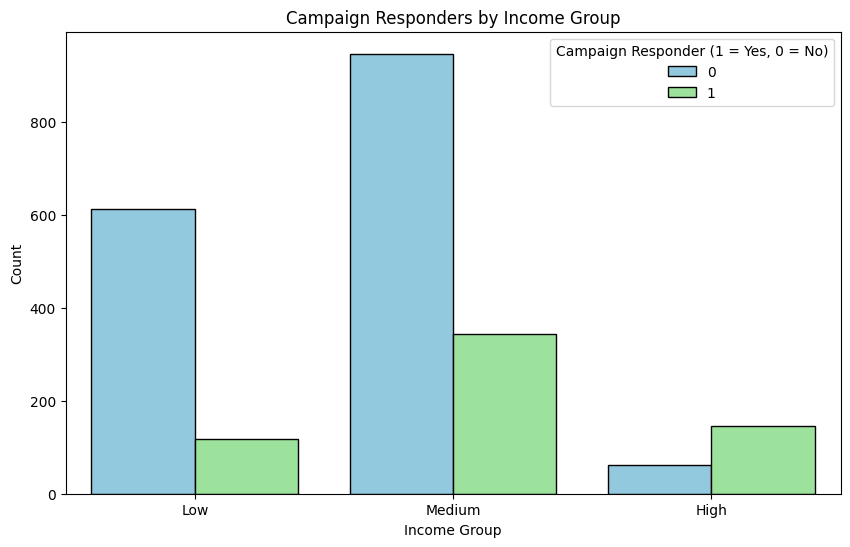

In [335]:
# Plotting the distribution of campaign responders by Income Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Income_Group", hue="Is_Campaign_Responder", palette=palette, edgecolor='k')
plt.title("Campaign Responders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.legend(title="Campaign Responder (1 = Yes, 0 = No)")
plt.show()

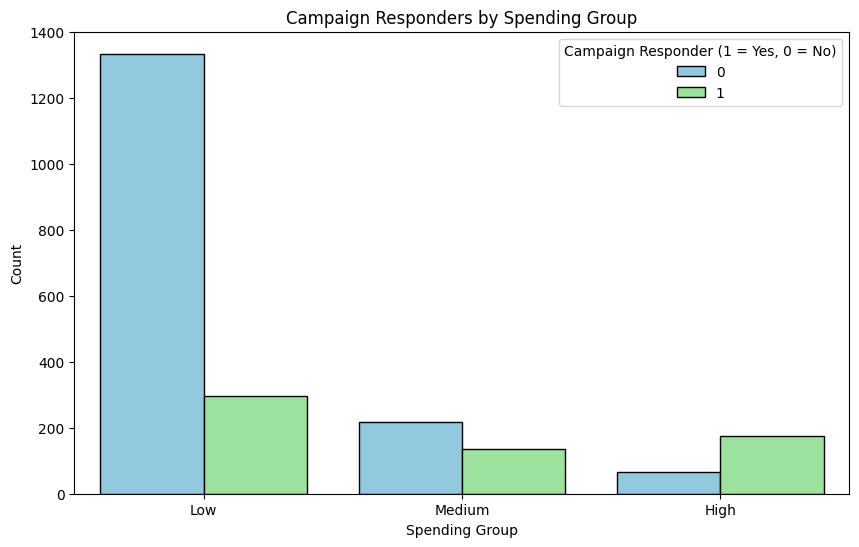

In [336]:
# Plotting the distribution of campaign responders by Spending Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Spending_Group", hue="Is_Campaign_Responder", palette=palette, edgecolor='k')
plt.title("Campaign Responders by Spending Group")
plt.xlabel("Spending Group")
plt.ylabel("Count")
plt.legend(title="Campaign Responder (1 = Yes, 0 = No)")
plt.show()

### Insights

**Age Group**
- Millennials and Gen X exhibit the highest number of campaign responders.
- Gen Z- has the lowest response rate, likely due to their relatively smaller representation in the dataset.

**Income Group**
- Customers in the **Medium** income group are the most responsive to campaigns.
- High-income customers, despite being fewer, show a proportionally higher likelihood of responding compared to low-income customers.

**Spending Group**
- Customers in the **High** spending group demonstrate the highest campaign response rate.
- The **Low** spending group has the largest non-responder count, reflecting minimal engagement.
---
The **Medium Income Group**, **Millennials and Gen X**, and **High Spending Group** are the most likely to respond to campaigns, providing a strategic target audience for future marketing initiatives.


# **4. Conclusion and Recommendation**

## **4.1 Conclusion**

**1. Customer Demographics**

**Q1: Relationship between Demographics and Total Spending**  
- **Key Insight:** Income and education levels are the strongest predictors of total spending. Higher income and education levels correspond to increased spending, while age and marital status have minimal influence.

**Q2: Income Levels vs Likelihood of Having Kids**  
- **Low Income Group:** 84.3% have children, suggesting family-oriented spending patterns.
- **Medium Income Group:** 74% have children, representing a balanced demographic.
- **High Income Group:** 88% do not have children, indicating a preference for luxury goods or individual-focused products.

---

**2. Household Composition**

**Q3: Household Composition and Spending Across Product Categories**  
- Customers with no children spend significantly more across all product categories.
- Spending decreases as the number of children increases, with families prioritizing essentials over luxury goods.

**Q4: Total Spending: Households with vs. without Kids**  
- **Without Kids:** Higher average spending, reflecting more disposable income.
- **With Kids:** Lower average spending, likely due to financial commitments like education and childcare.

---

**3. Customer Lifecycle**

**Q5: Customer Tenure and Its Relationship to Total Spending and Recency**  
- **Insight:** No significant relationship was found between tenure and spending or recency.

**Q6: Tenure Distribution by Age and Income Groups**  
- Tenure shows no strong relationship with either age group or income levels, indicating consistent retention strategies across demographics.

---

**4. Purchase Behavior**

**Q7: Top-Selling and Least-Selling Product Categories by Spending Groups**  
- **Top-Selling:** Wines dominate across all spending groups.
- **Least-Selling:** Fruits and sweet products have the lowest customer representation.
- **Spending Group Trends:** Wines remain dominant across all spending tiers, with meat products as the second most preferred category.

---

**5. Purchase Channels**

**Q8: Dominant Channels and Total Spending**  
- **Catalog Purchases:** Drive the highest average spending but involve fewer customers.
- **Store Purchases:** Most common channel with significant sales volume.
- **Web Purchases:** Moderate usage with the lowest average spending per customer.

**Q9: Dominant Channels and Their Relationship to Total Purchases and Age Demographics**  
- **Dominant Channel:** NumCatalogPurchases has the highest average total purchases.
- **Age Trends:** Gen X and Boomers+ prefer store purchases, while Millennials and Gen X favor web channels. Catalog purchases are prominent among Boomers+.

---

**6. Engagement and Interaction**

**Q10: Website Visit Frequency and Spending Across Product Categories**  
- **Key Insight:** Customers with 1–3 monthly web visits spend the most, while frequent visitors (4+) spend less, indicating browsing behavior or smaller purchases.

**Q11: High Web Engagement and Preferences for Purchase Channels and Product Categories**  
- **Dominant Channel:** High web-engaged customers prefer store purchases, followed by web channels.
- **Dominant Category:** Wines dominate, with meat products as a secondary preference.

---

**7. Marketing Campaigns**

**Q12: Campaign Acceptances and Their Relationship to Spending and Product Preferences**  
- **Total Spending:** Customers accepting more campaigns spend significantly more, with the highest spenders accepting four campaigns.
- **Product Preference:** Wines remain the leading category across all levels of campaign acceptances.

**Q13: Customer Groups Most Likely to Respond to Marketing Campaigns**  
- **Age Group:** Millennials and Gen X respond the most.
- **Income Group:** Medium-income customers are the most responsive, with high-income customers showing proportionally high responses.
- **Spending Group:** High spenders have the highest response rate, making them a strategic target for campaigns.


## **4.2 Recommendation**

1. **Optimize Marketing Campaigns for High-Value Customers**
   - Focus campaigns on **Medium Income Group**, **Gen X and Millennials**, and **High Spending Group**. These segments exhibit the highest campaign responsiveness and spending potential. Offer tailored promotions like **exclusive discounts on wines and meat products** to match their preferences.
   - For **Low Income Group** and **Low Spending Group**, provide **affordable product bundles** or **basic necessities discounts** to encourage engagement.

---

2. **Maximize Revenue from Purchase Channels**
   - **Store Purchases:** Enhance in-store shopping experience by introducing **buy-one-get-one-free offers**, **volume discounts**, and **exclusive in-store events** to boost sales.
   - **Catalog Purchases:** Focus on catalog shoppers, as they generate the highest average spending. Offer **exclusive luxury promotions** or **special product launches** via this channel to engage high-value customers.
   - **Web Channel:** Improve online shopping with **personalized recommendations** and **free shipping for frequent shoppers** to increase purchase frequency and spending.

---

3. **Boost Spending Among Households with Kids**
   - Households with kids spend less overall. Offer **family-oriented promotions**, such as **discounted bundles on meat and sweet products**, to address their needs and encourage higher spending.
   - Highlight **premium products** like wines and gold for households without kids, leveraging their higher disposable income.

---

4. **Promote Top-Selling Products While Encouraging Lesser-Selling Categories**
   - **Top-Selling Categories:** Continue to heavily promote wines and meat products through **seasonal specials**, **loyalty rewards**, and **premium versions** to capitalize on their popularity.
   - **Least-Selling Categories:** Increase sales of fruits and sweet products by introducing **bundled discounts**, **free samples**, or **limited-time offers**.

---

5. **Enhance Customer Engagement and Retention**
   - Strengthen loyalty programs for **high-value long-term customers**, focusing on exclusive benefits such as **priority access to new products** or **special discounts on dominant product categories**.
   - For **high web-engaged customers**, provide **web-store-exclusive discounts** or **cross-channel offers** (e.g., in-store discounts for online purchases) to bridge online and offline shopping behaviors and maximize engagement.


# Test

In [337]:
df.head(5)

ID  Year_Birth  Age    Age_Group Education Marital_Status   Income  \
0  5524        1957   57     Boomers+  Bachelor         Single  58138.0   
1  2174        1954   60     Boomers+  Bachelor         Single  46344.0   
2  4141        1965   49        Gen X  Bachelor        Married  71613.0   
3  6182        1984   30  Millennials  Bachelor        Married  26646.0   
4  5324        1981   33  Millennials  Doctoral        Married  58293.0   

  Income_Group  Kidhome  Teenhome  Total_Kids  Has_Kids  No_Kids Dt_Customer  \
0       Medium        0         0           0         0        1  2012-09-04   
1       Medium        1         1           2         1        0  2014-03-08   
2       Medium        0         0           0         0        1  2013-08-21   
3          Low        1         0           1         1        0  2014-02-10   
4       Medium        1         0           1         1        0  2014-01-19   

   Customer_Tenure Tenure_Group  Recency Recency_Group  MntWines  MntFruits  \
0              663    1-2 Years       58    30–90 Days       635         88   
1              113    0-1 Years       38    30–90 Days        11          1   
2              312    0-1 Years       26      <30 Days       426         49   
3              139    0-1 Years       26      <30 Days        11          4   
4              161    0-1 Years       94      >90 Days       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   Total_Spending Dominant_Category Spending_Group  NumDealsPurchases  \
0            1617          MntWines           High                  3   
1              27          MntWines            Low                  2   
2             776          MntWines            Low                  1   
3              53   MntMeatProducts            Low                  2   
4             422          MntWines            Low                  5   

  Deal_Purchase_Category  NumWebPurchases  NumCatalogPurchases  \
0                 Medium                8                   10   
1                 No/Low                1                    1   
2                 No/Low                8                    2   
3                 No/Low                2                    0   
4                 Medium                5                    3   

   NumStorePurchases  Total_Purchases     Dominant_Channel  NumWebVisitsMonth  \
0                  4               22  NumCatalogPurchases                  7   
1                  2                4    NumStorePurchases                  5   
2                 10               20    NumStorePurchases                  4   
3                  4                6    NumStorePurchases                  6   
4                  6               14    NumStorePurchases                  5   

  Visit_Frequency_Category  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     High             0             0             0   
1                   Medium             0             0             0   
2                   Medium             0             0             0   
3                     High             0             0             0   
4                   Medium             0             0             0   

   AcceptedCmp4  AcceptedCmp5  Response  Total_Campaign_Acceptances  \
0             0             0         1                           1   
1             0             0         0                           0   
2             0             0         0                           0   
3             0             0         0                           0   
4             0             0         0                     

In [338]:
import json
notebook_path = '/content/drive/MyDrive/JCDS/Capstone 2/Customer_Behaviour_Analysis.ipynb'

with open(notebook_path, 'r', encoding='utf-8') as file:
    notebook = json.load(file)

total_lines = 0
code_lines = 0
markdown_lines = 0

for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        code_lines += len(cell['source'])
    elif cell['cell_type'] == 'markdown':
        markdown_lines += len(cell['source'])

total_lines = code_lines + markdown_lines

print(f"Total lines in the notebook: {total_lines}")
print(f"Code lines: {code_lines}")
print(f"Markdown lines: {markdown_lines}")

Total lines in the notebook: 2268
Code lines: 1388
Markdown lines: 880
